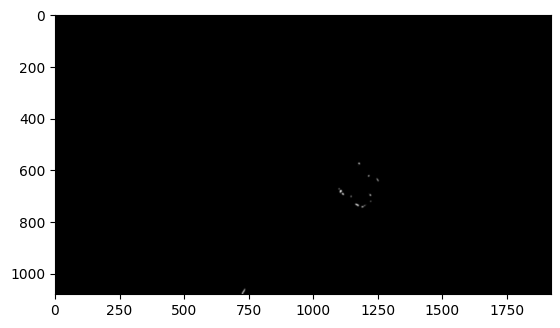

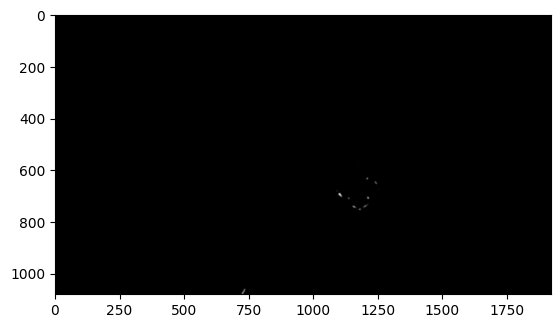

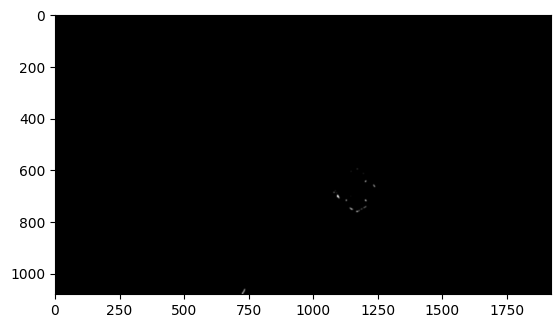

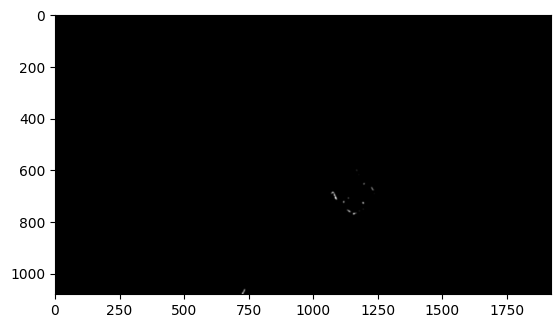

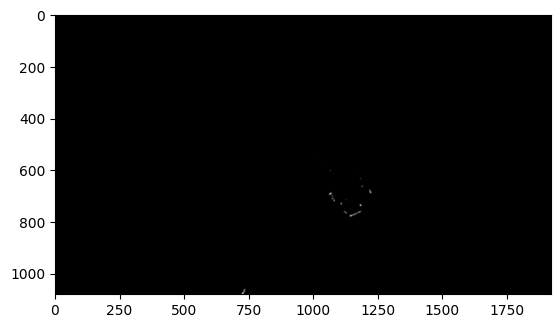

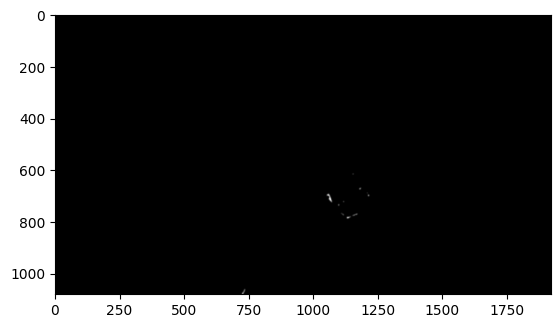

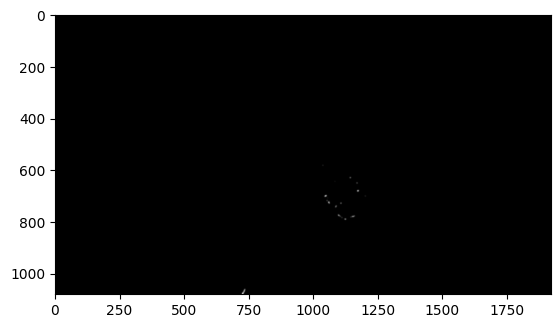

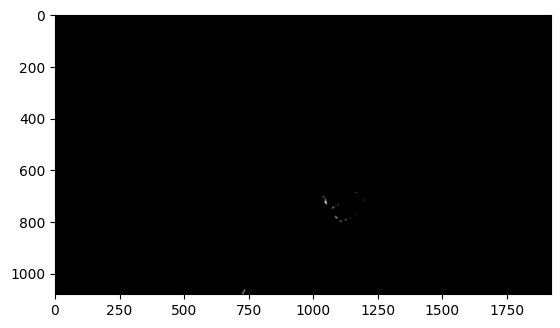

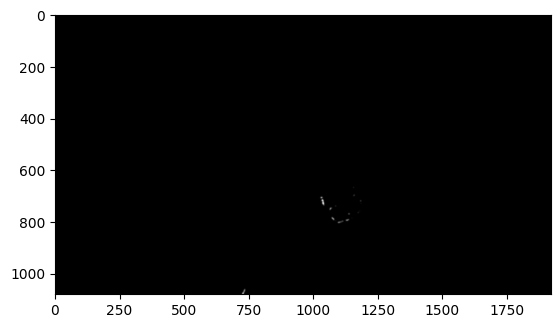

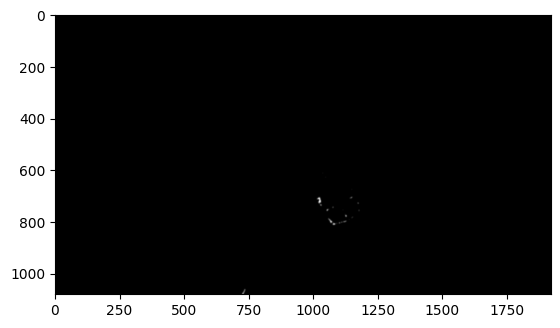

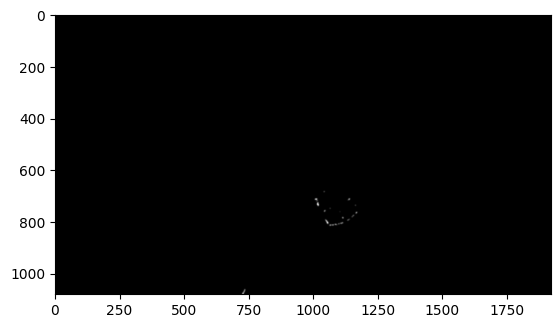

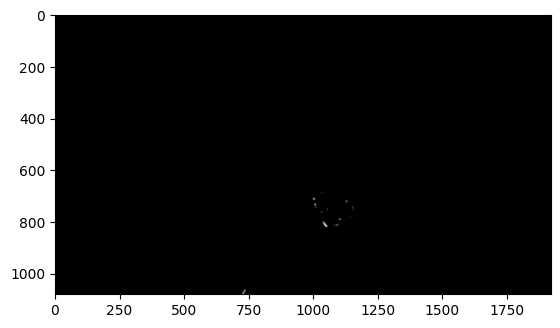

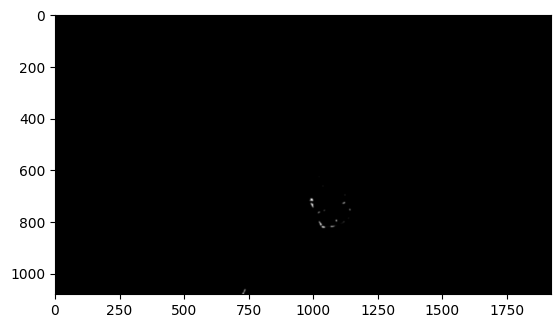

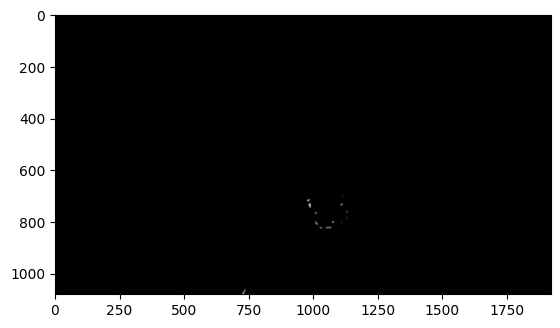

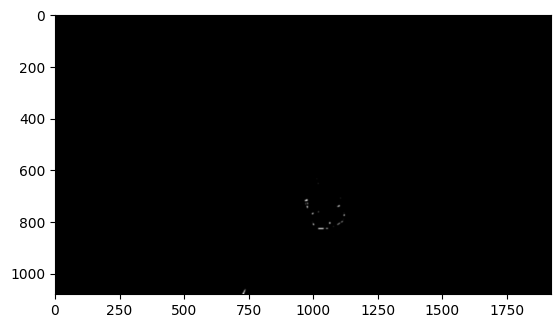

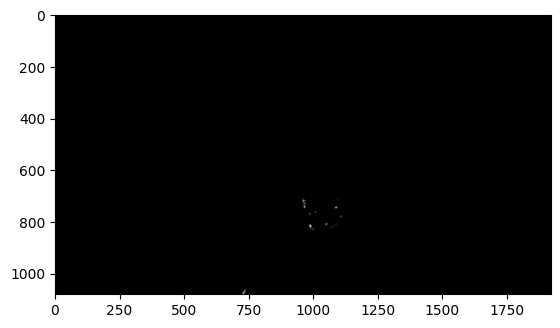

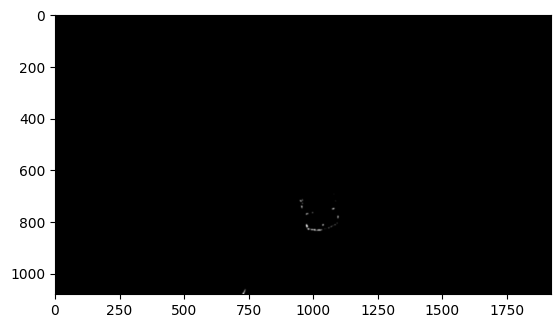

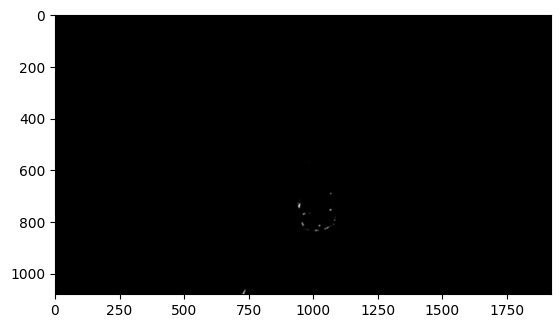

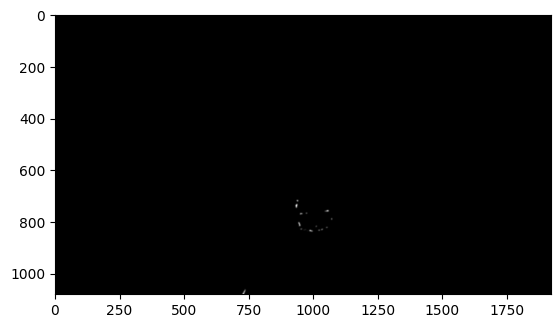

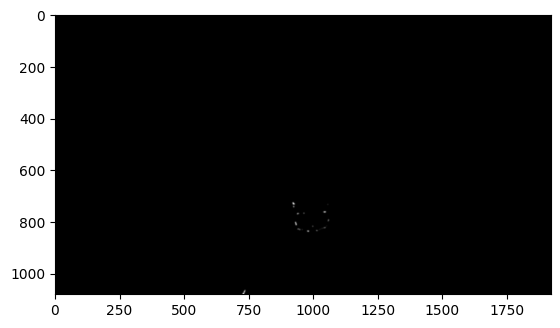

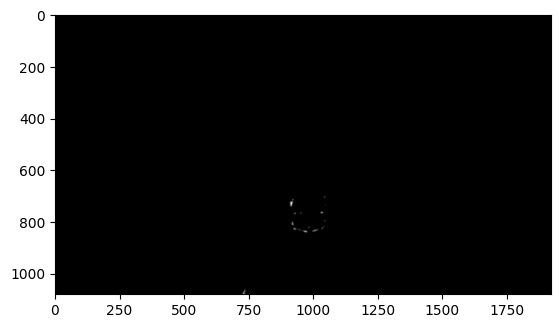

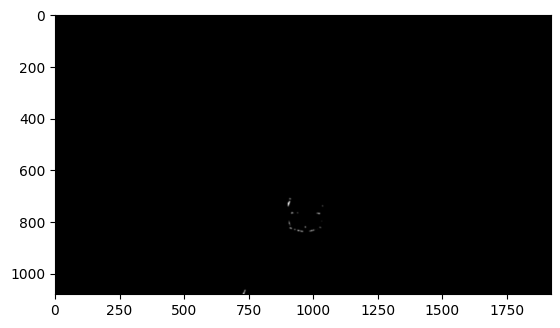

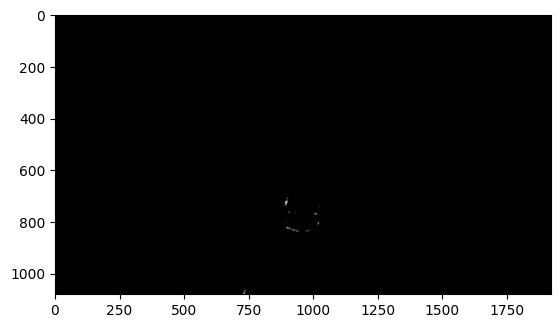

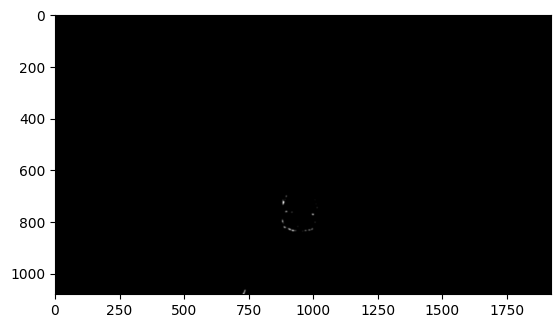

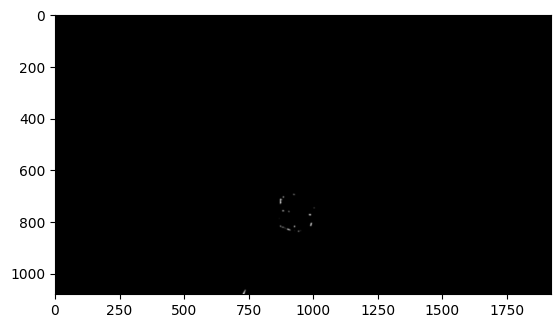

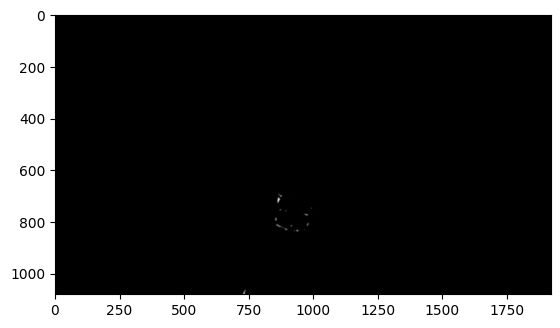

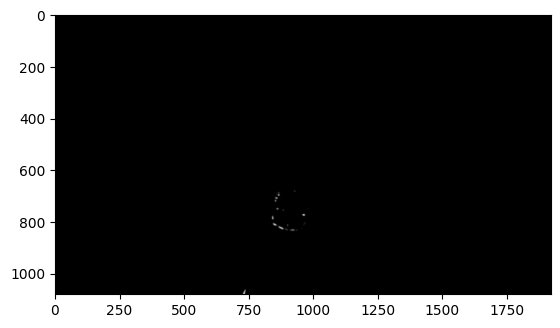

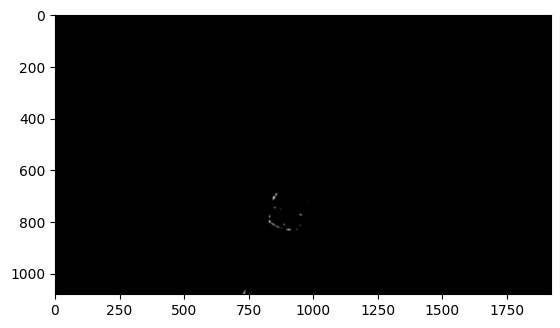

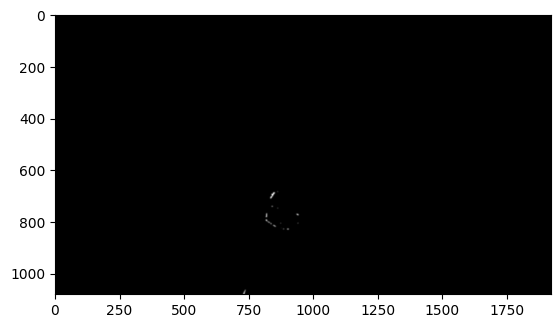

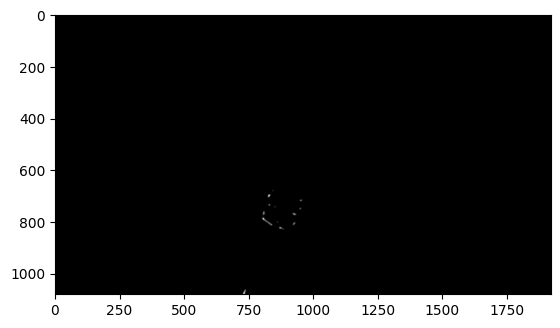

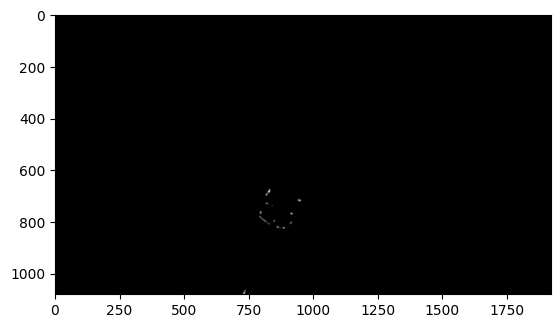

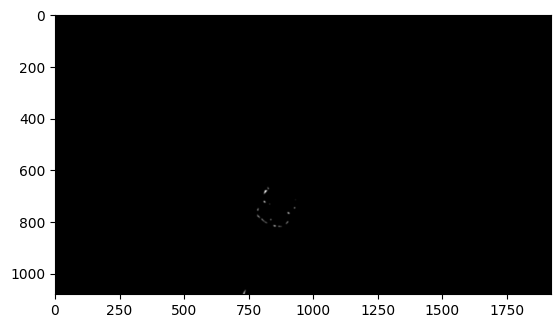

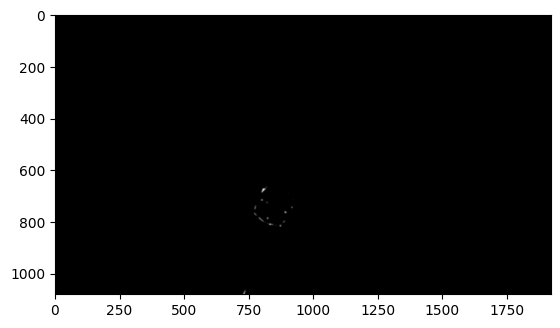

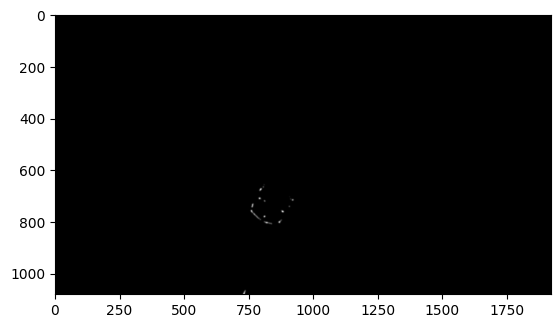

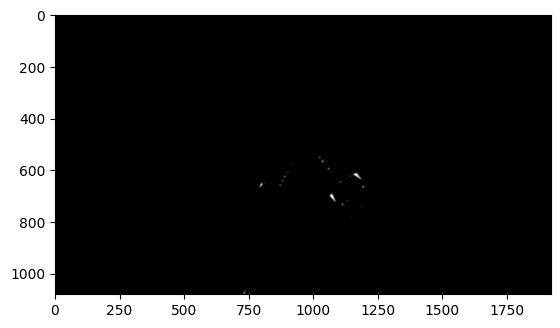

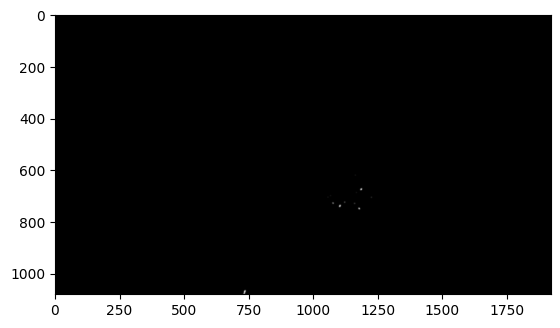

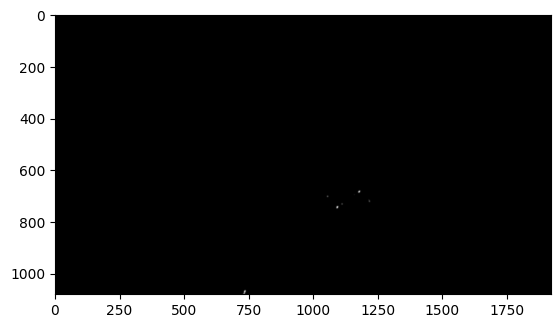

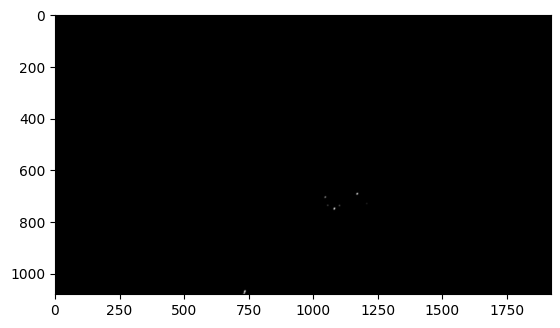

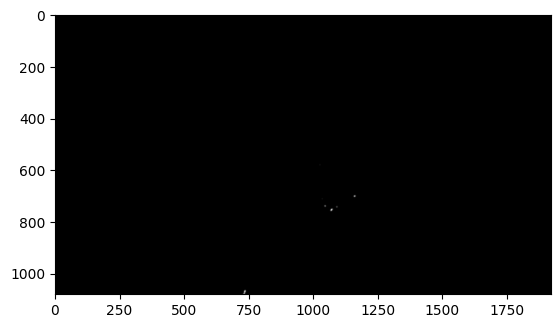

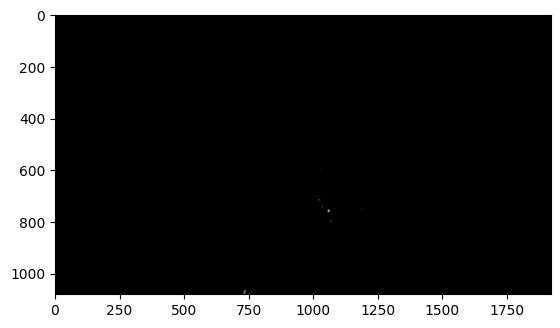

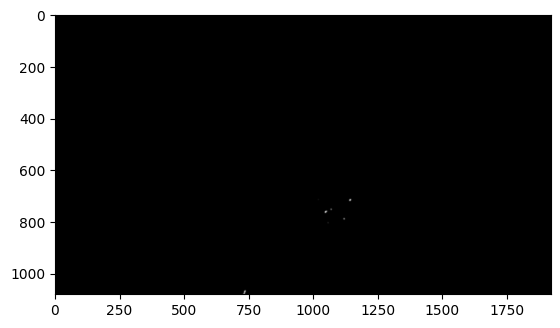

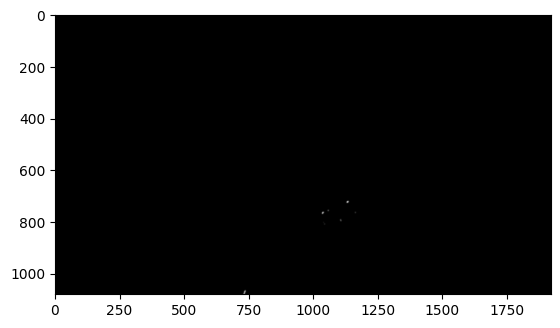

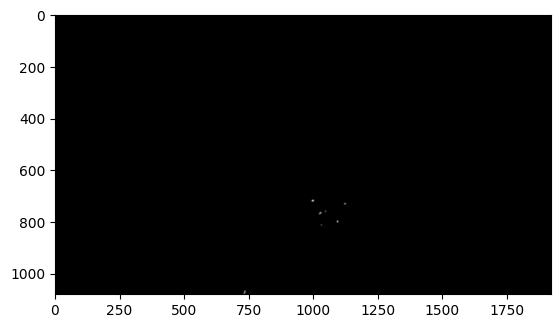

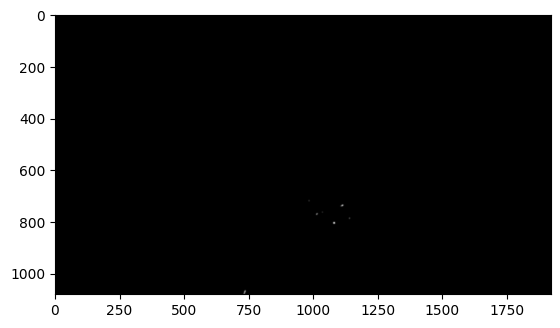

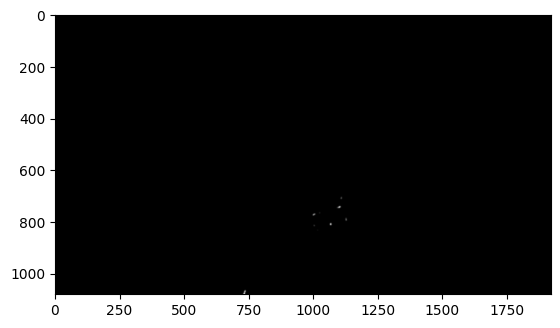

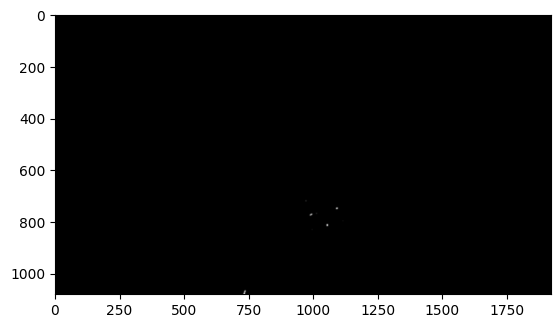

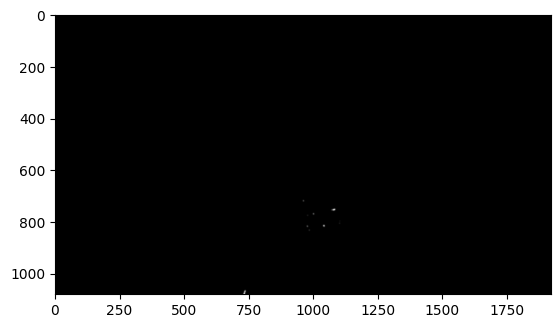

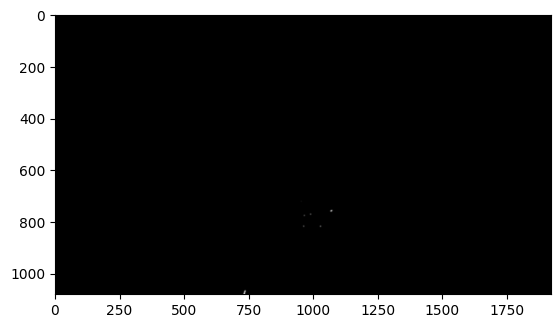

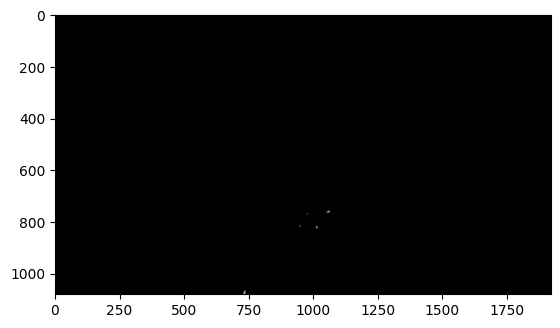

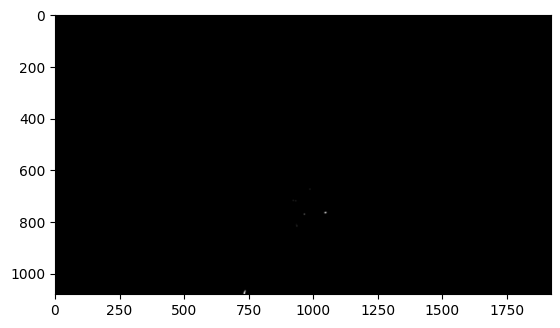

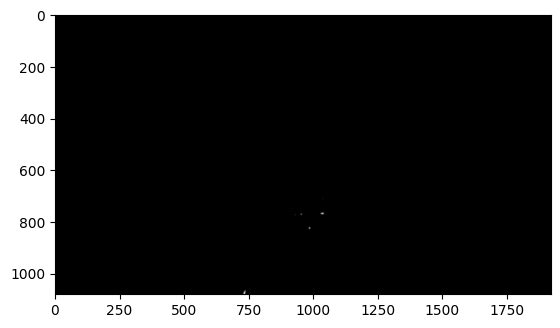

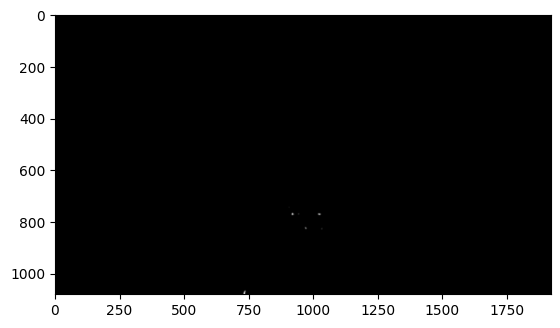

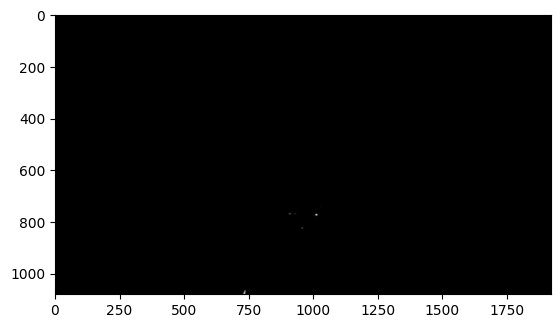

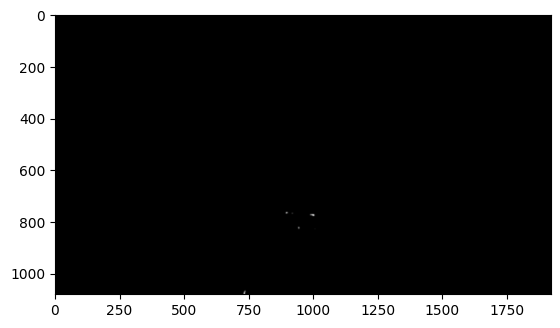

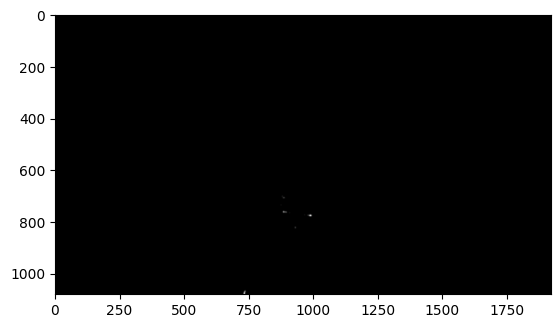

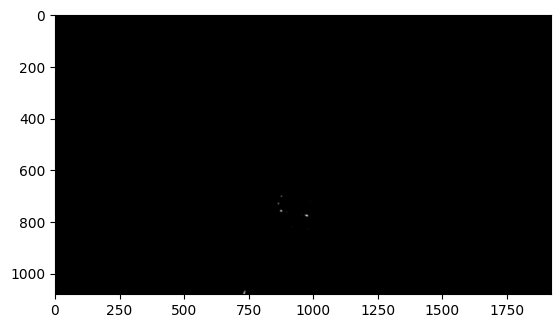

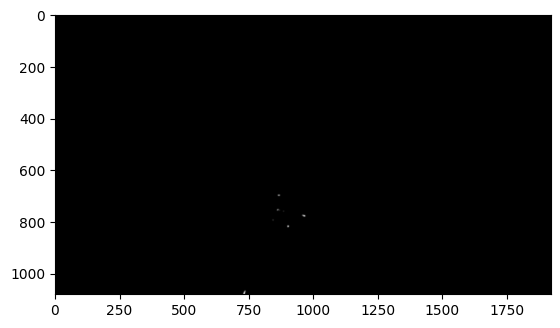

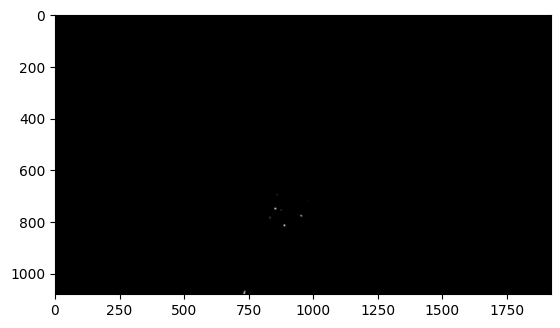

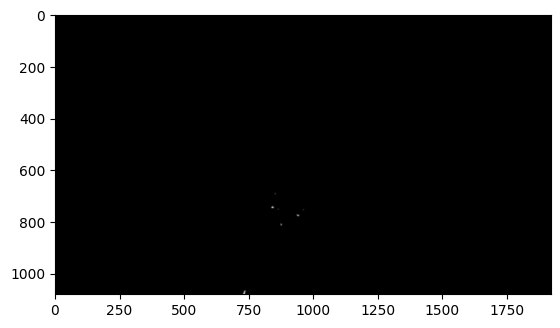

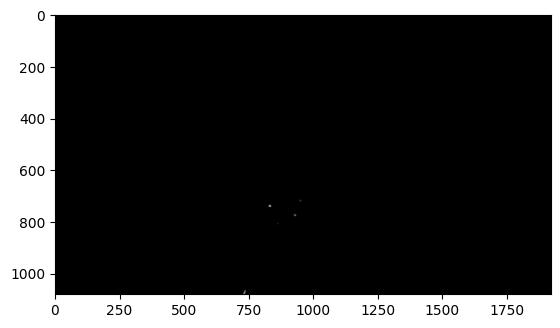

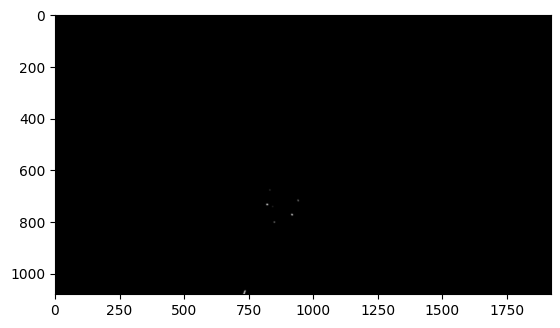

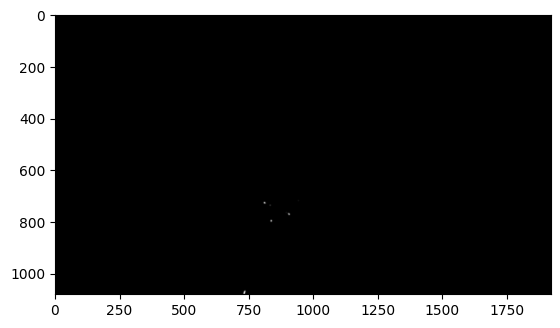

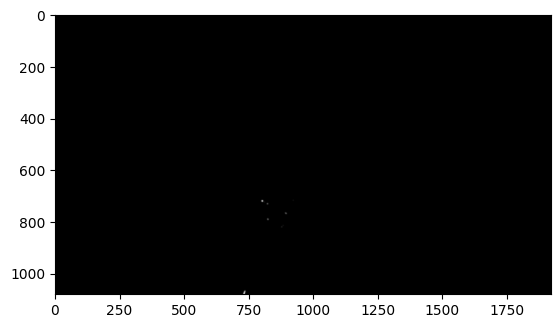

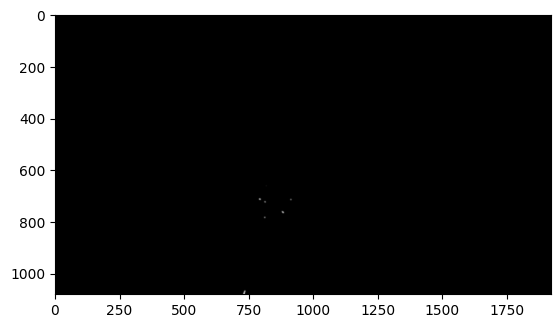

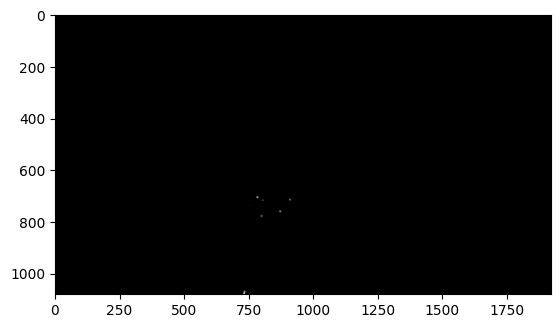

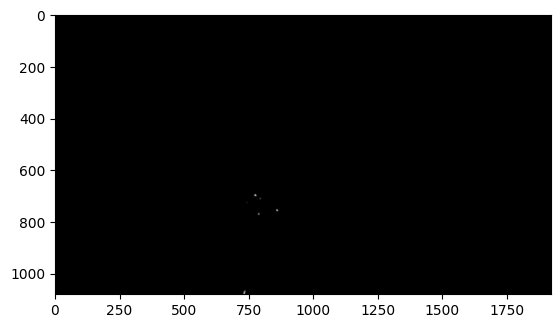

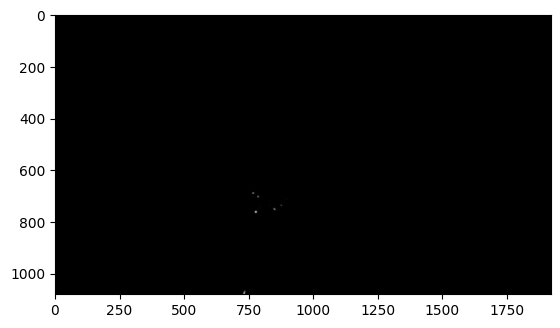

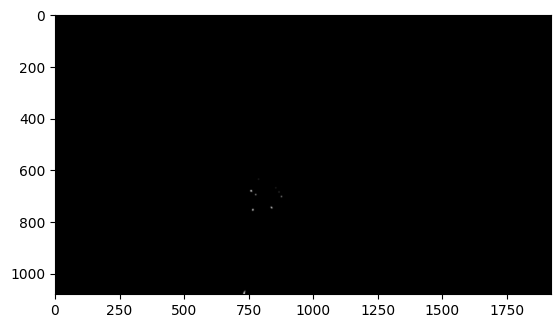

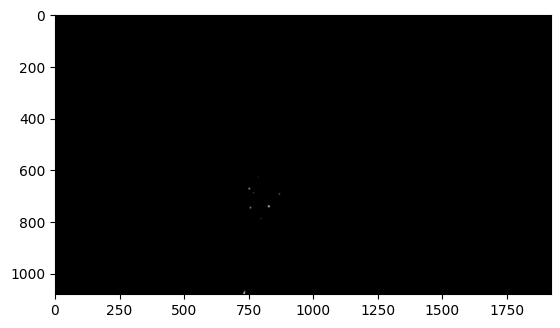

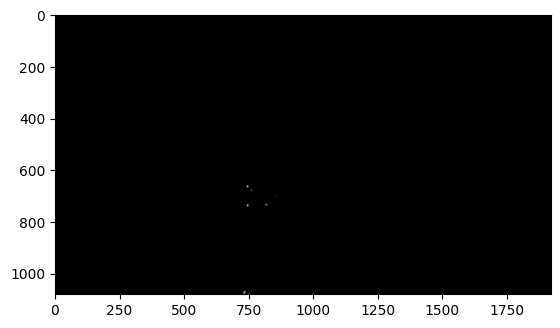

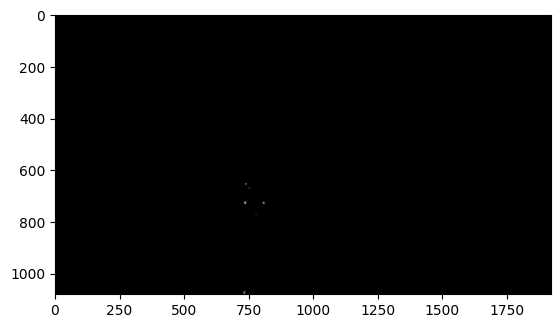

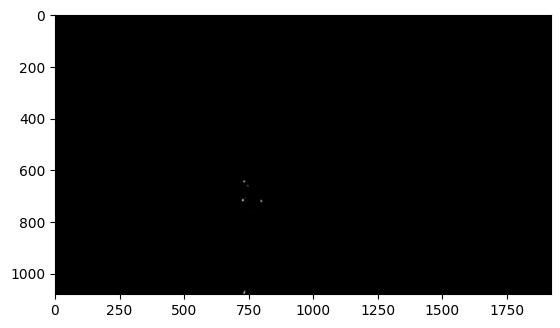

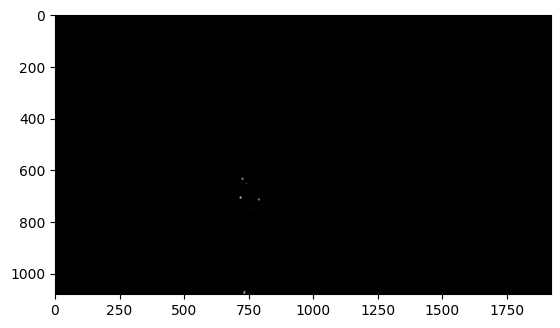

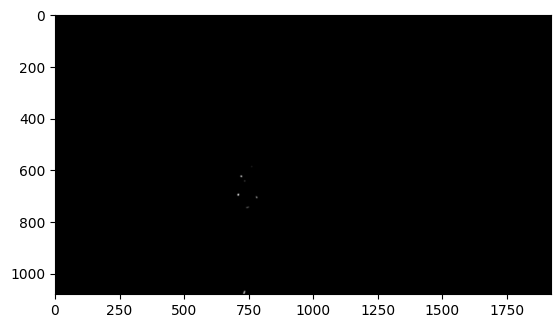

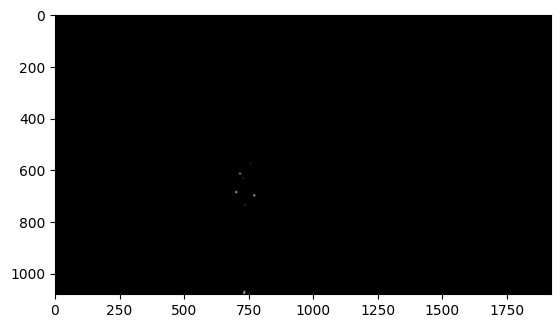

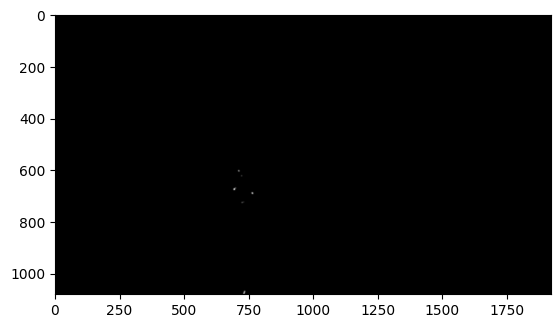

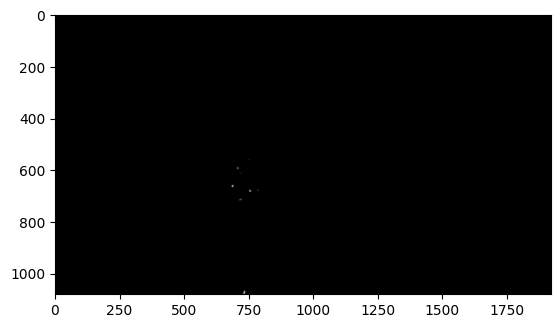

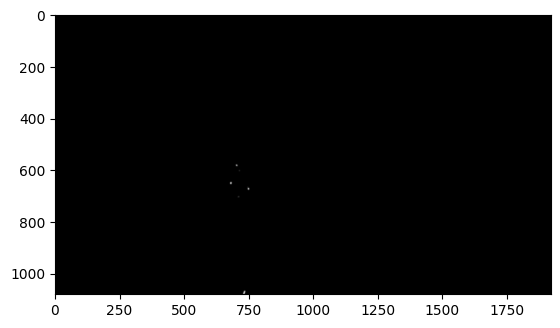

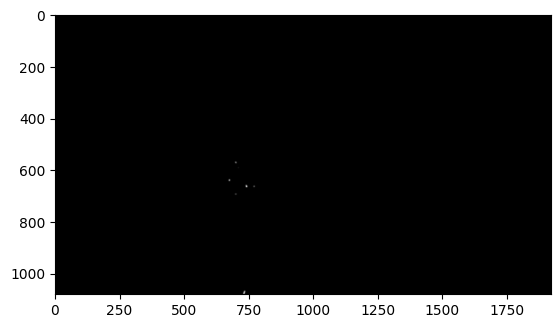

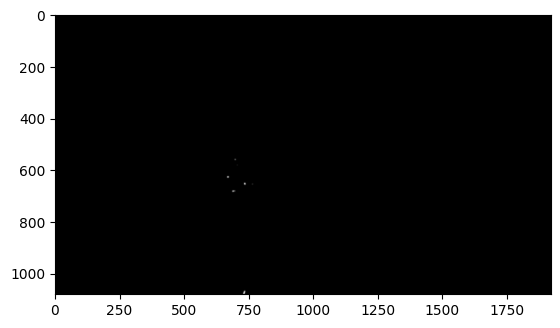

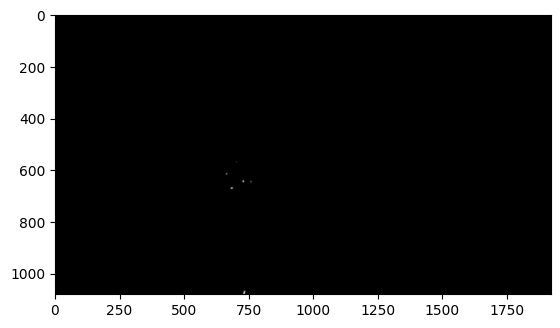

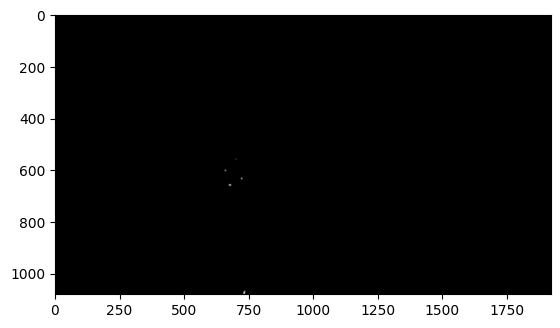

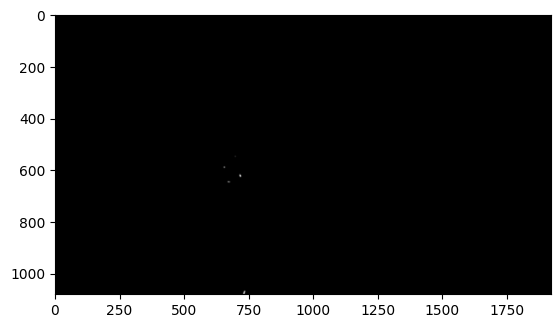

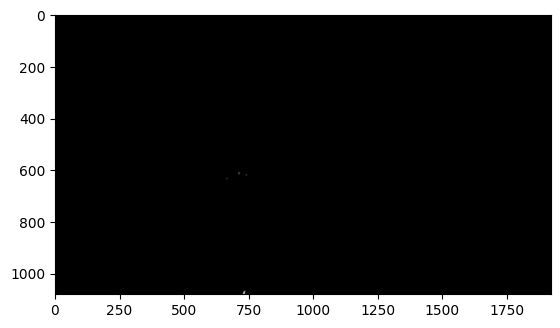

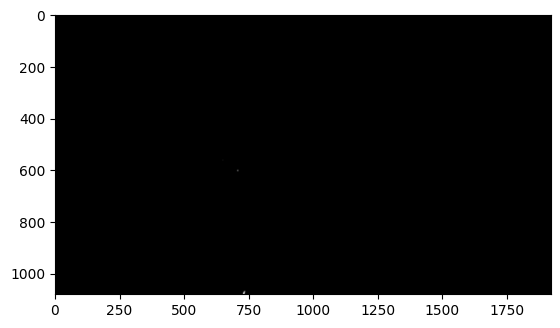

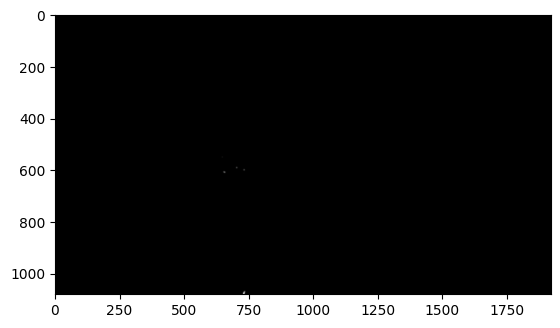

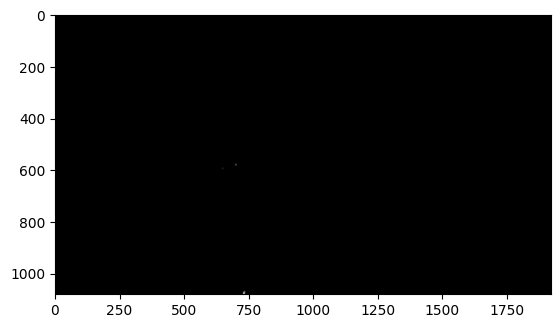

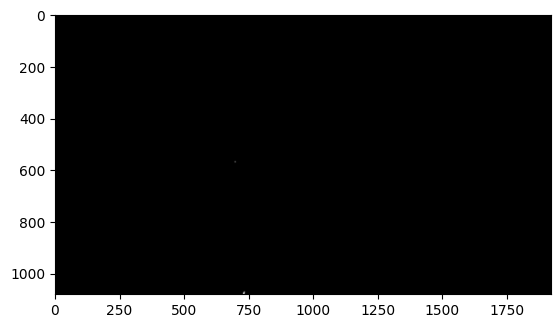

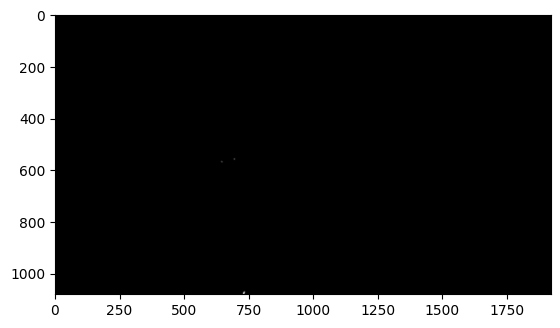

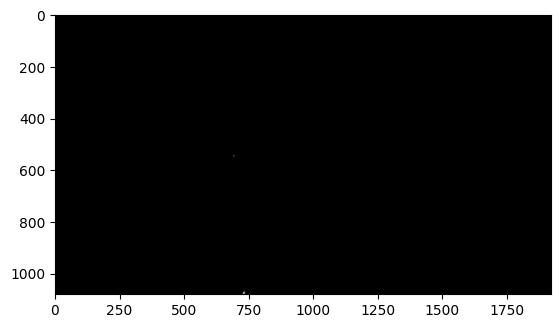

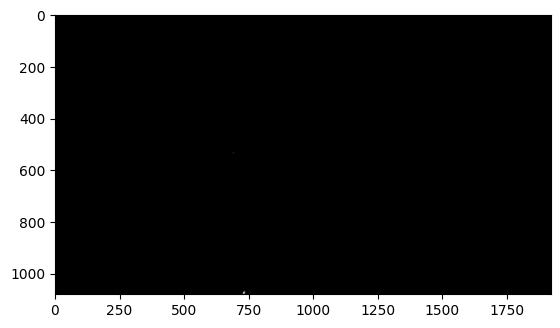

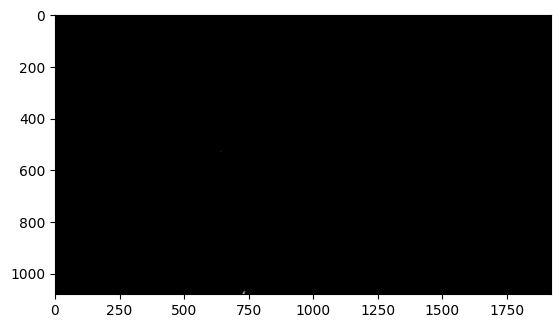

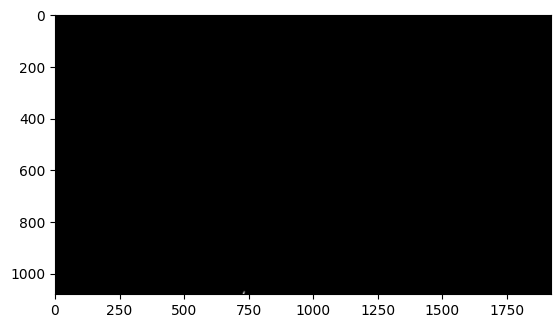

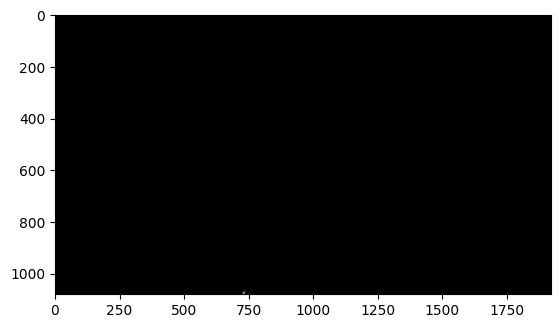

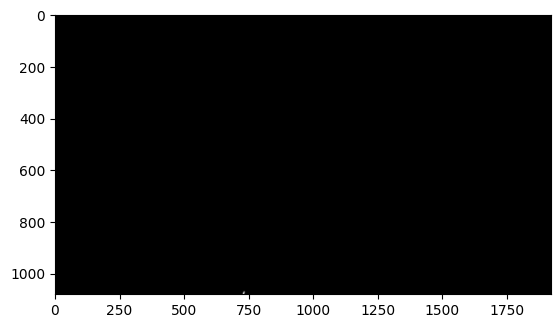

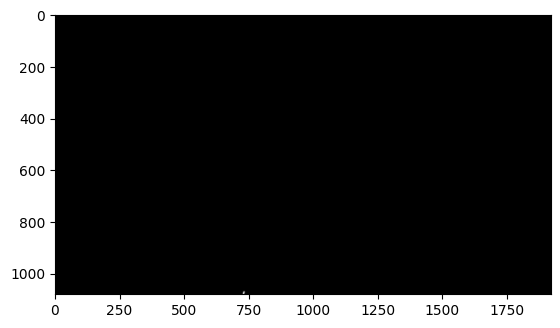

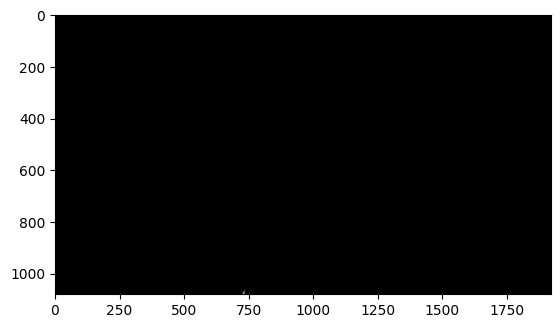

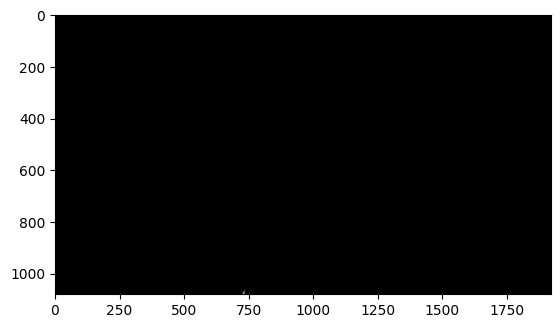

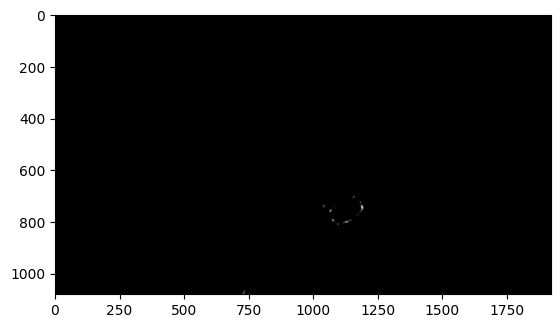

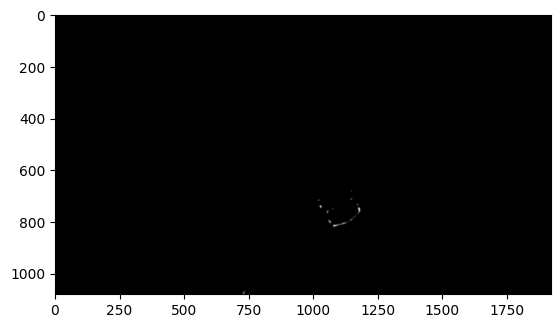

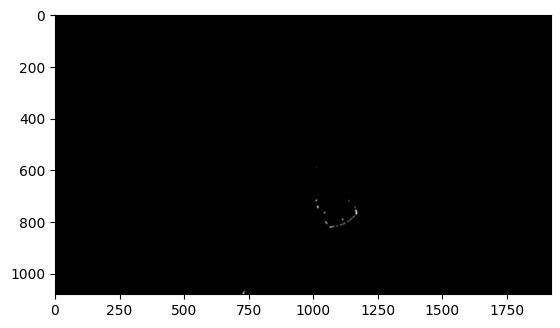

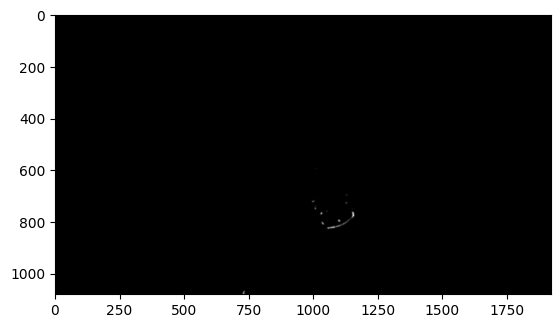

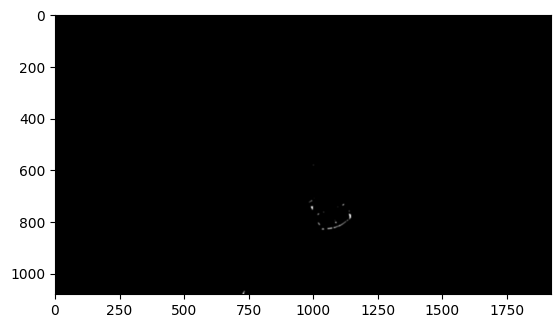

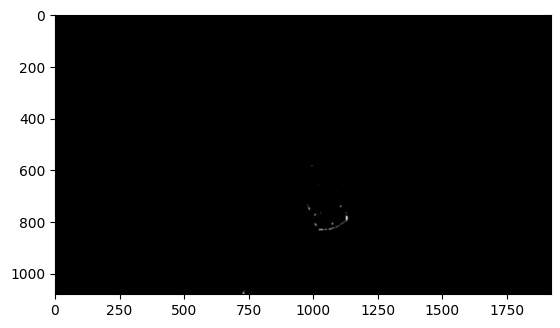

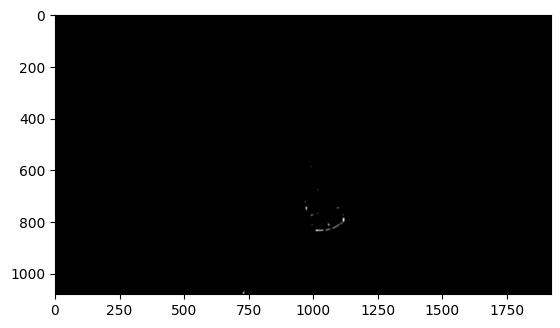

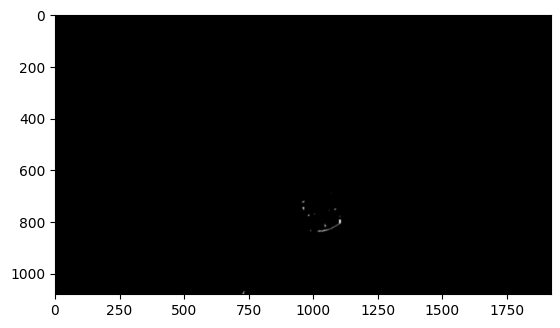

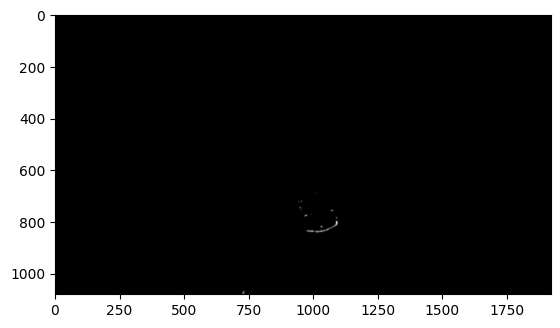

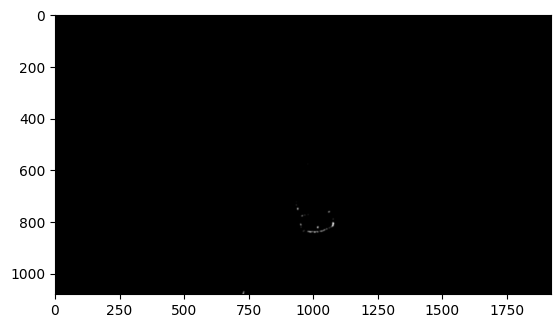

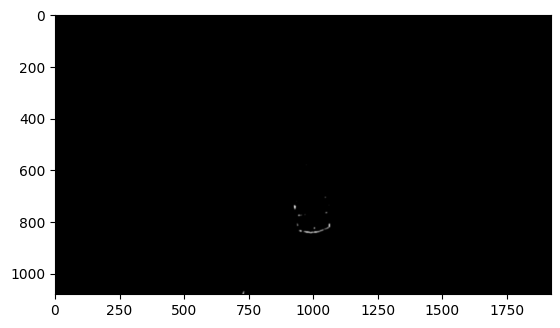

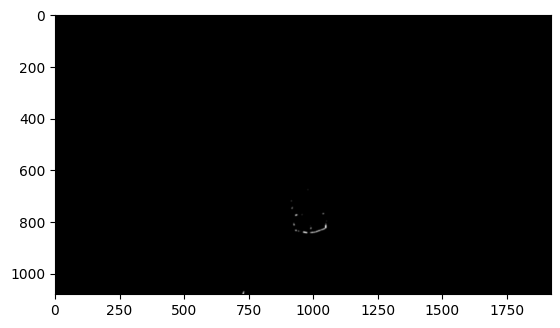

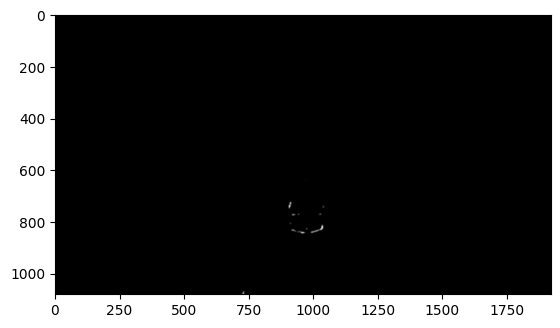

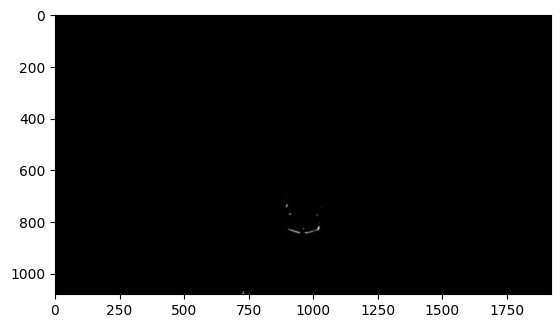

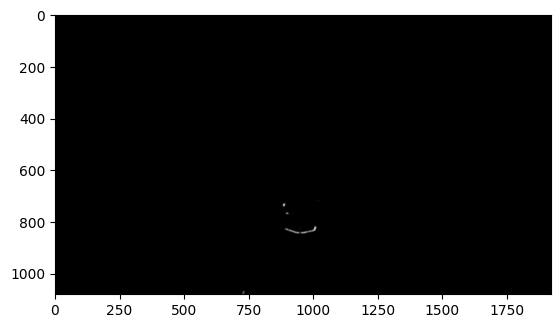

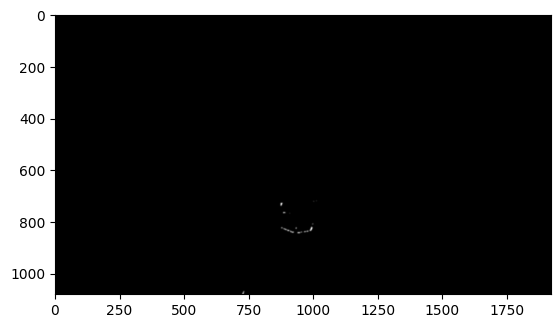

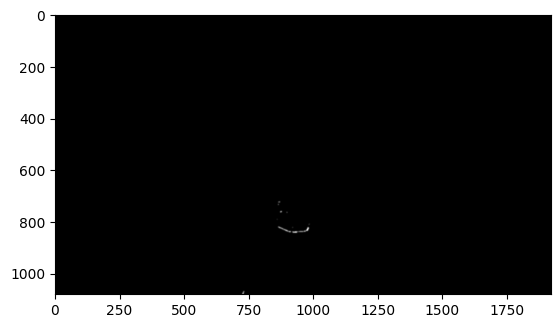

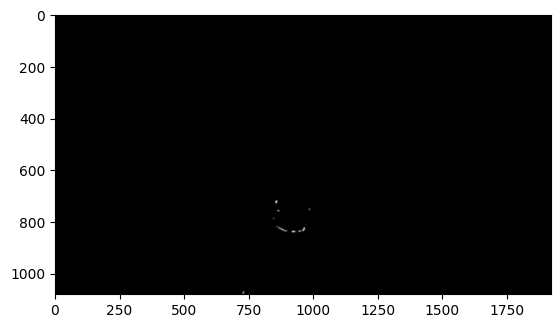

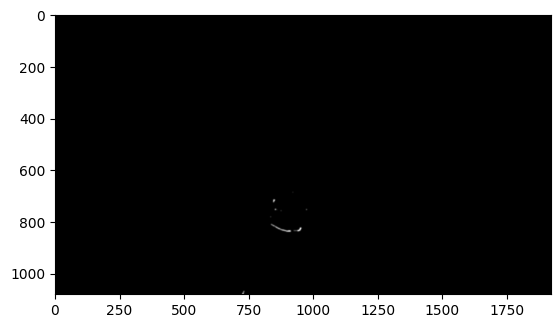

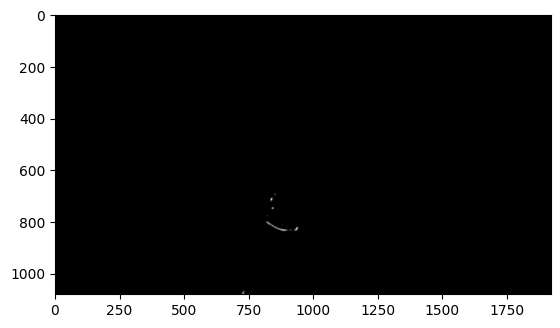

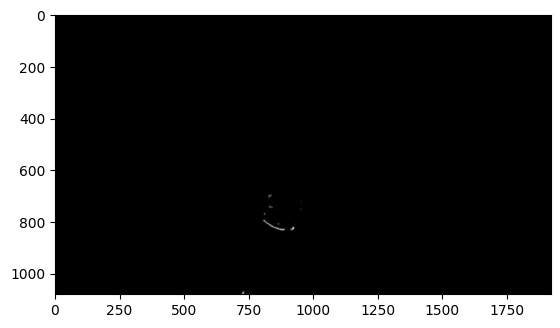

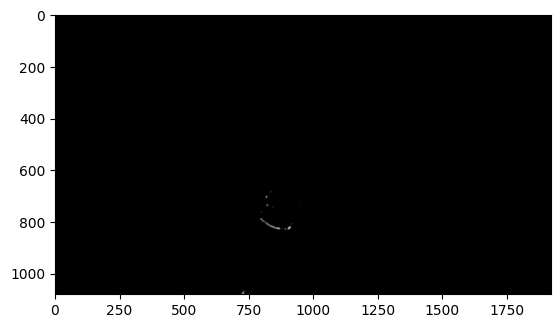

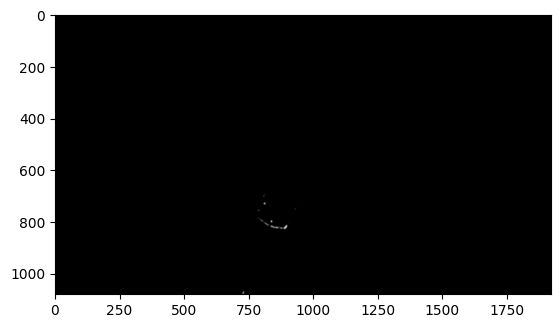

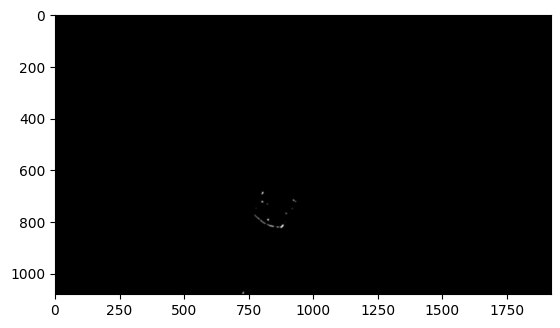

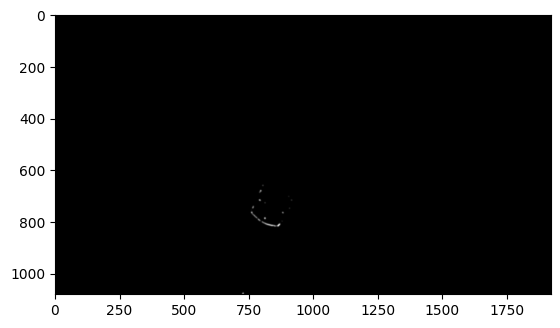

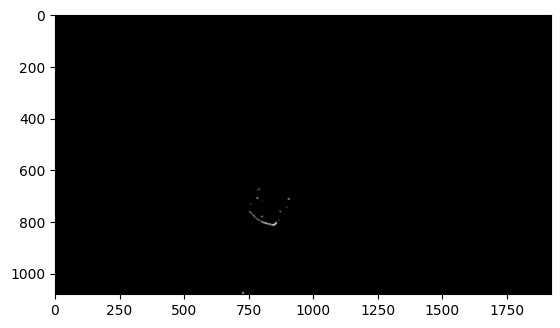

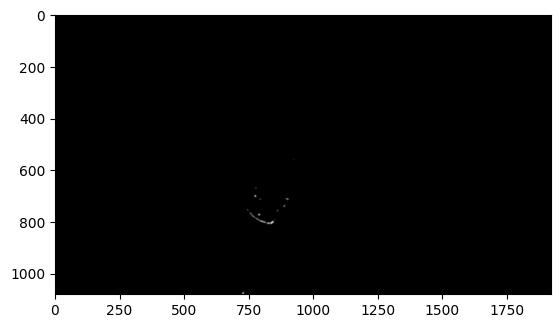

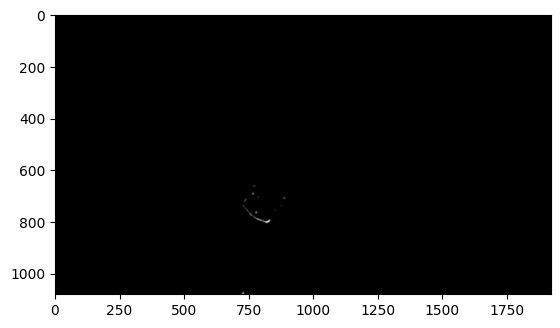

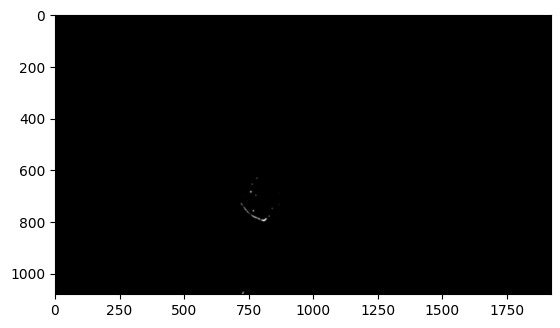

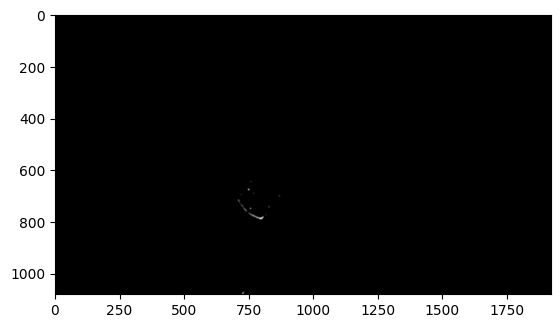

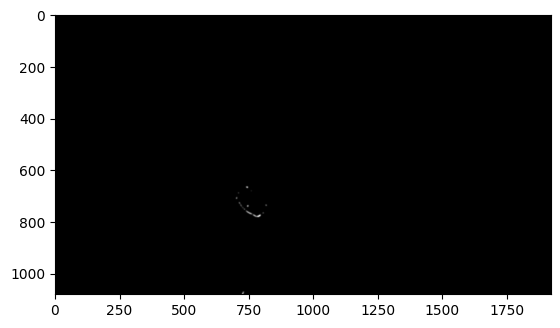

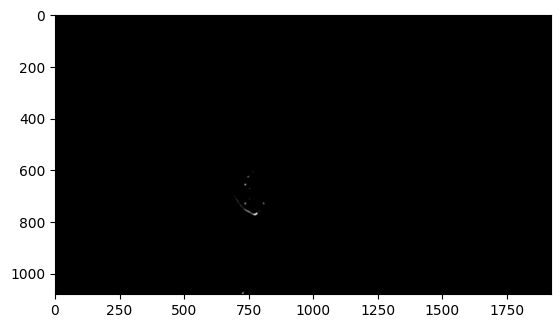

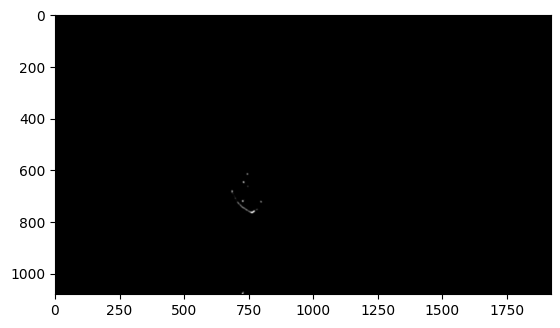

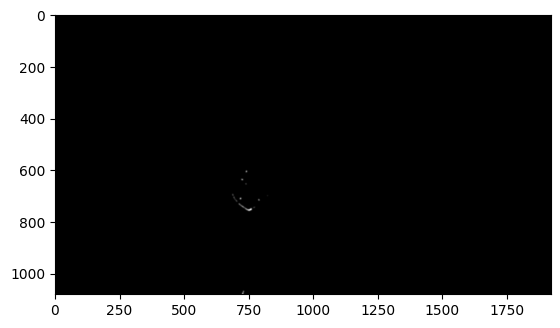

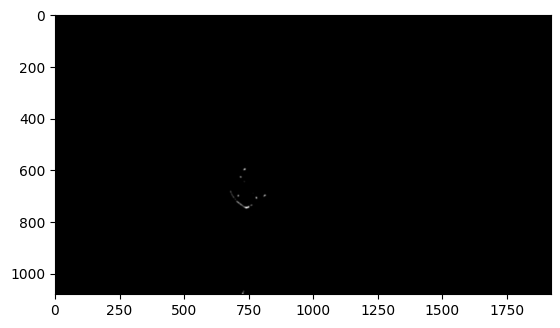

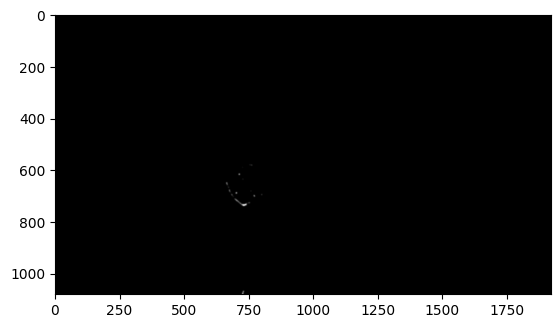

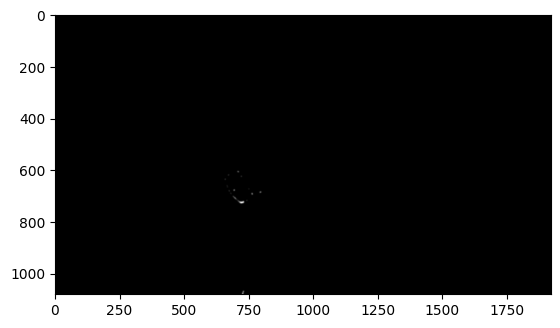

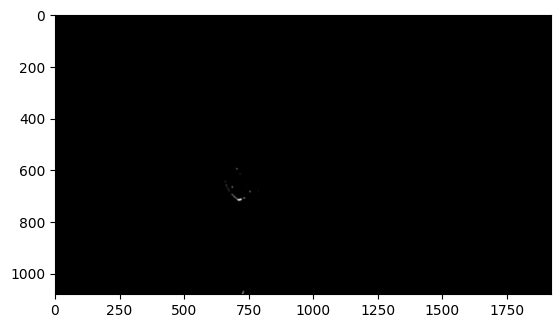

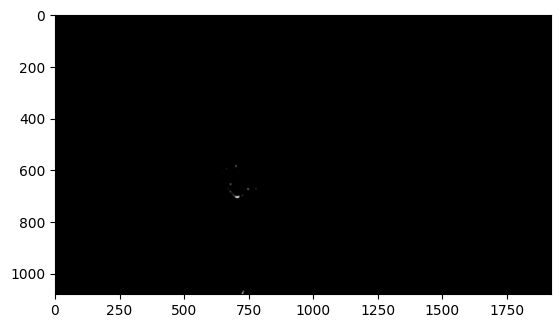

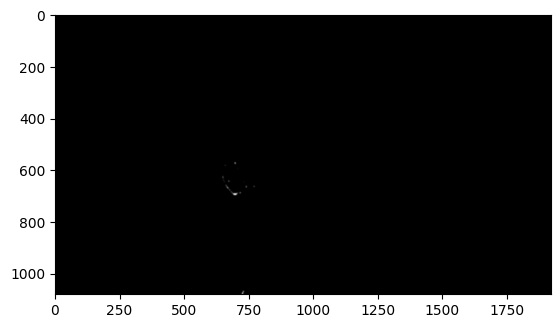

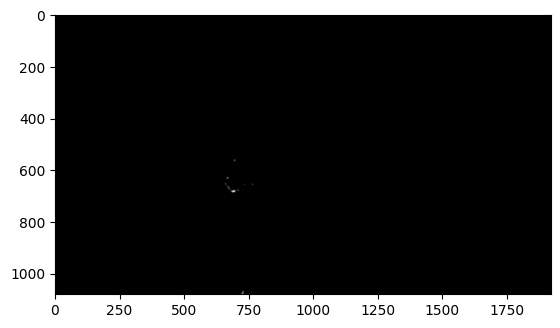

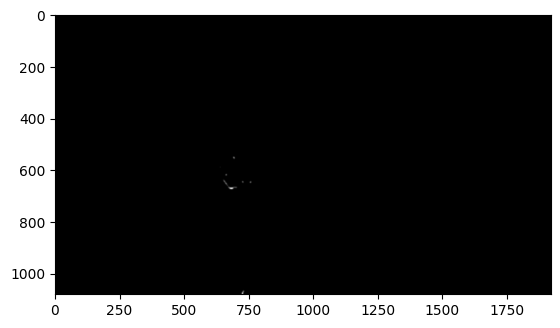

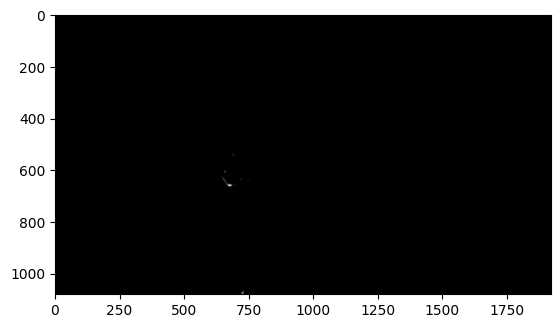

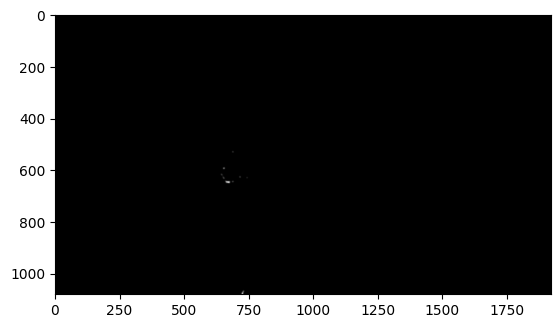

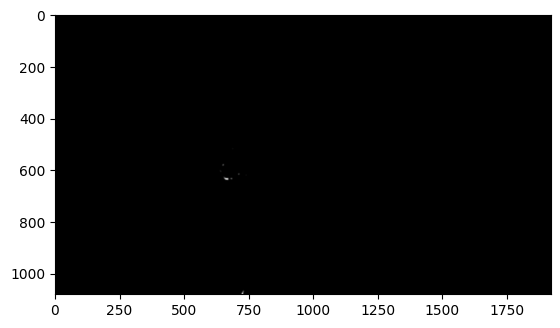

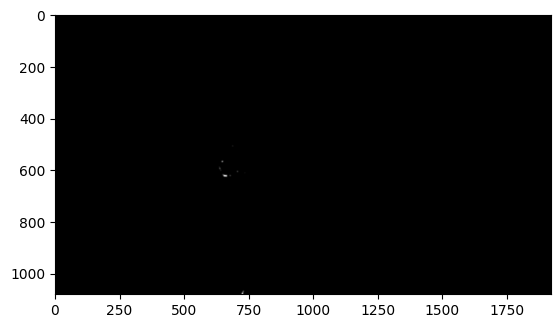

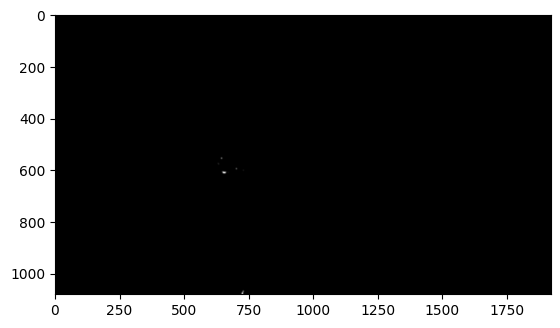

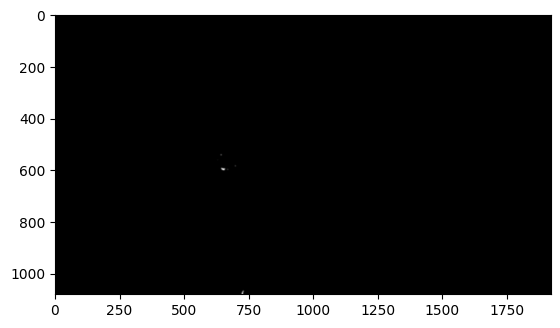

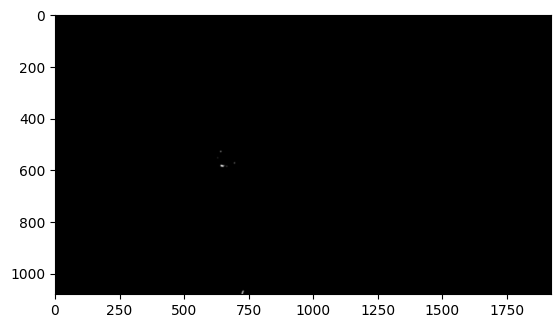

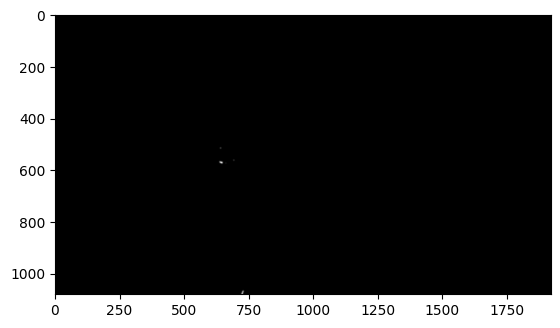

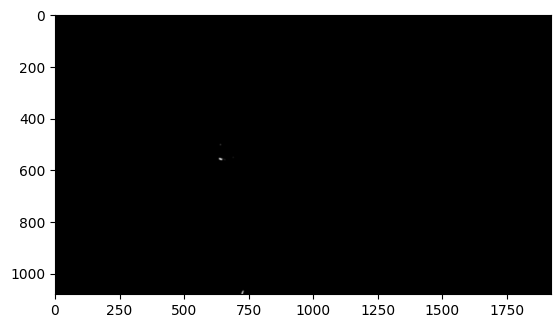

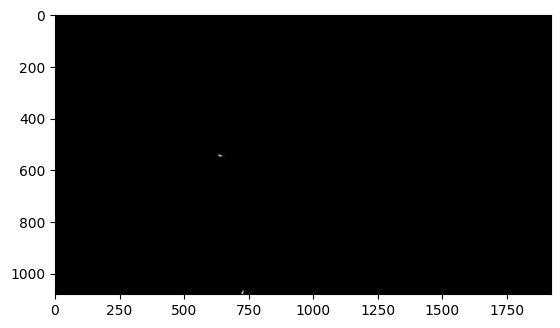

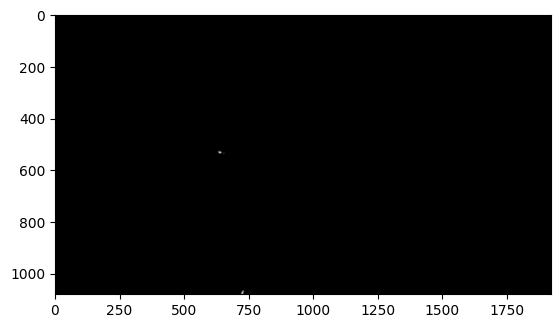

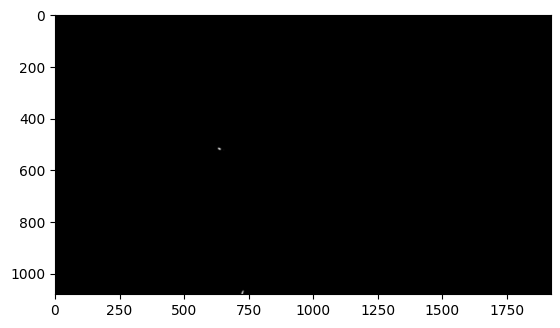

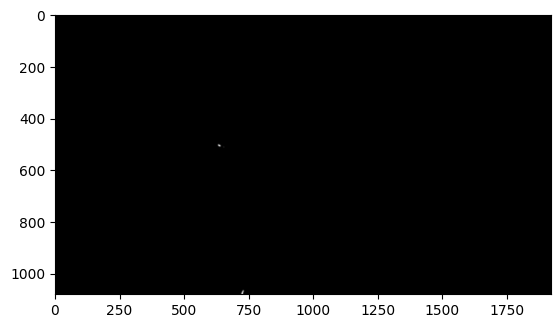

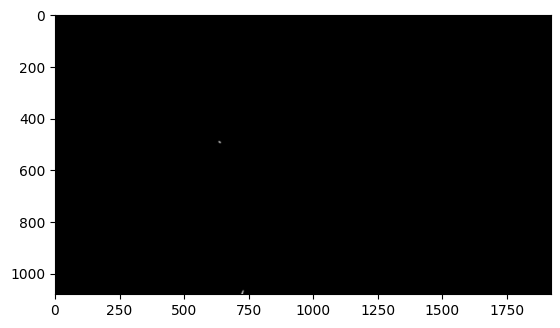

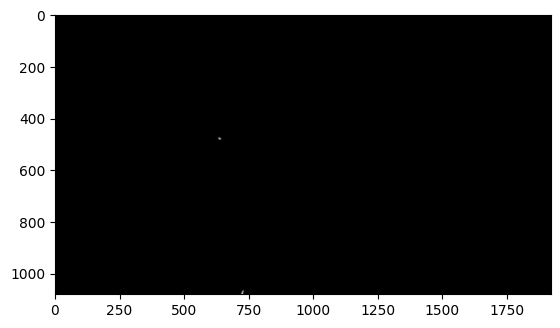

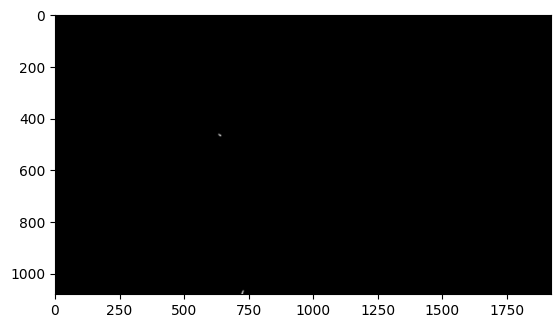

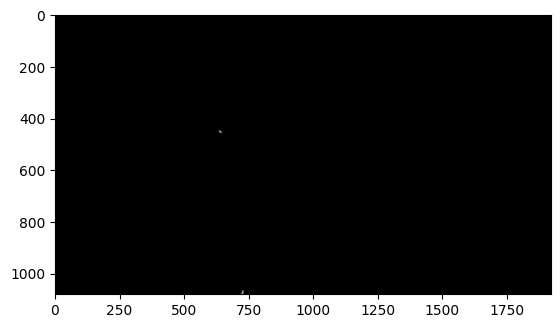

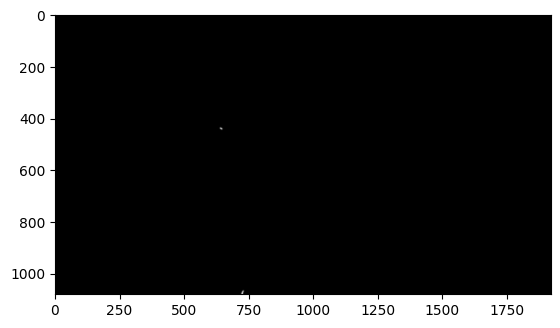

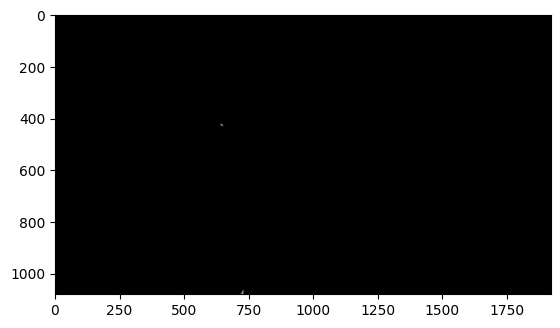

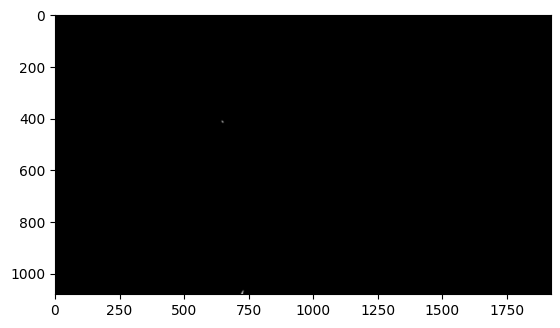

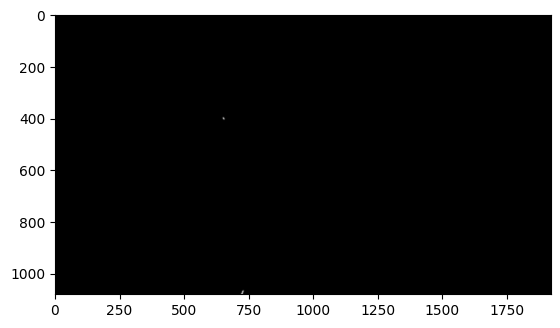

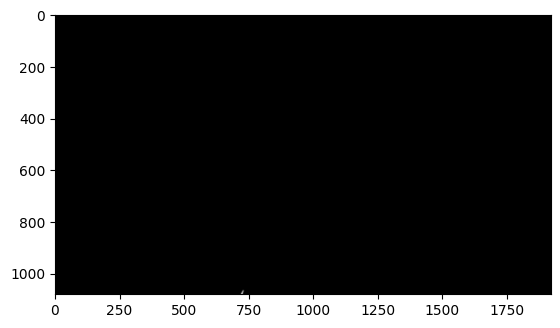

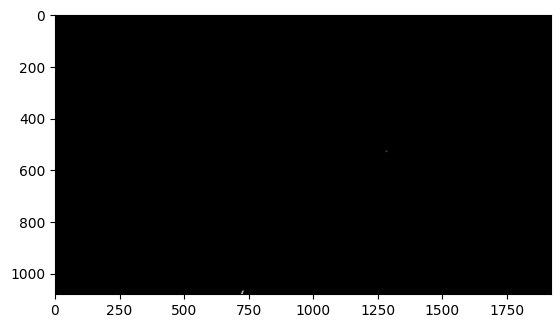

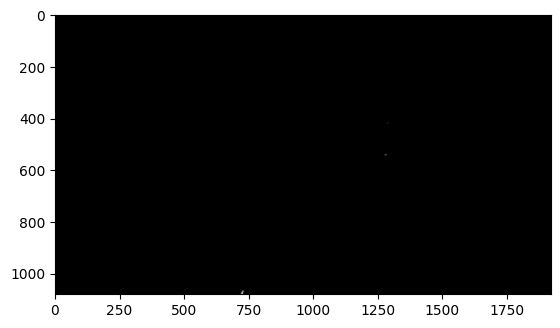

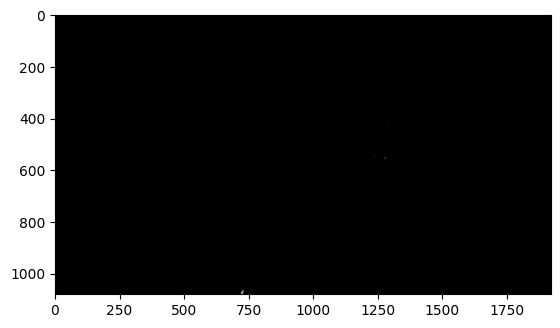

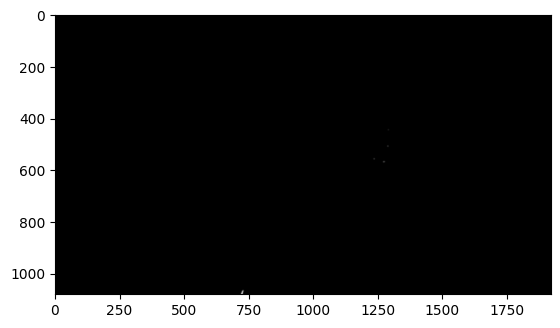

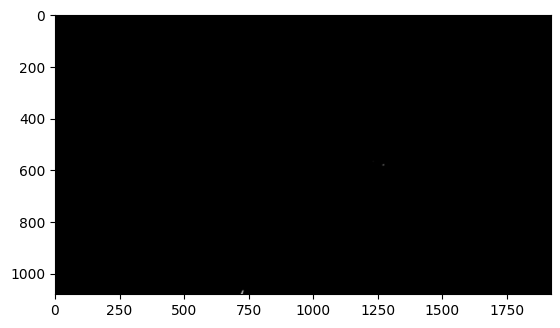

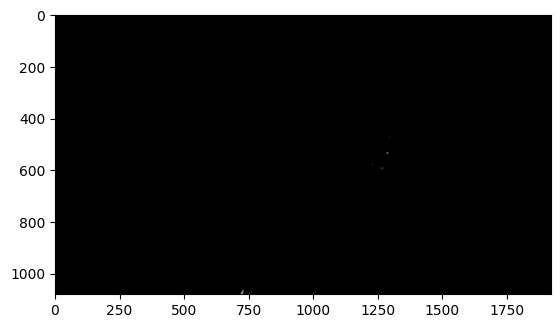

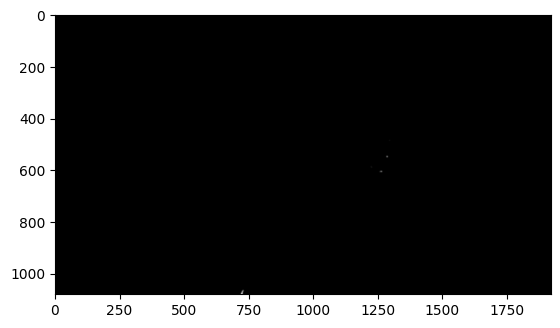

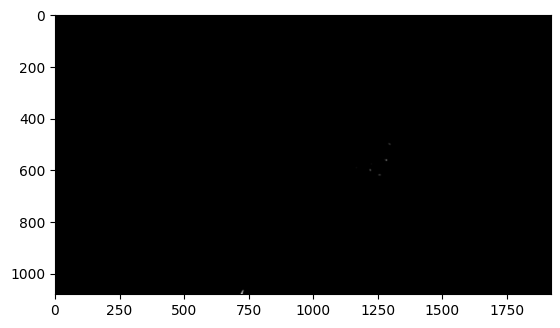

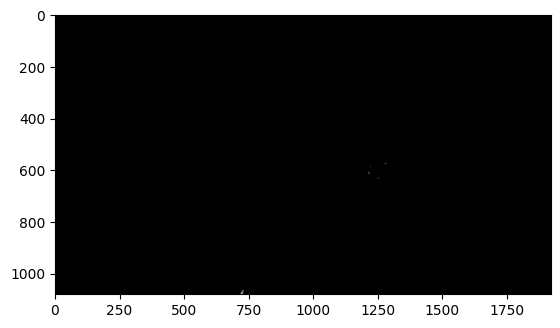

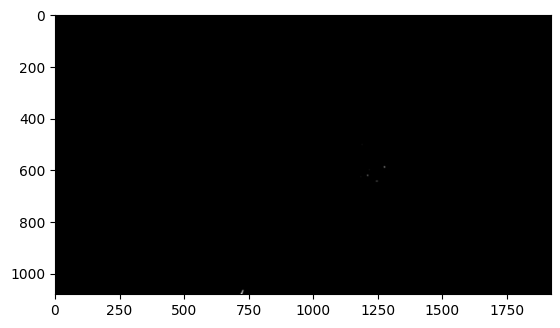

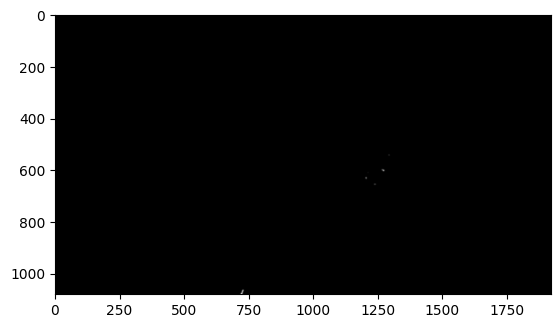

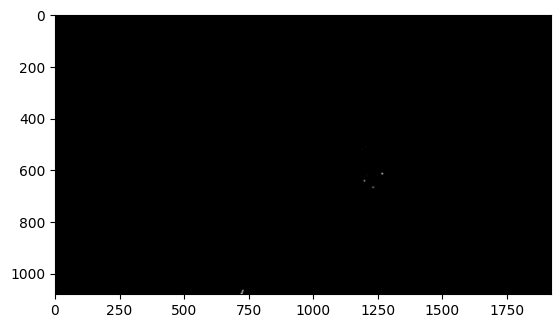

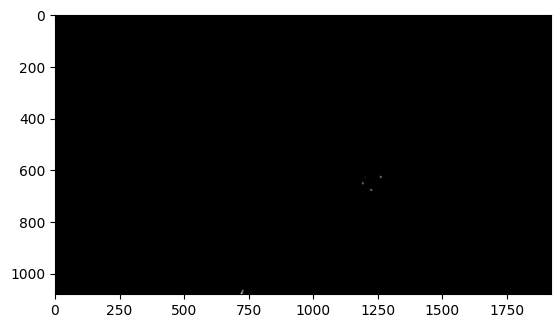

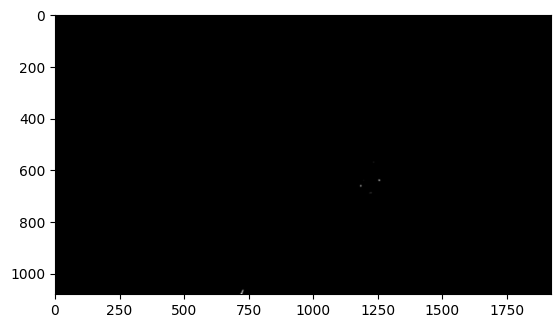

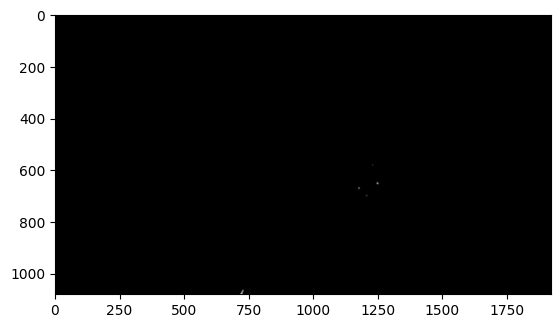

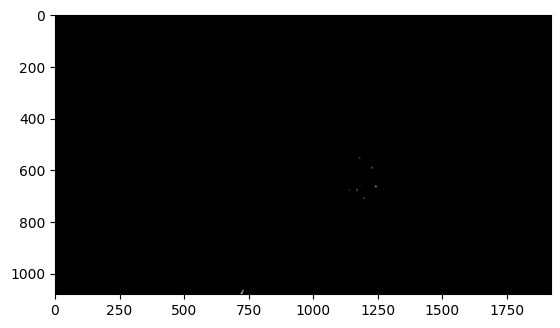

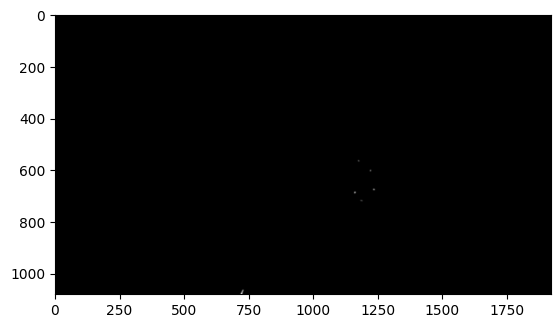

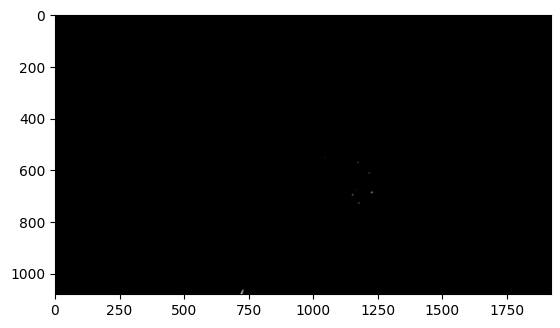

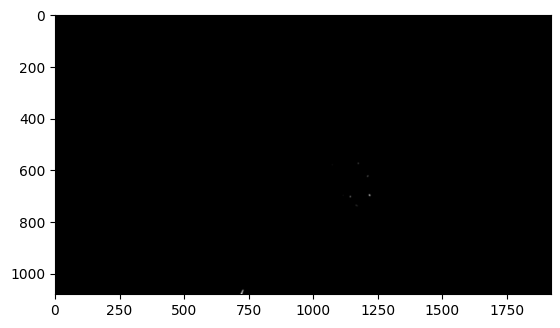

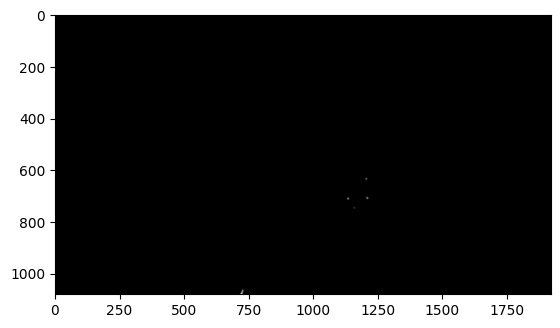

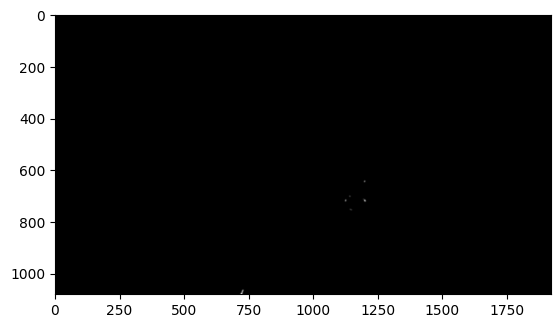

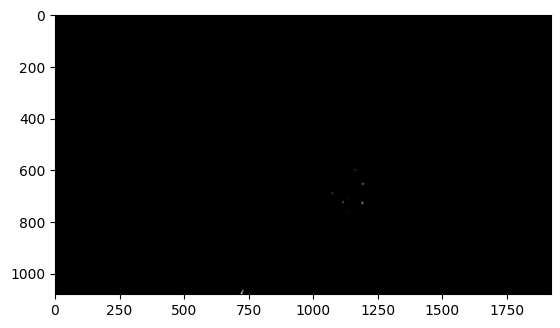

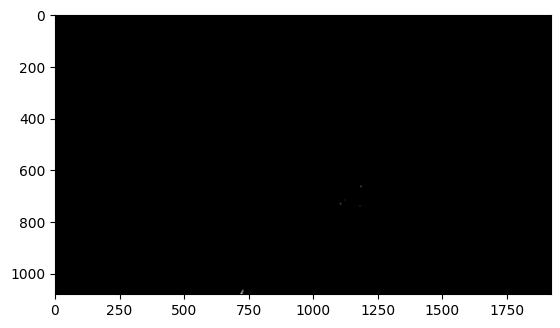

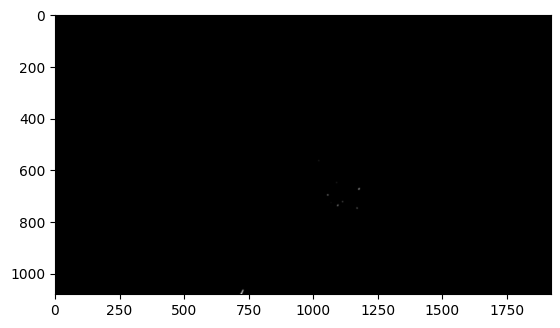

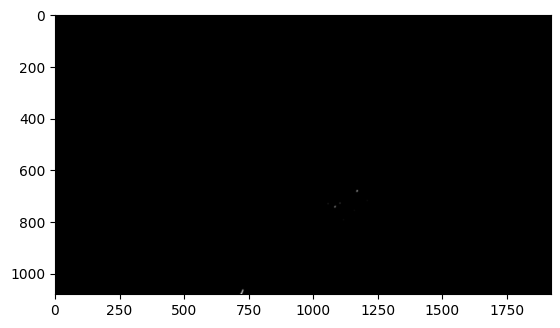

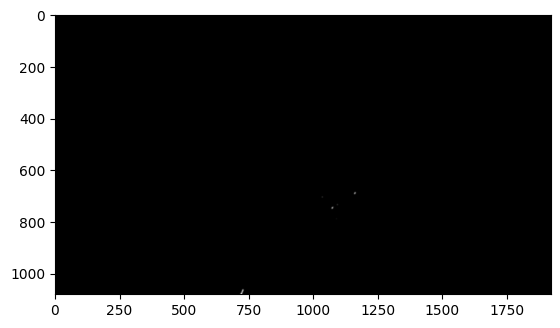

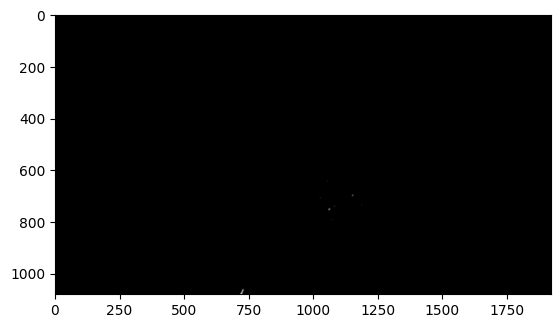

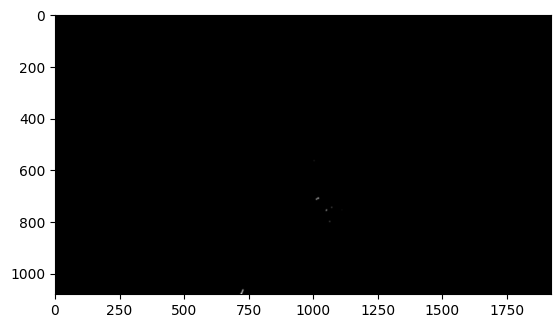

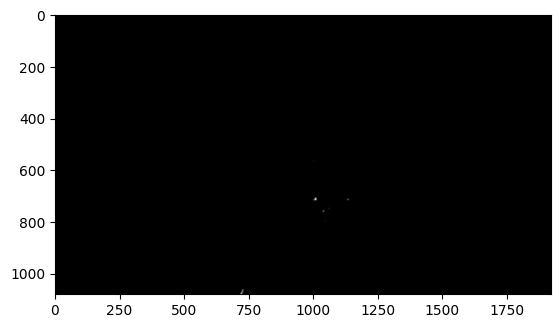

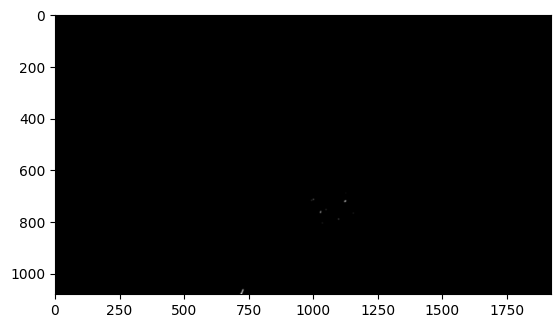

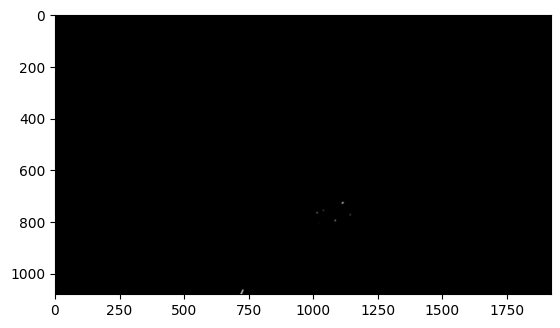

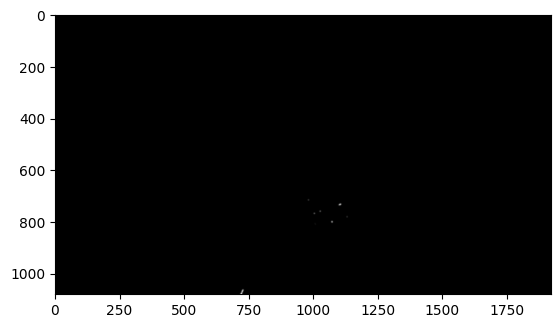

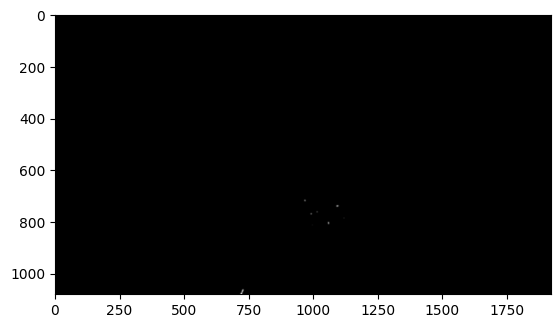

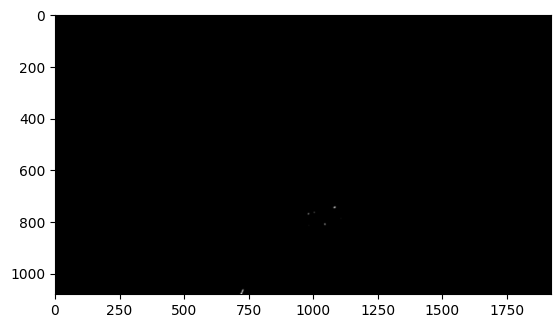

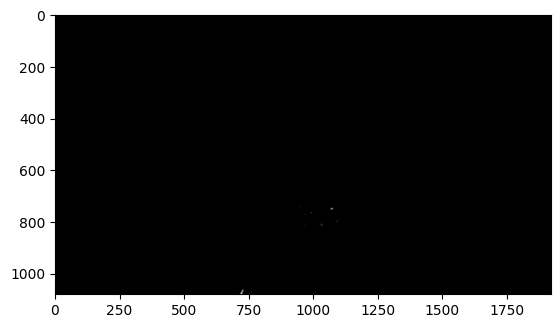

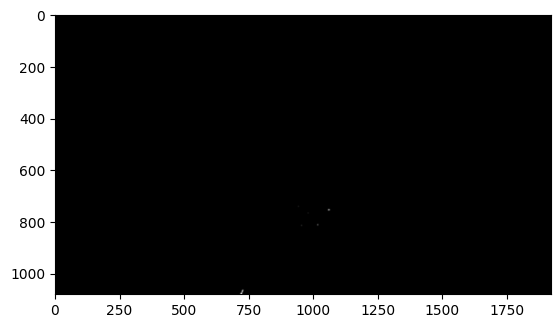

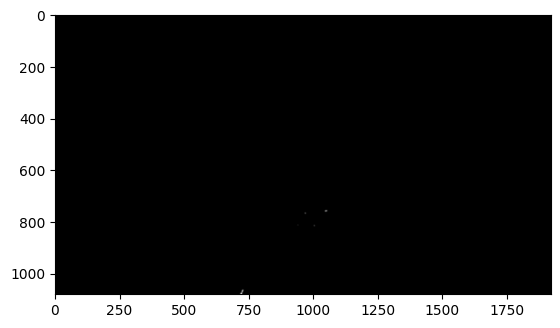

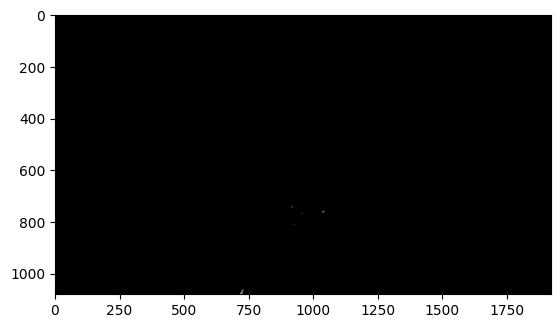

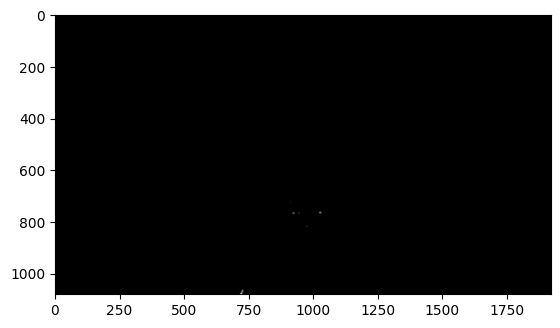

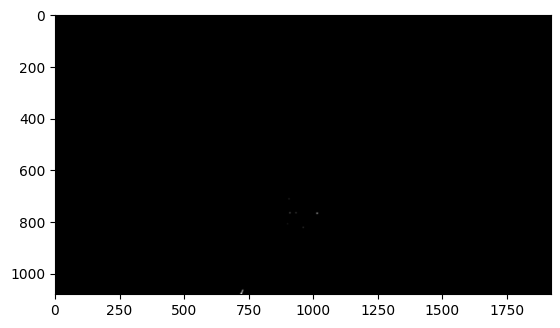

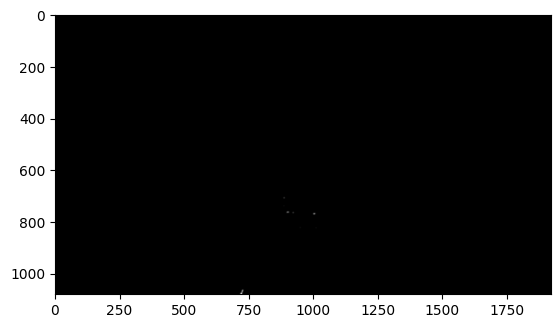

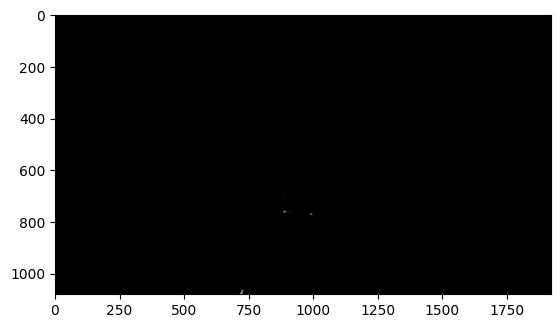

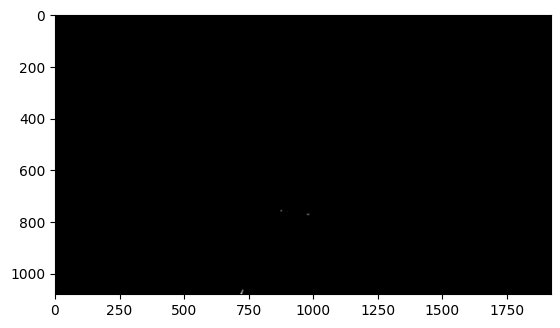

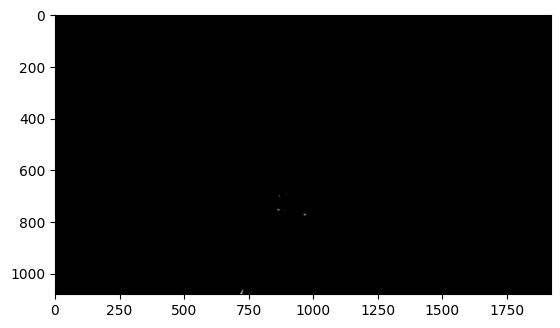

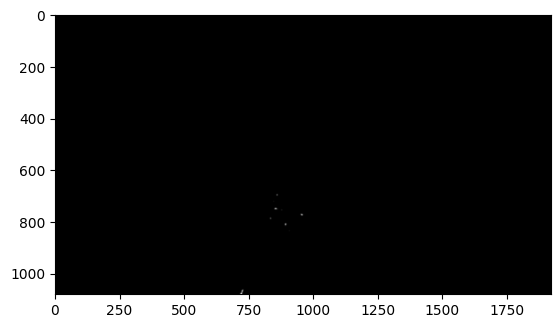

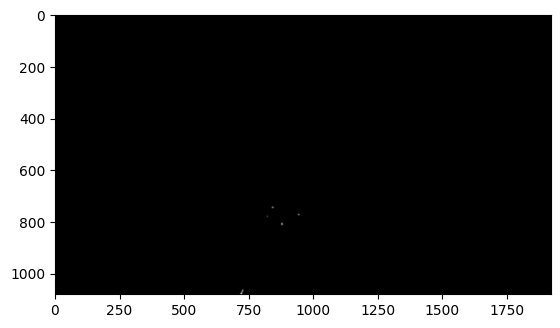

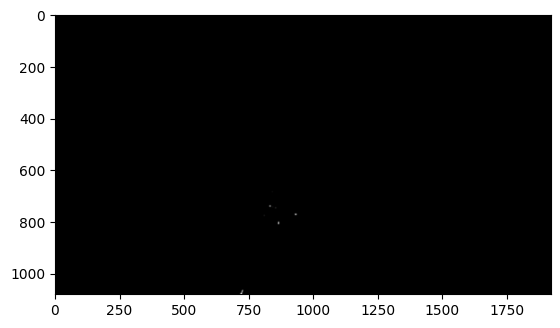

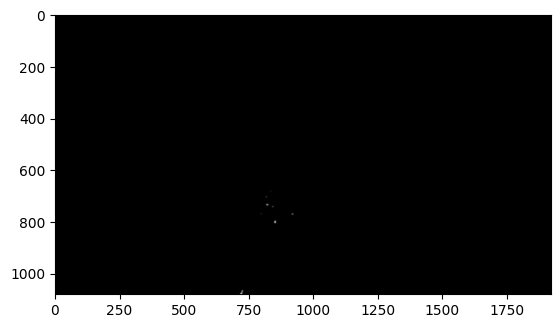

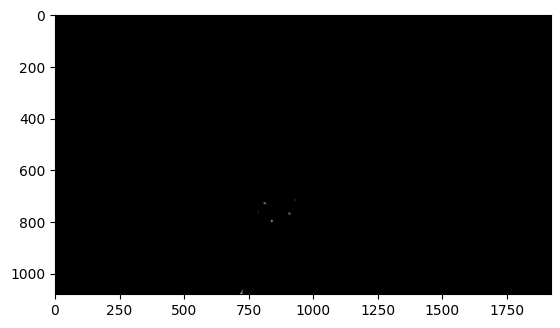

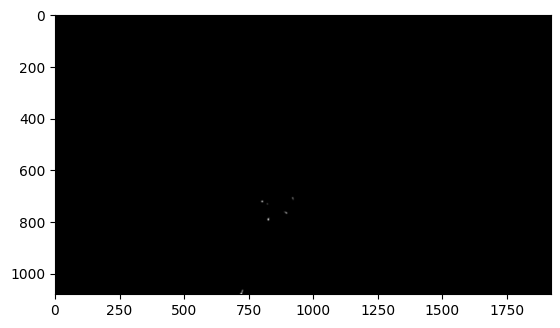

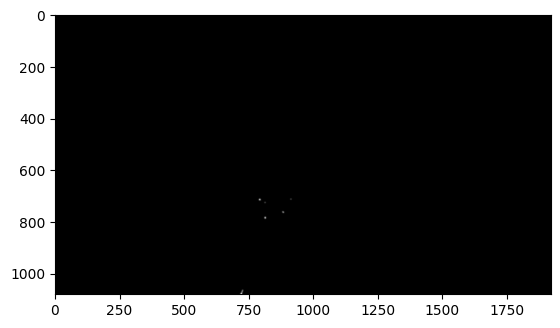

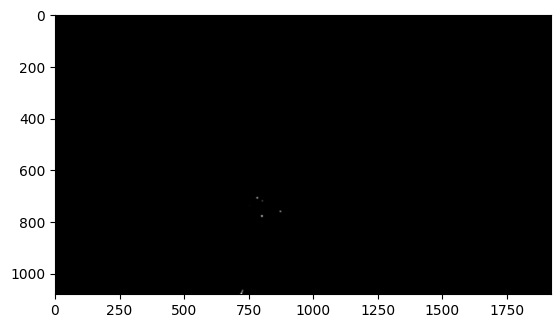

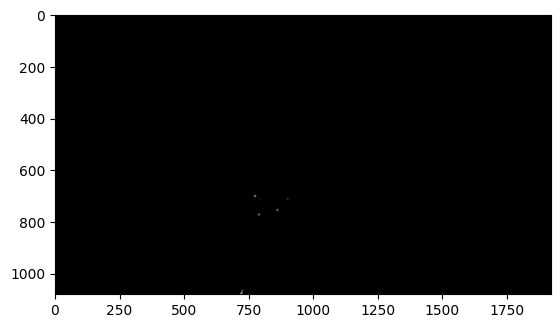

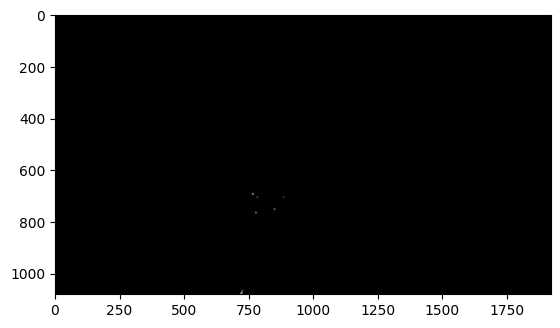

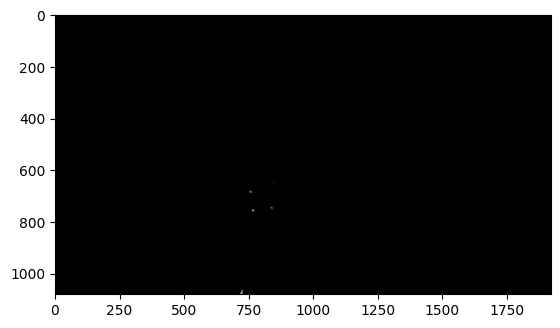

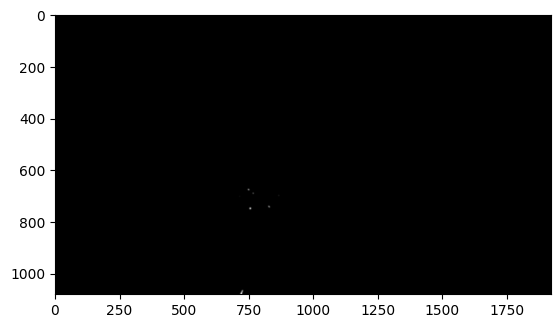

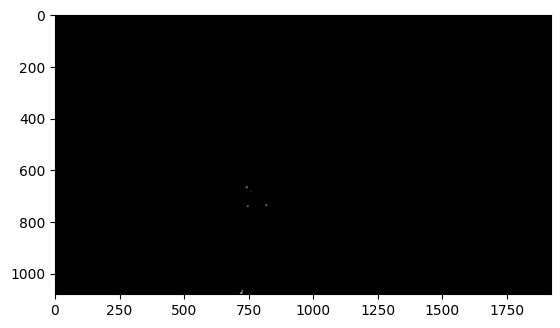

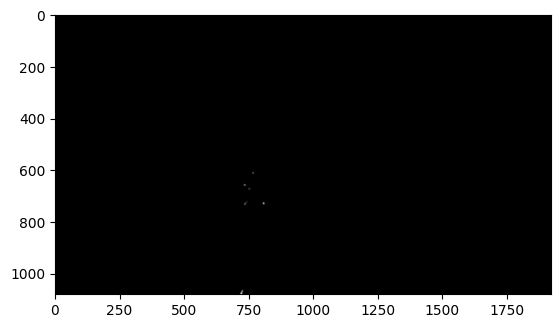

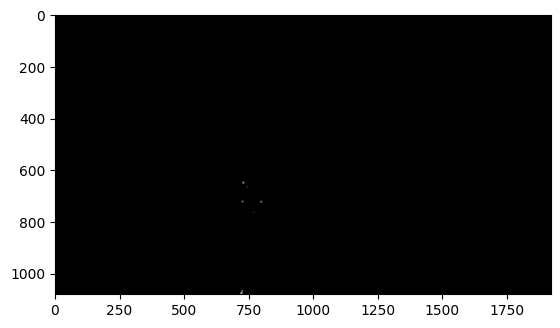

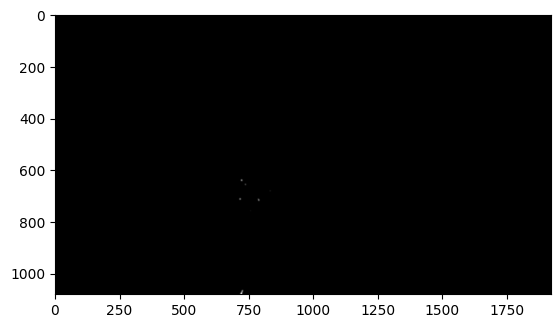

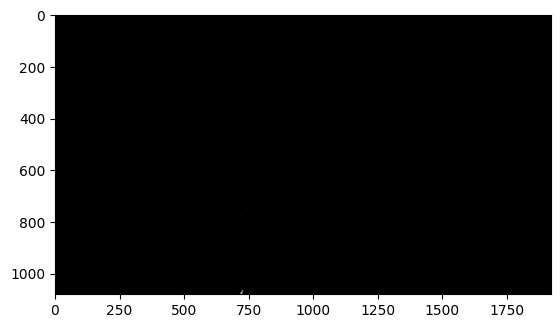

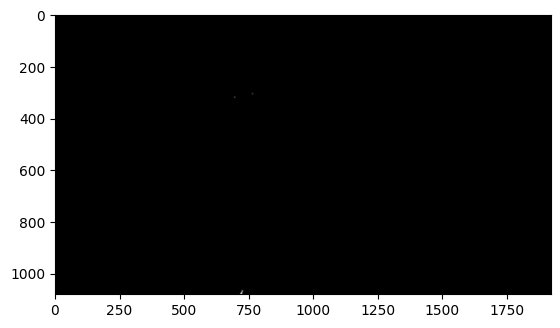

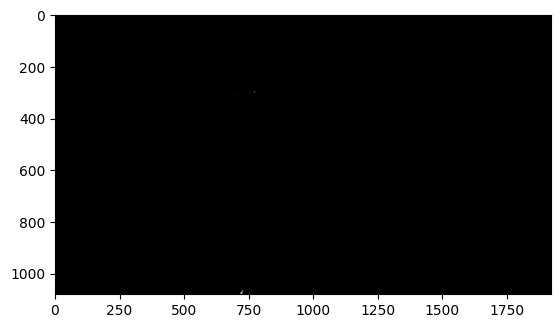

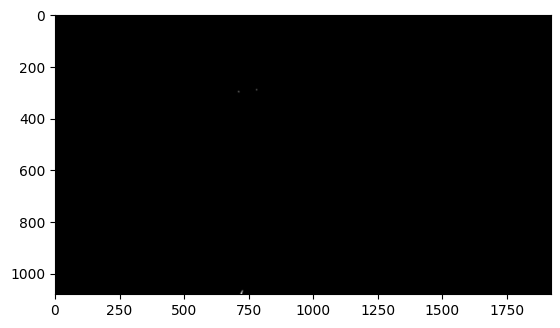

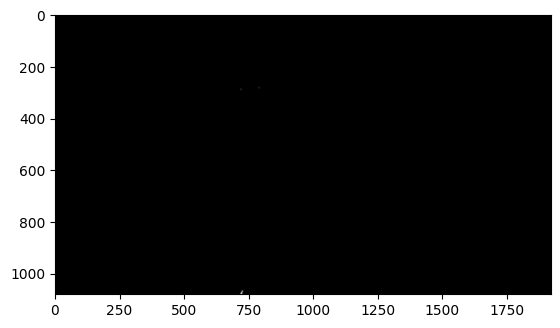

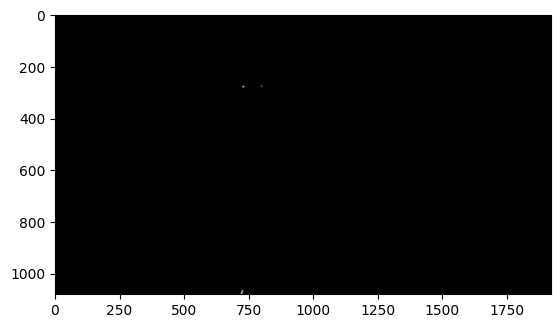

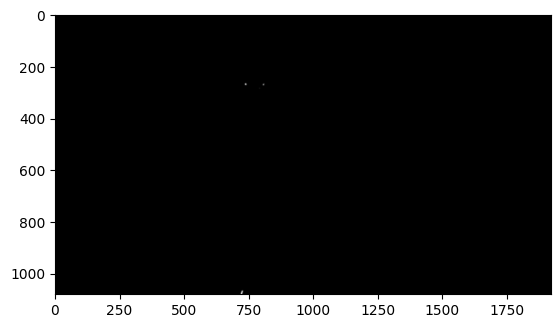

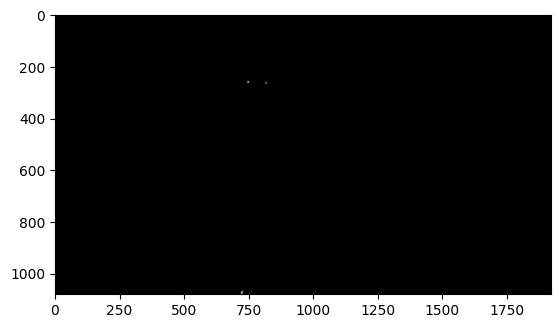

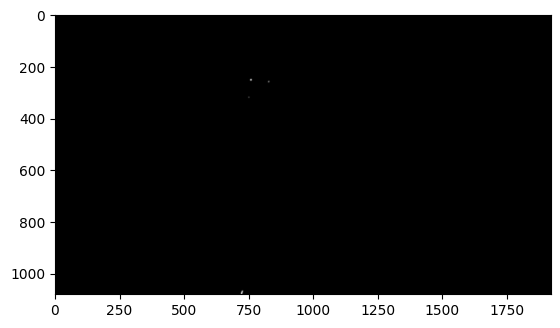

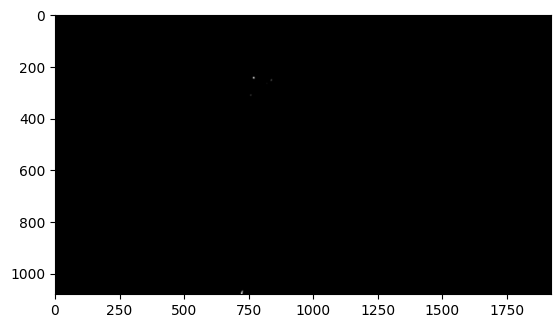

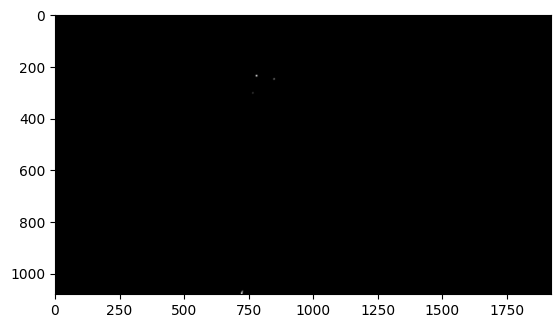

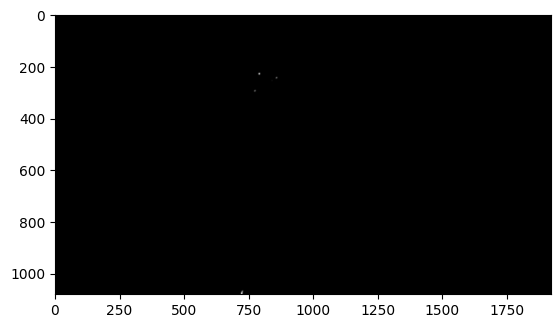

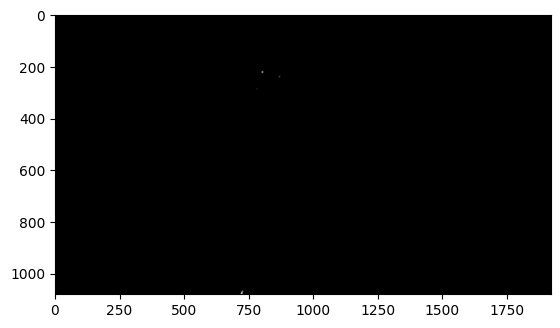

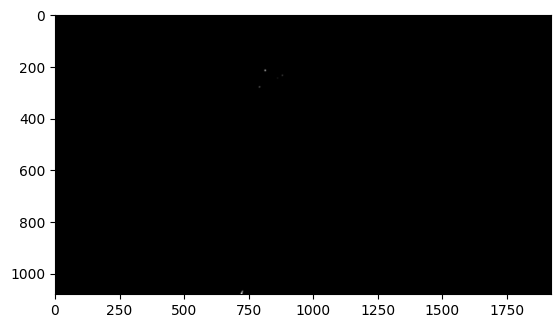

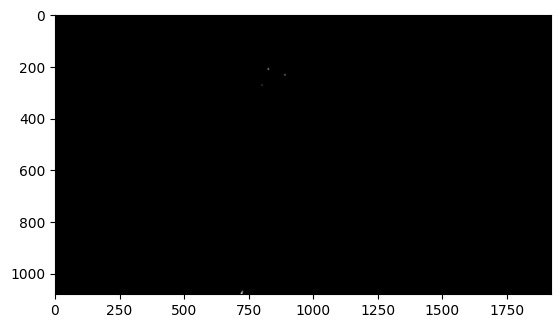

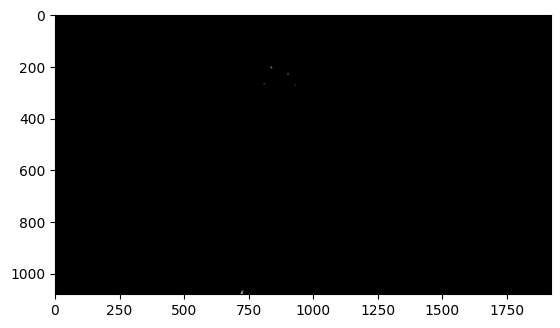

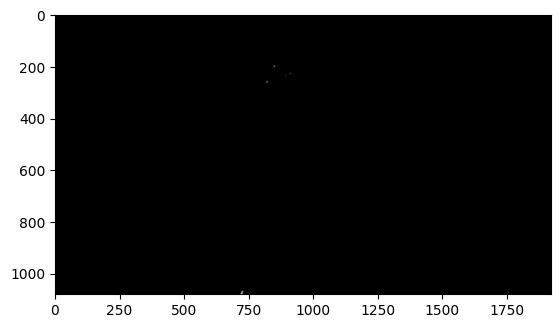

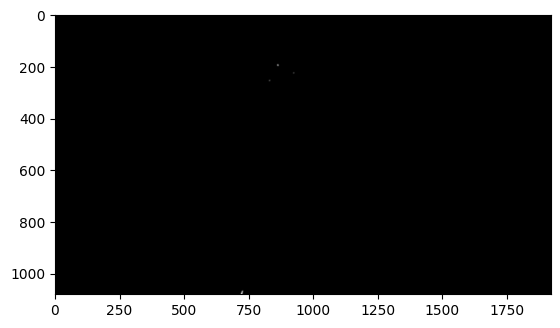

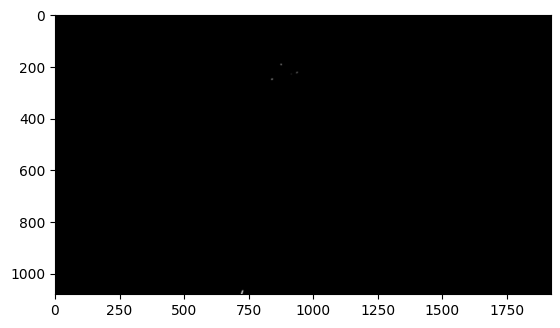

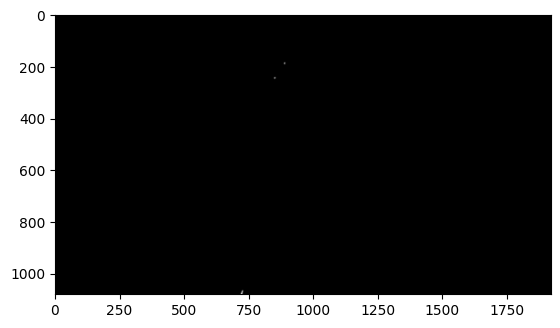

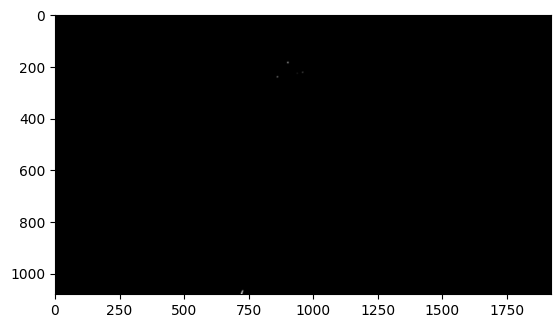

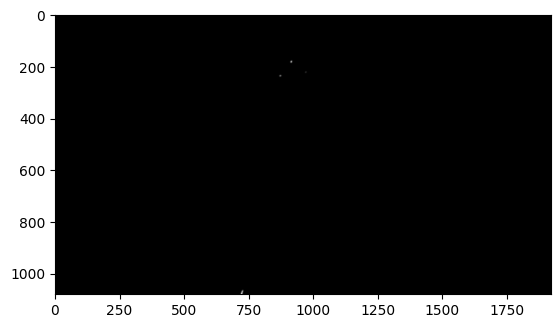

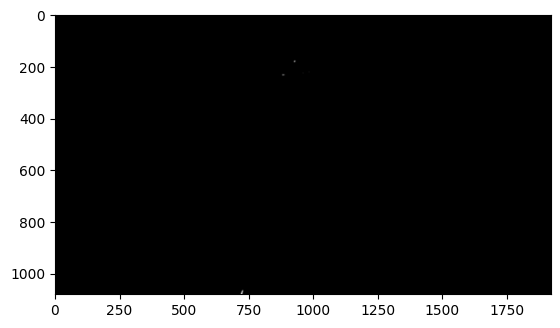

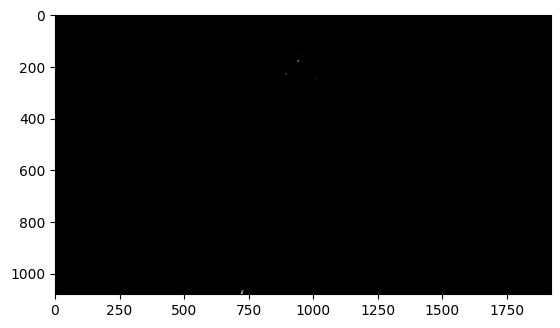

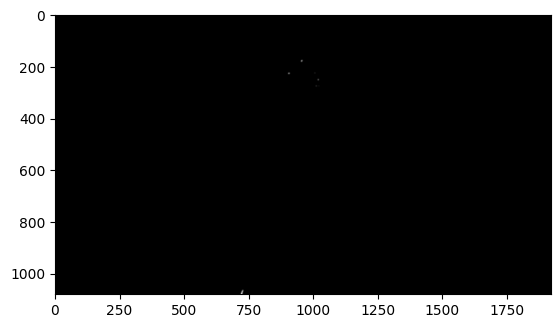

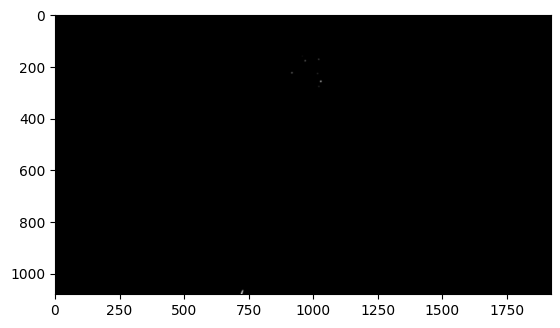

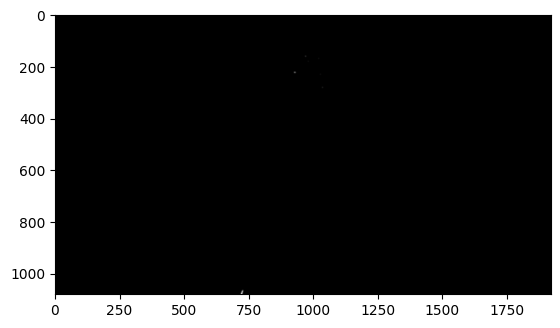

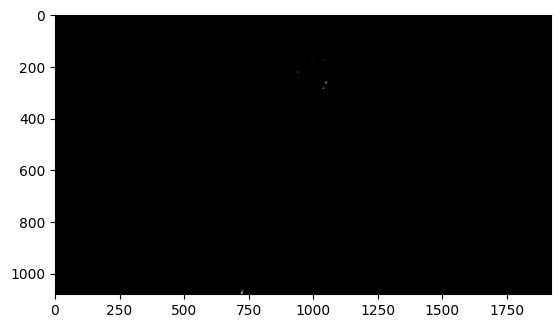

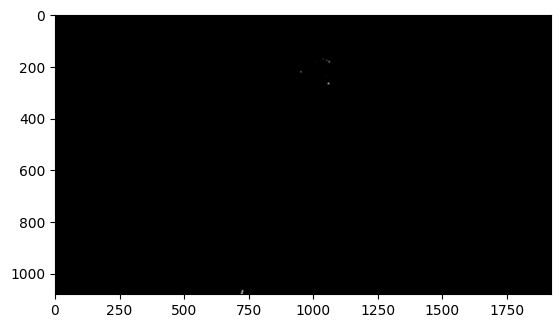

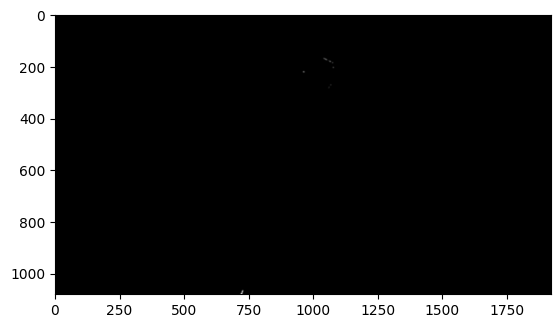

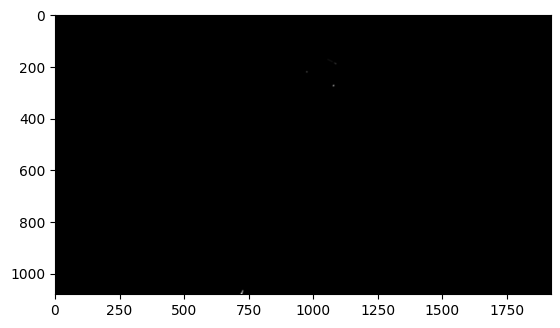

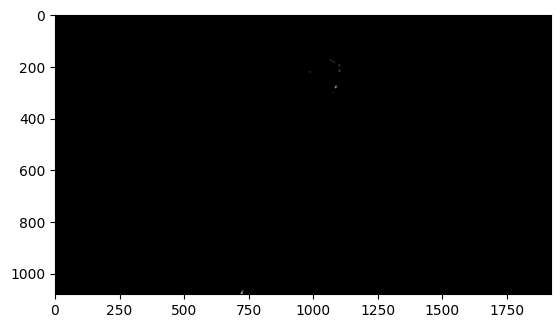

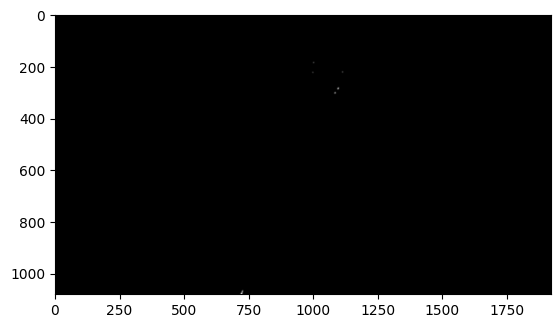

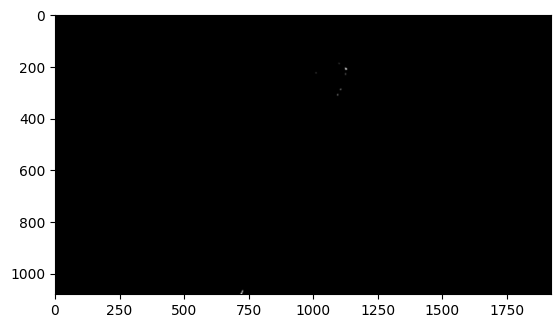

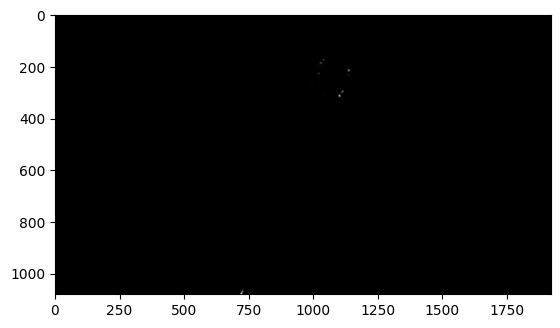

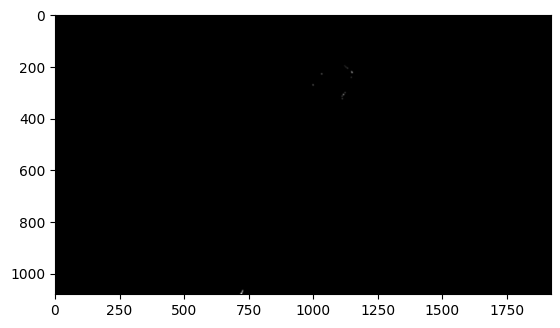

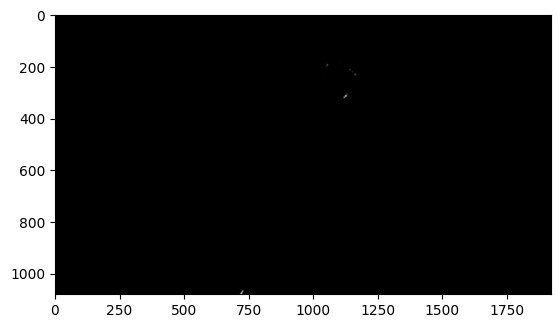

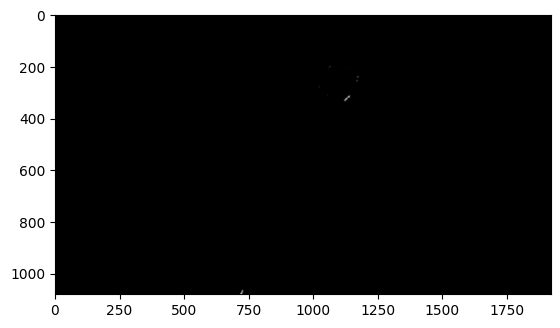

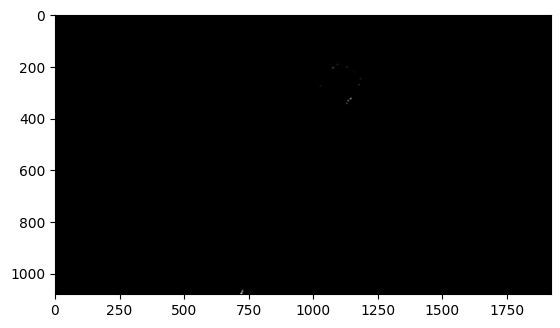

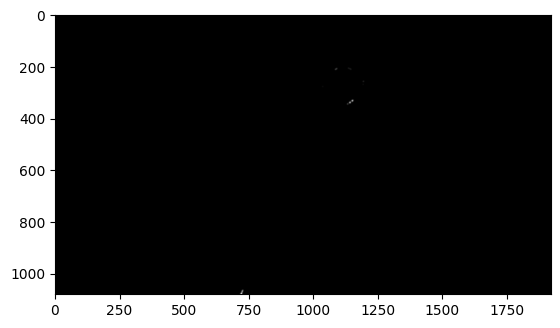

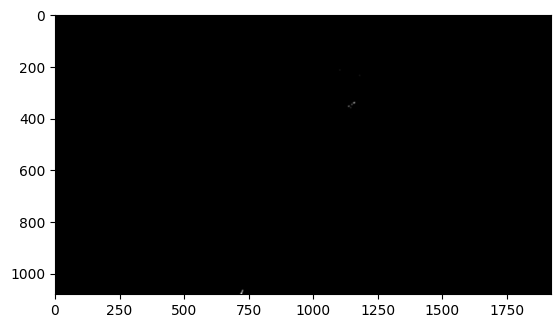

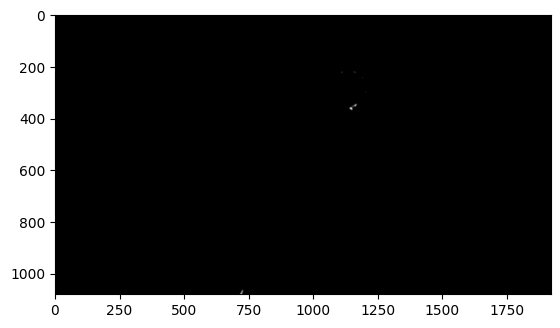

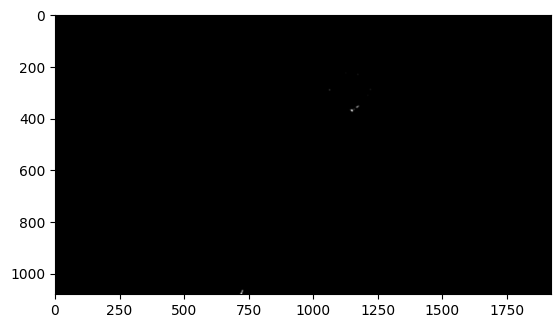

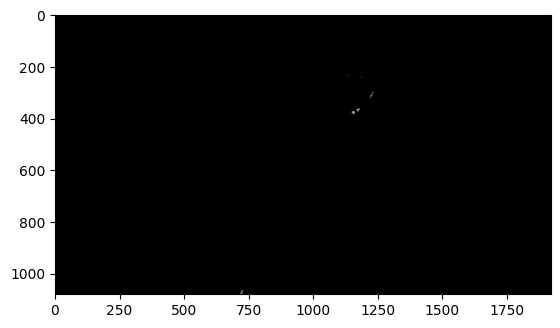

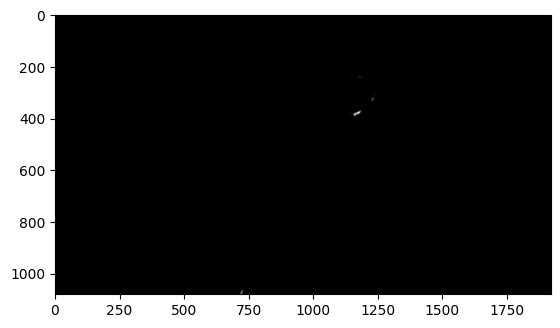

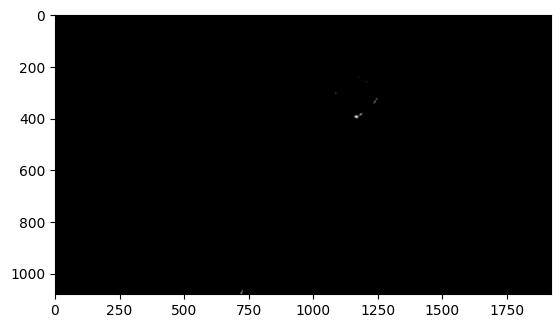

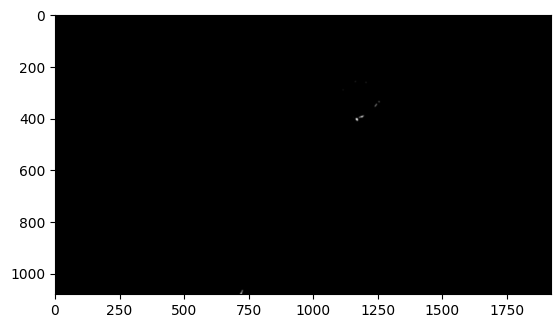

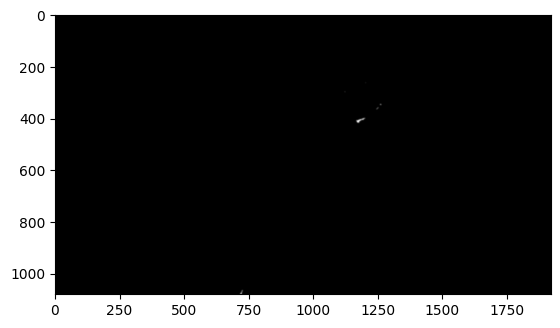

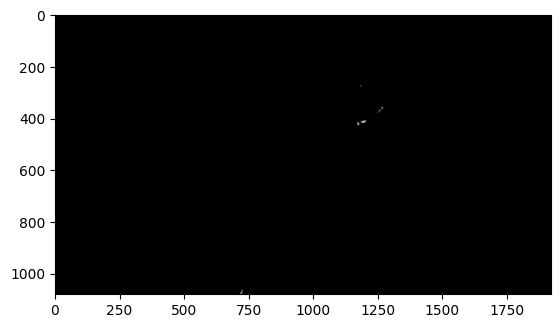

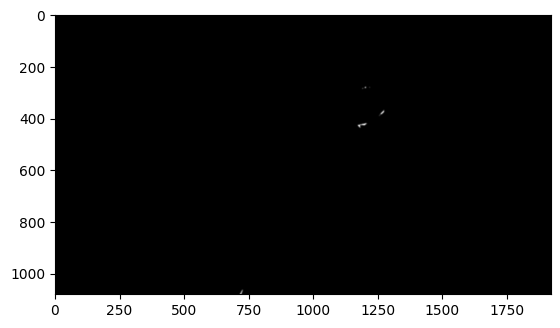

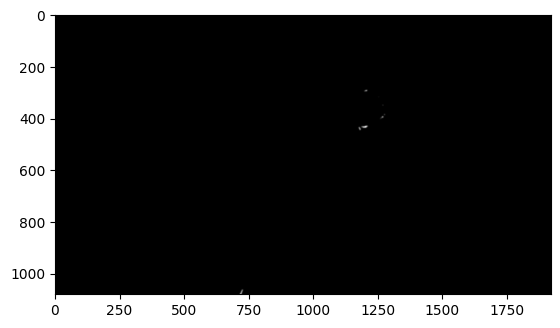

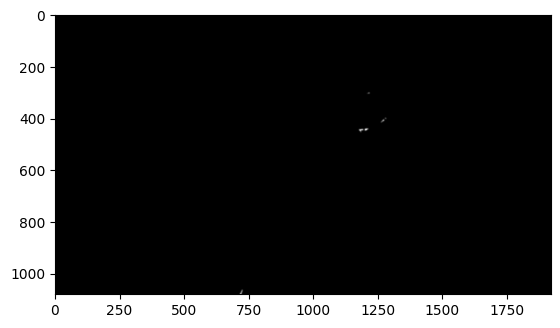

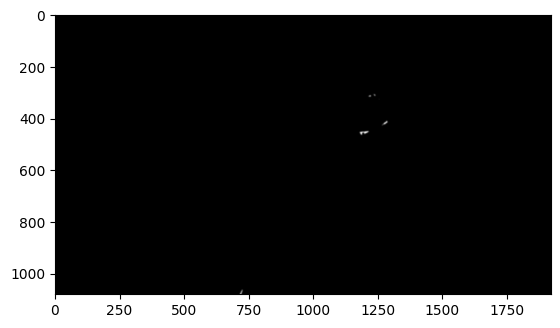

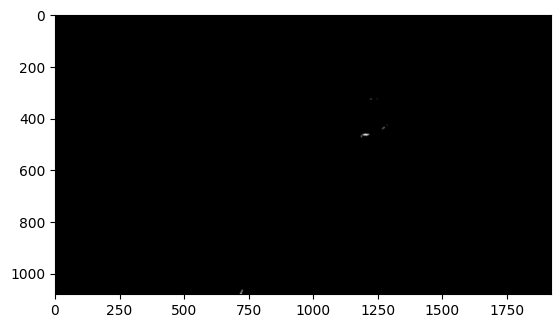

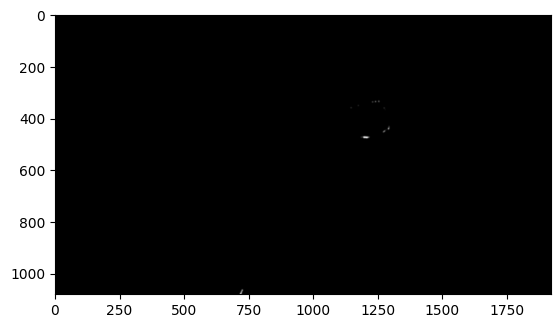

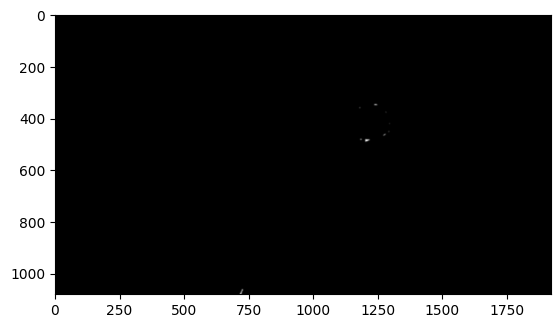

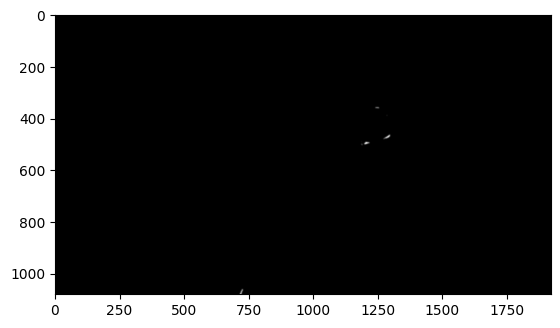

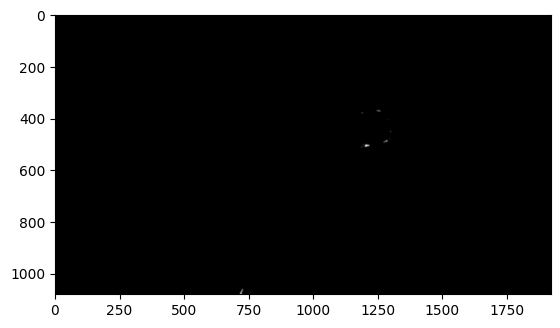

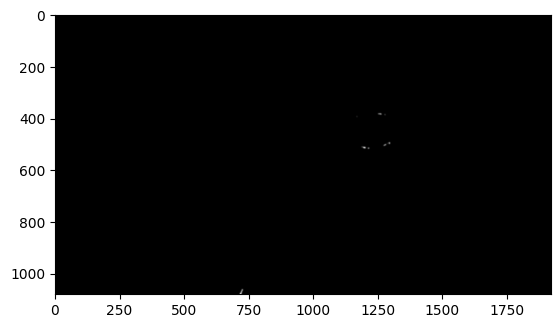

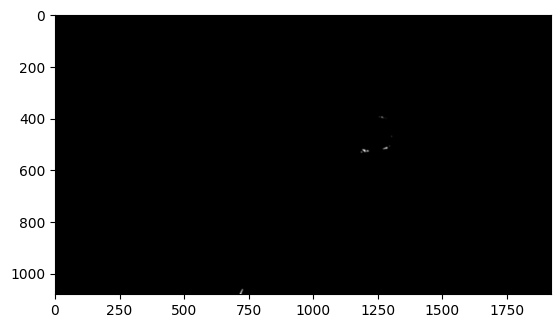

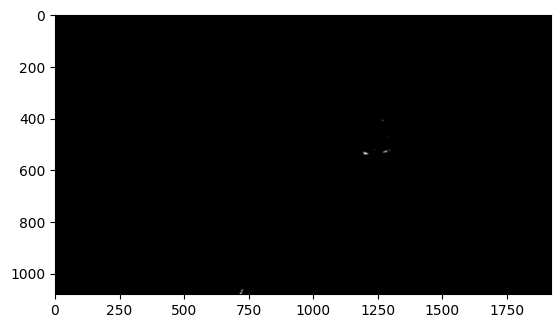

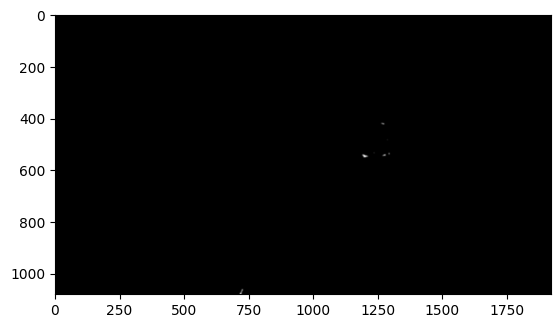

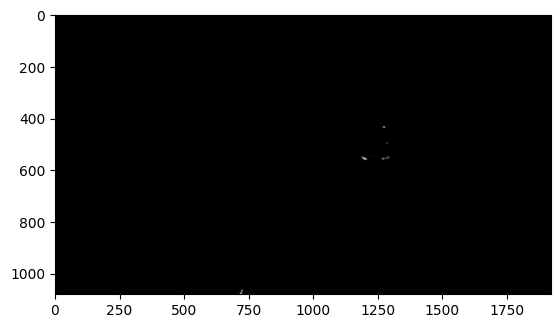

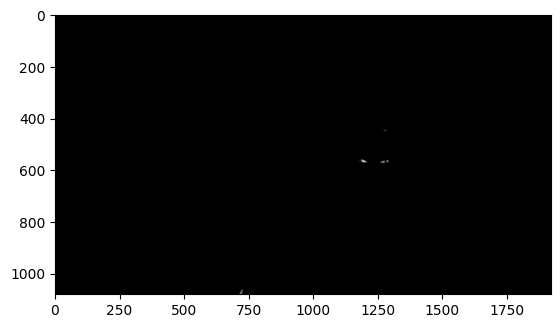

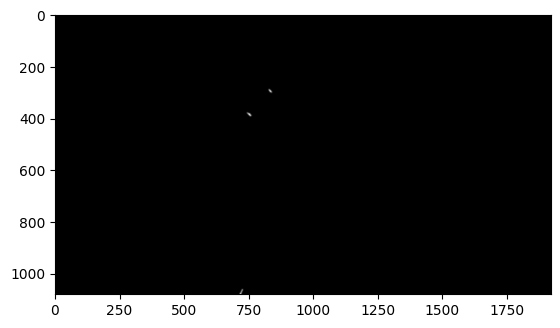

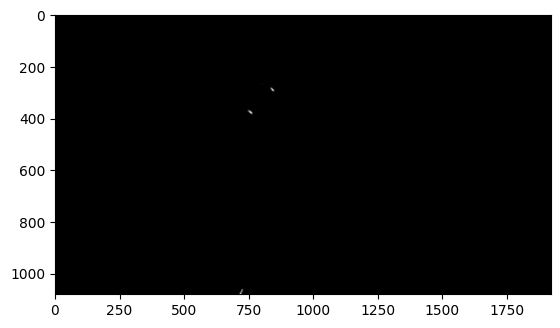

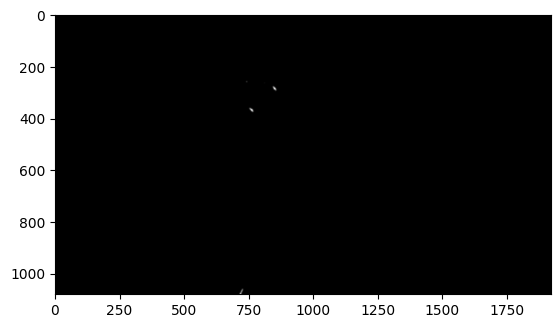

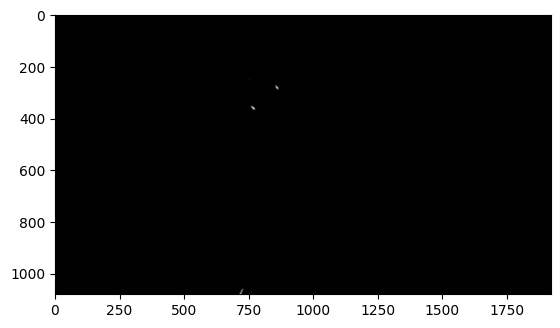

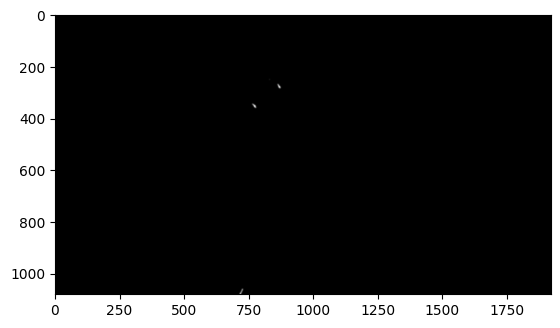

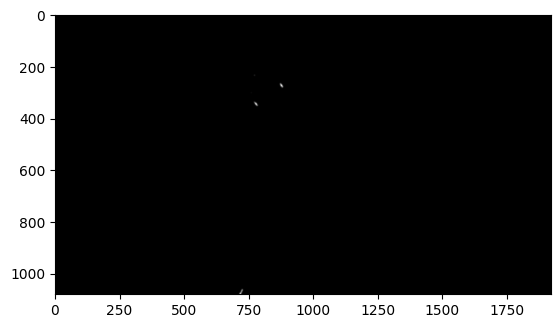

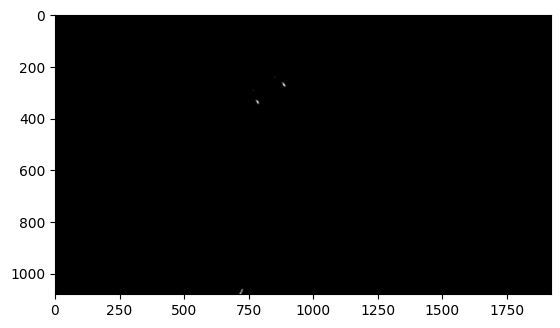

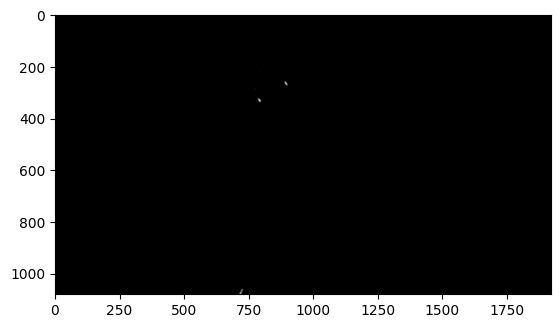

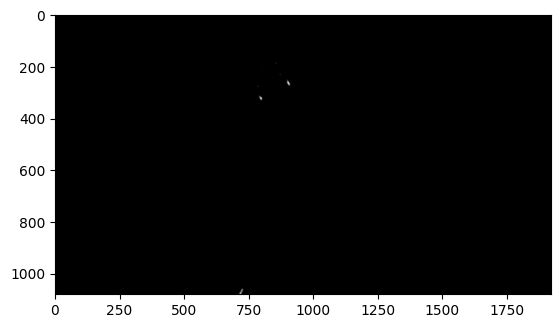

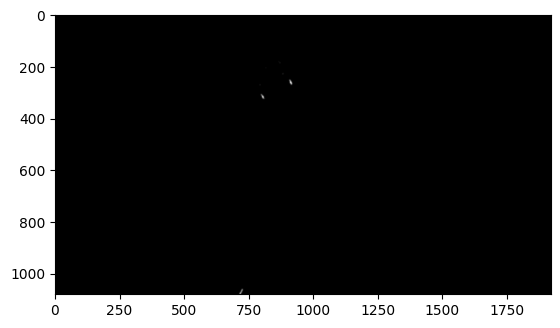

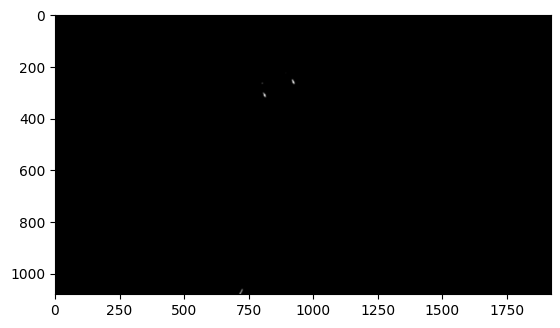

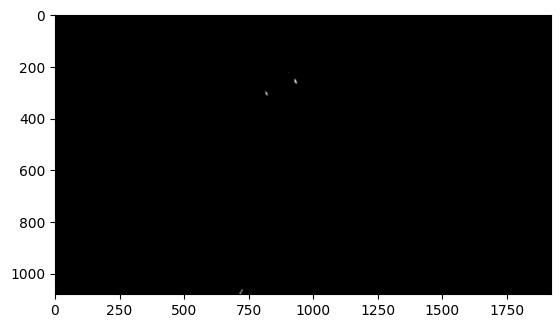

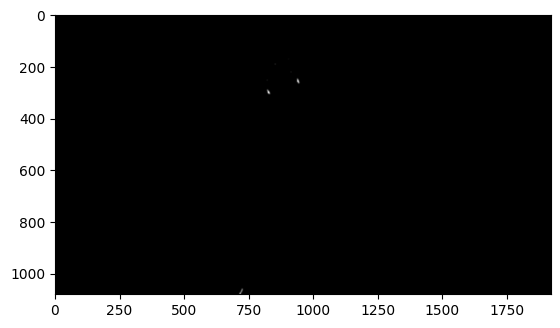

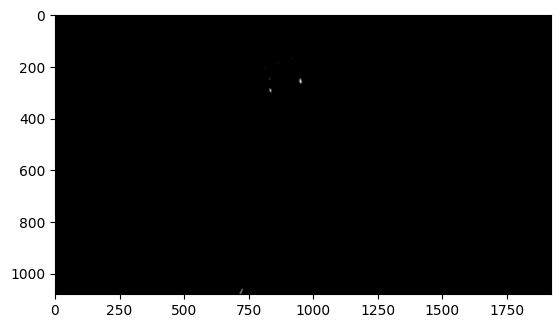

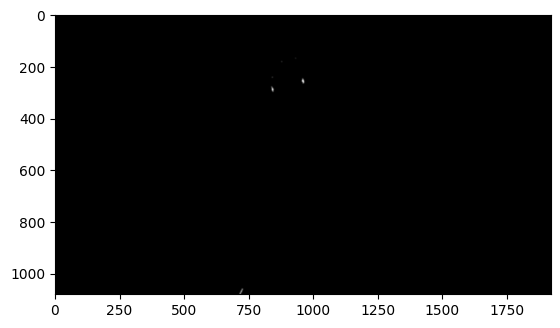

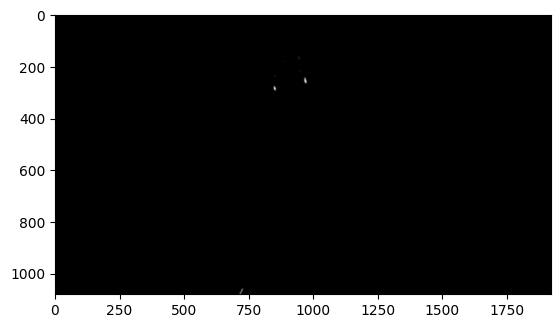

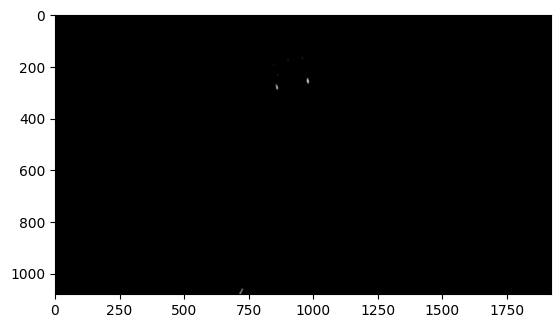

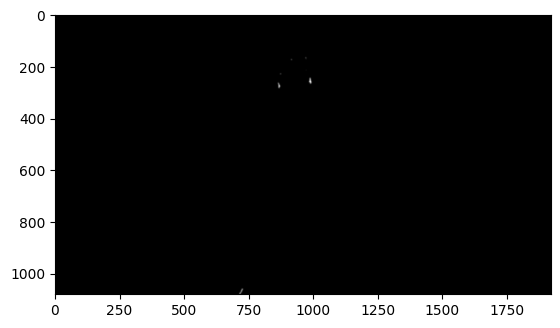

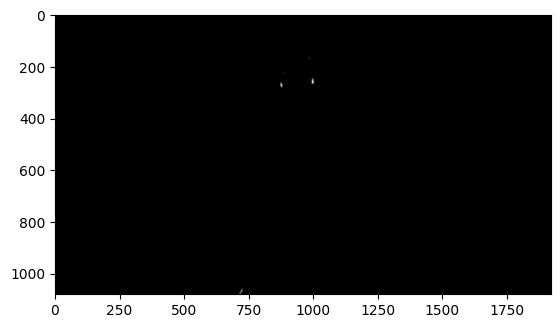

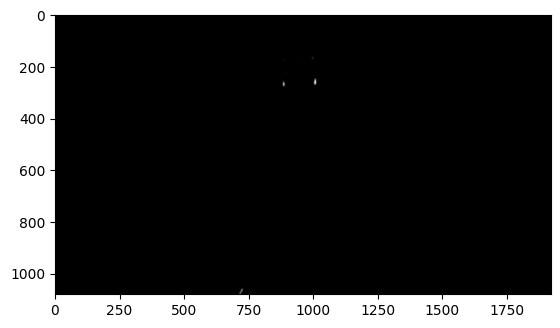

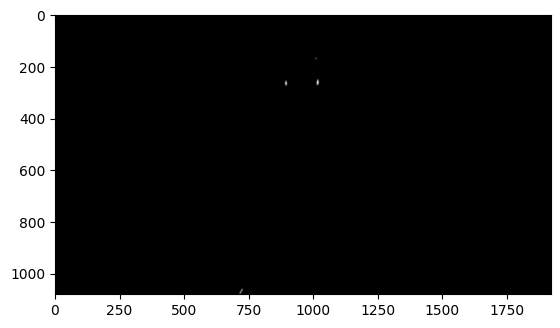

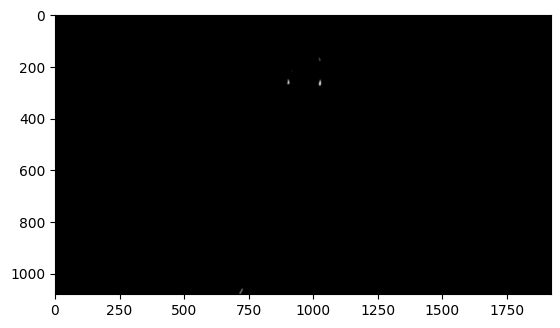

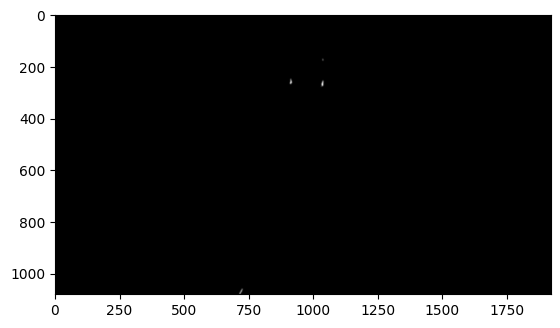

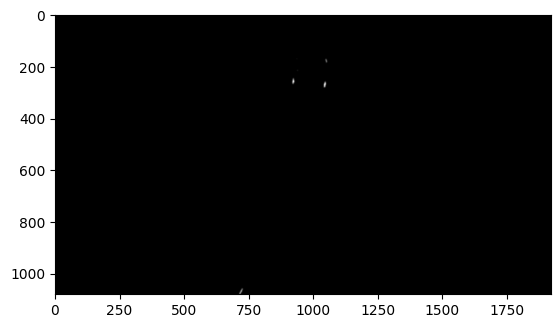

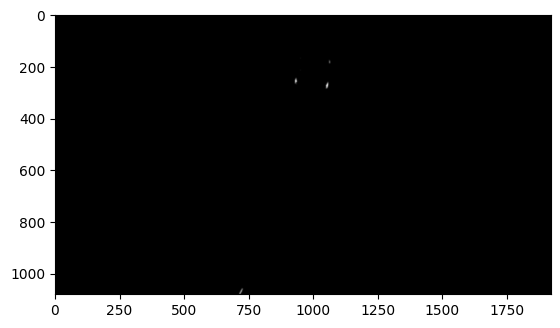

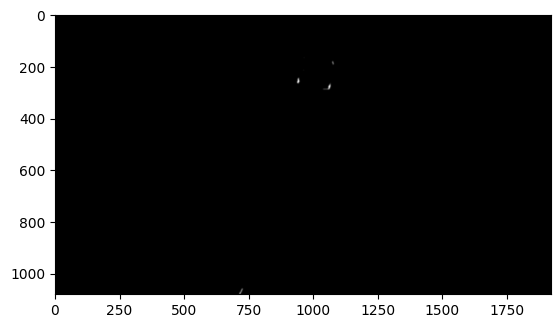

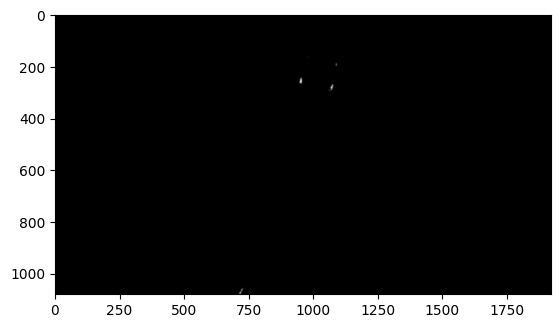

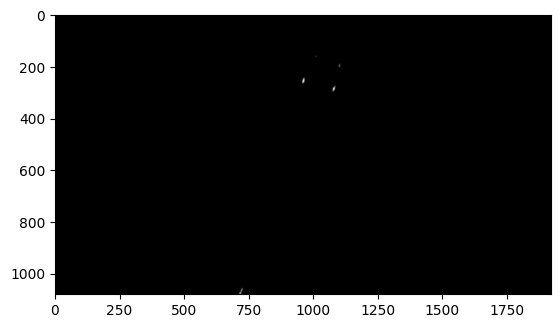

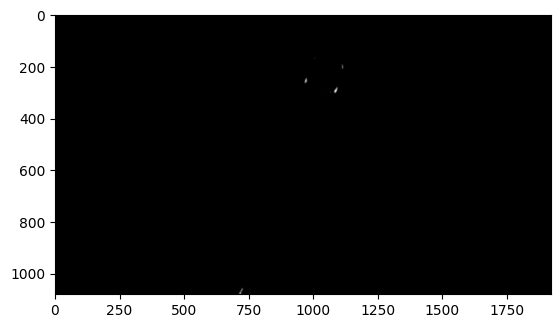

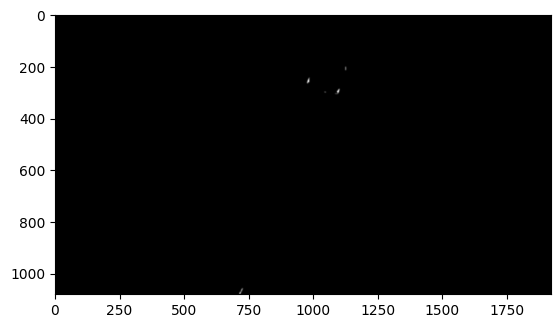

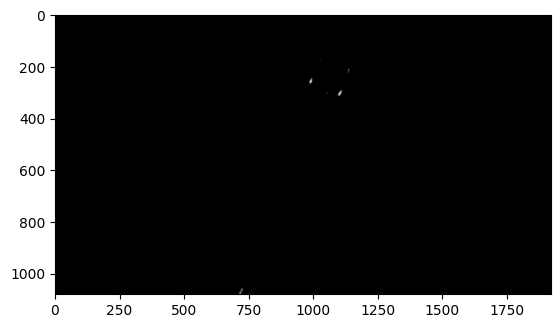

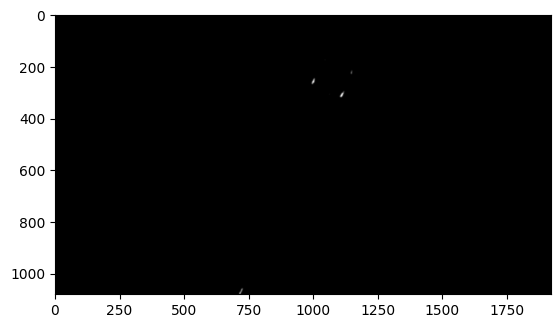

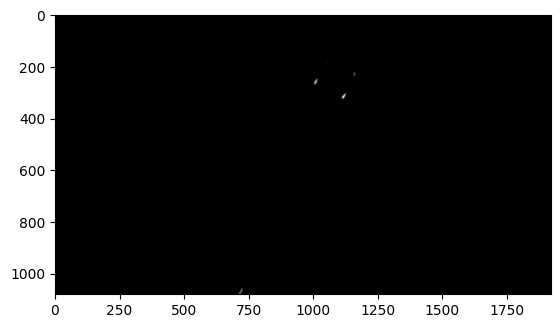

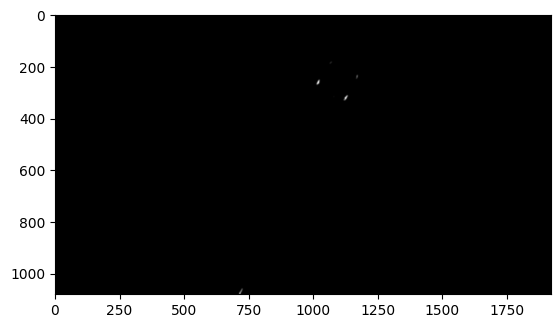

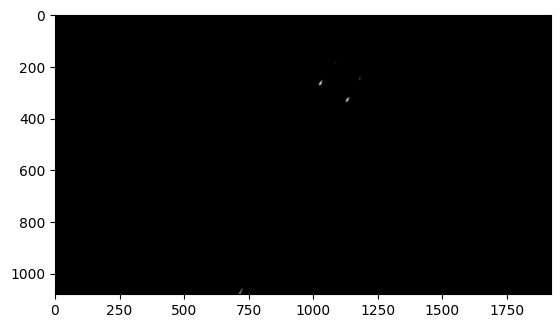

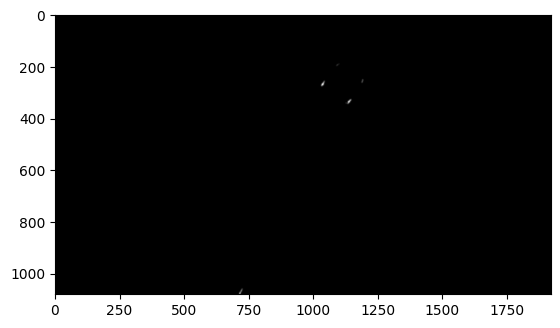

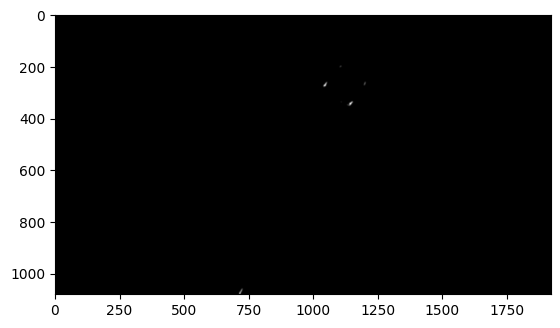

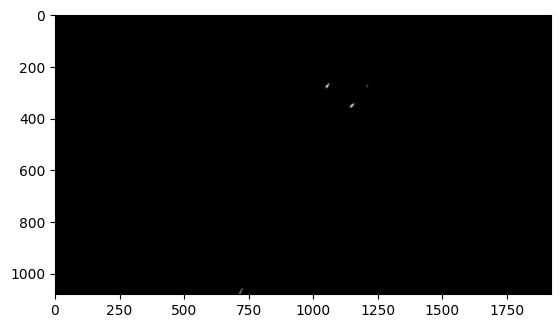

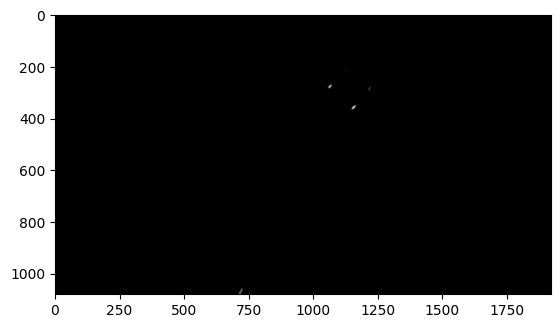

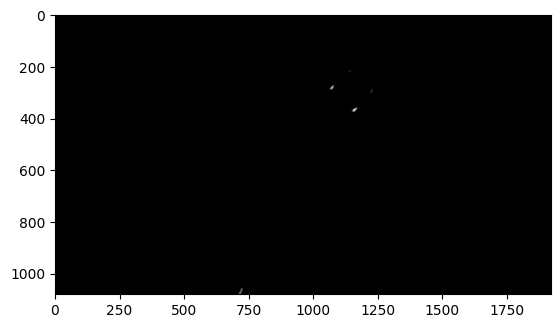

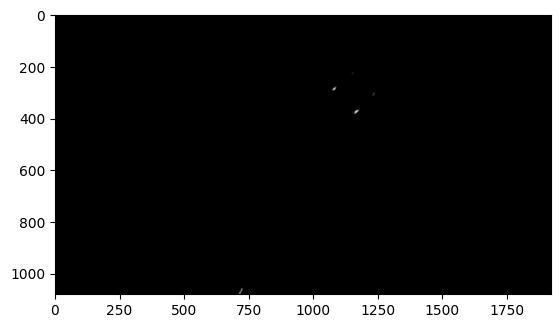

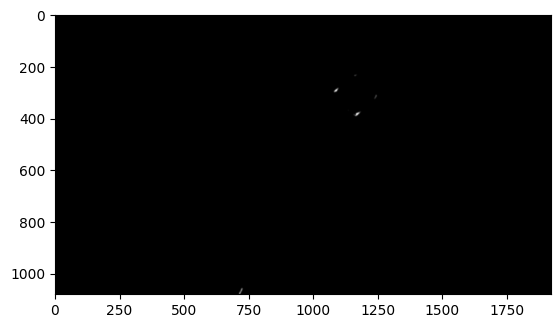

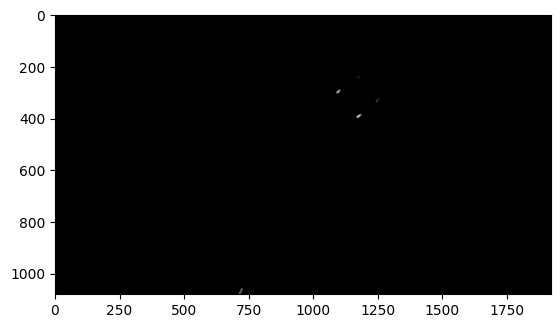

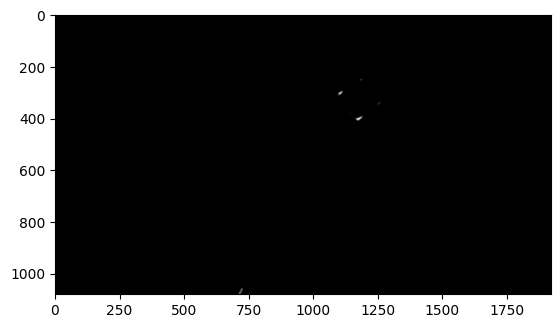

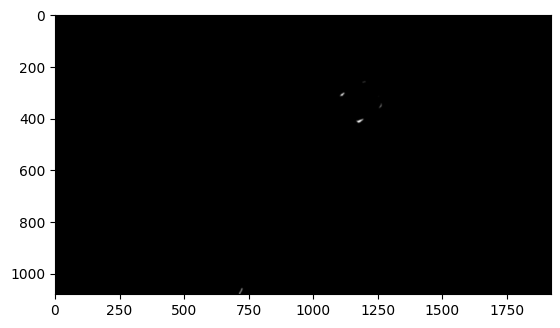

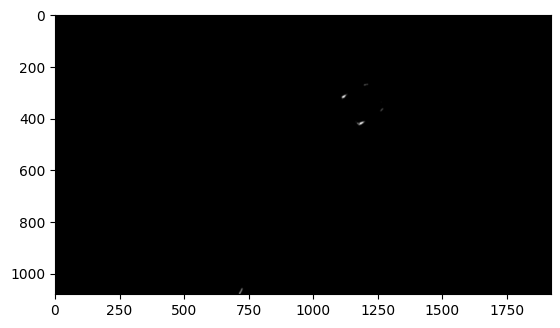

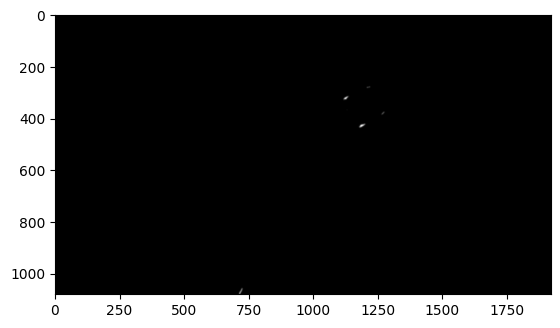

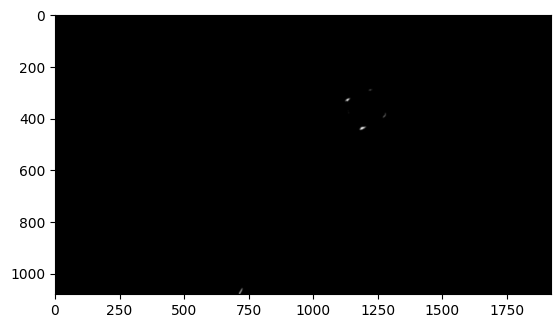

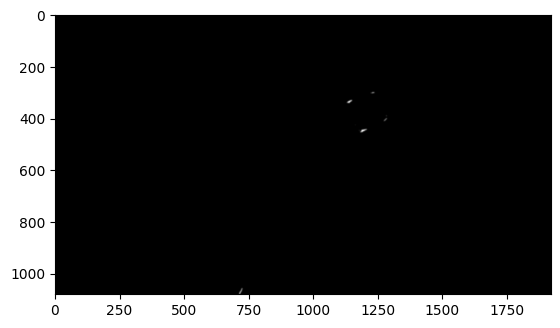

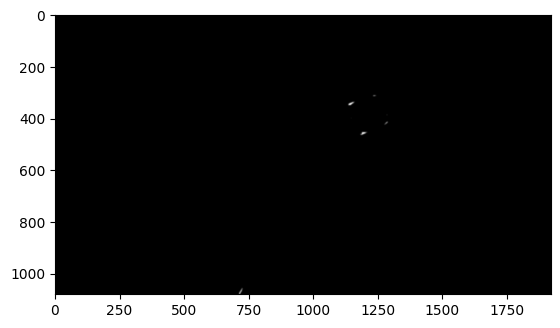

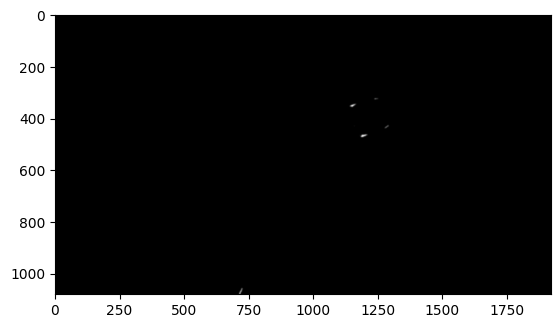

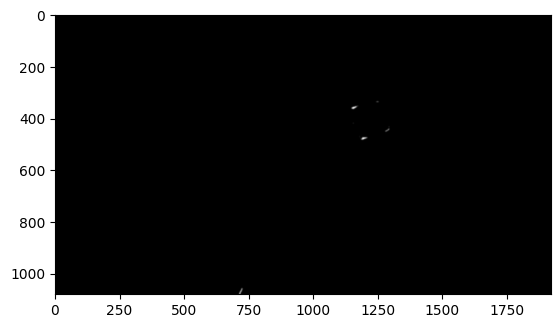

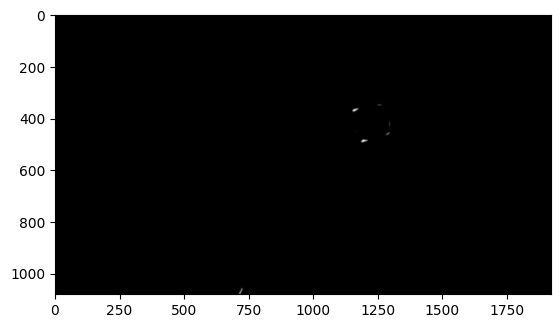

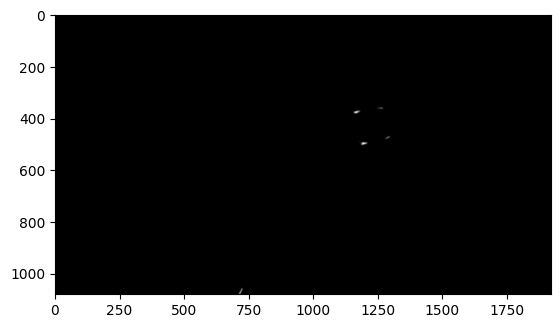

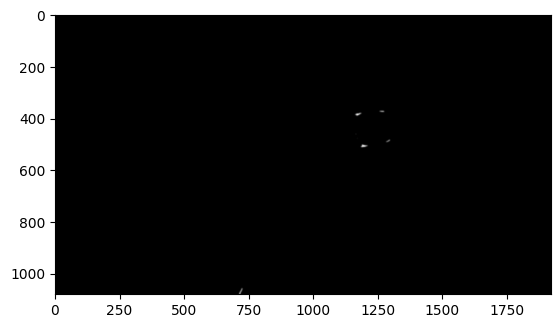

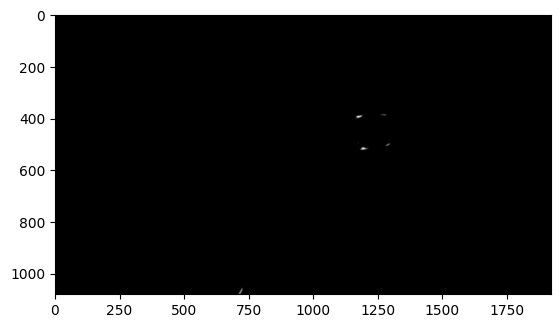

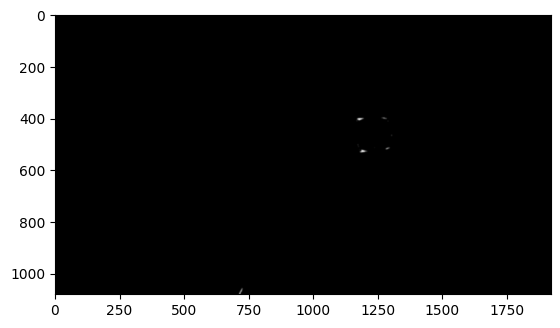

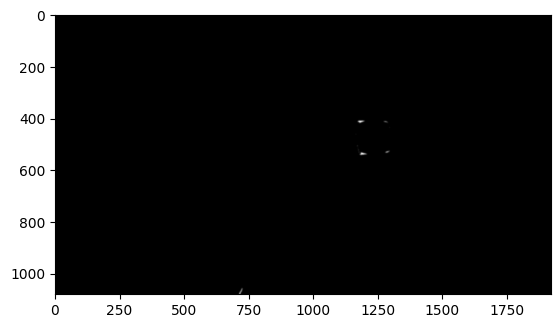

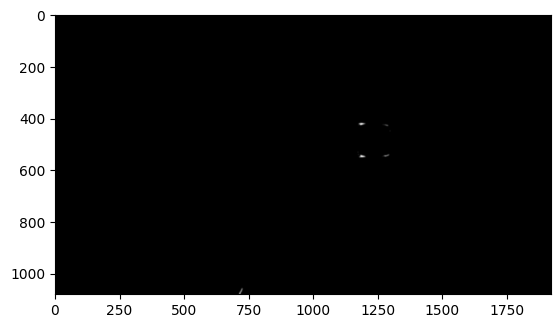

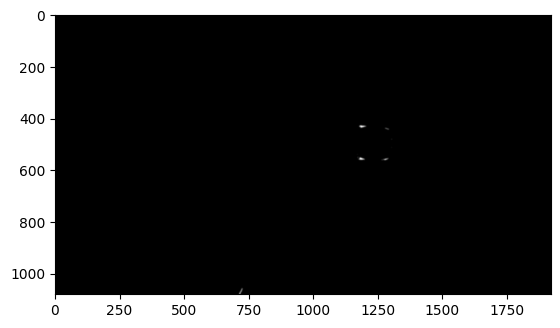

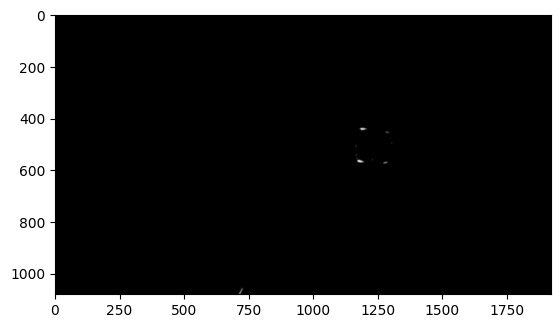

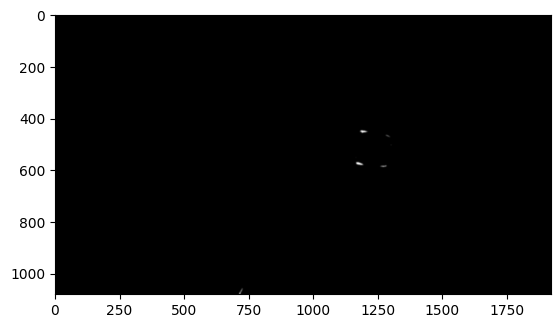

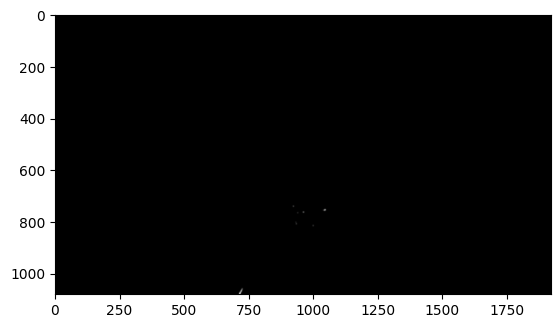

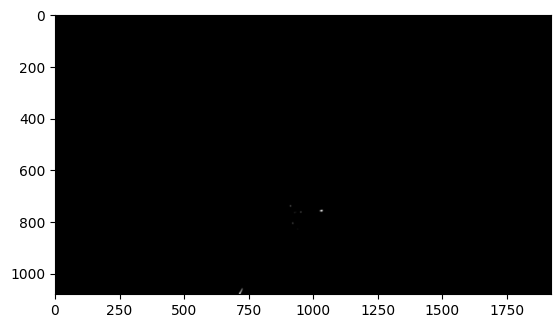

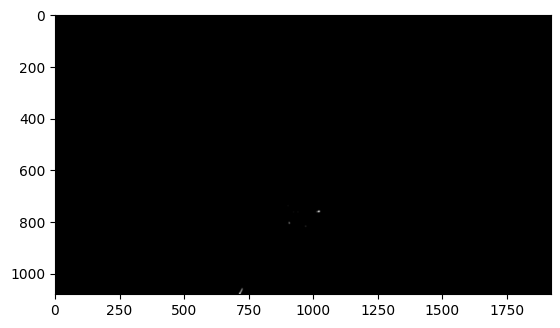

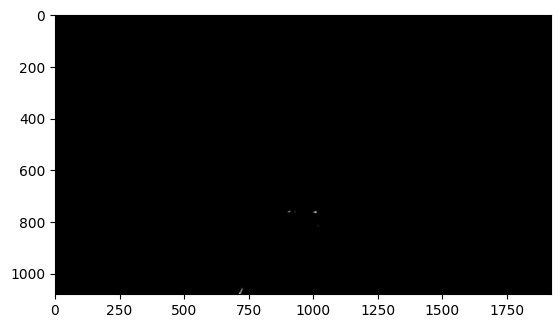

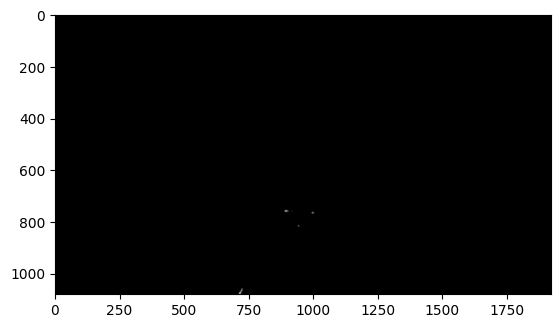

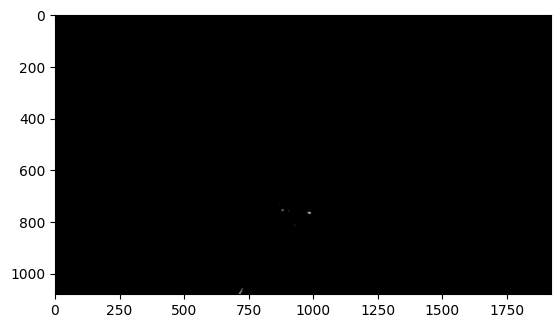

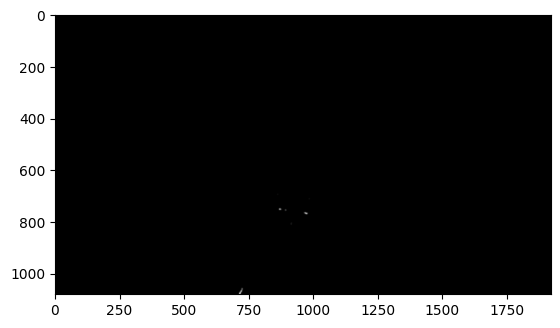

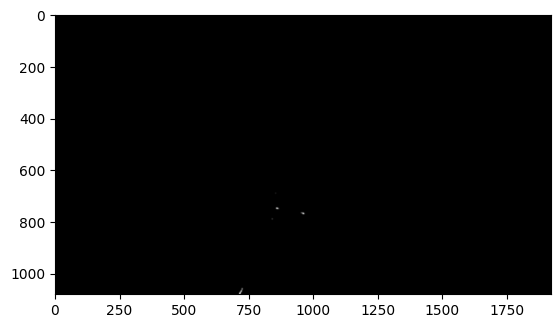

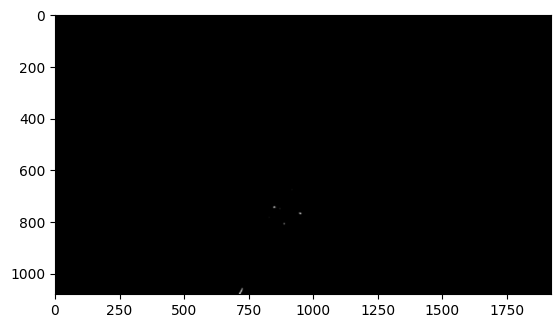

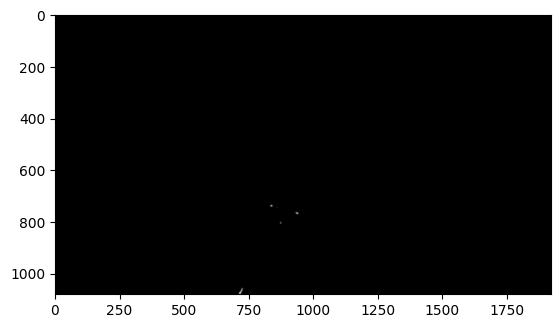

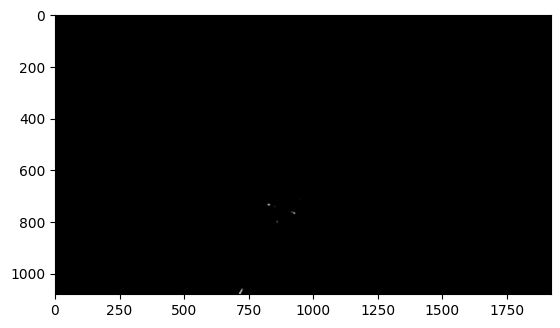

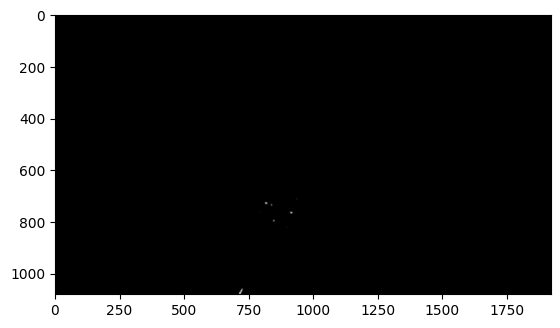

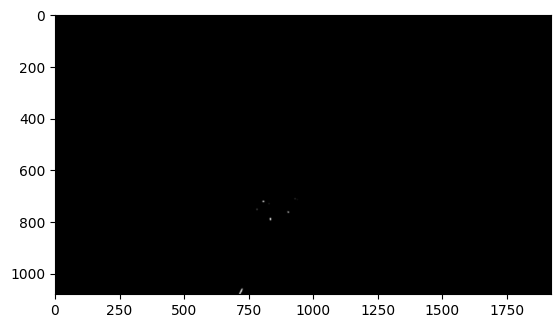

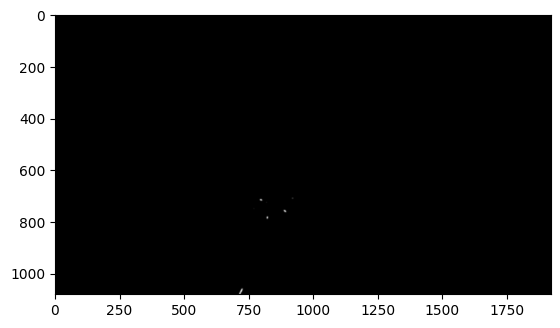

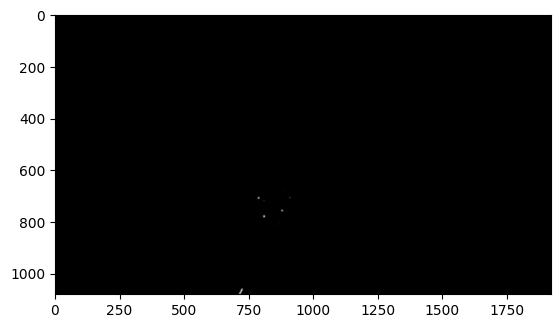

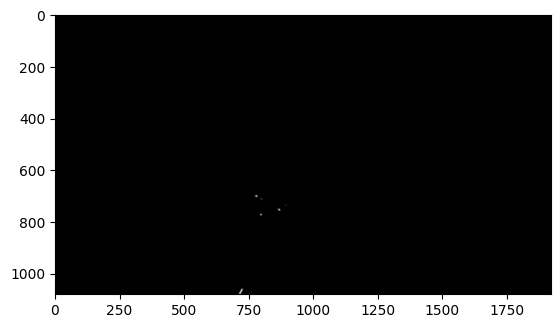

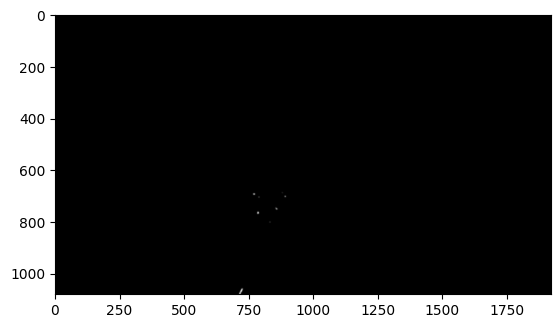

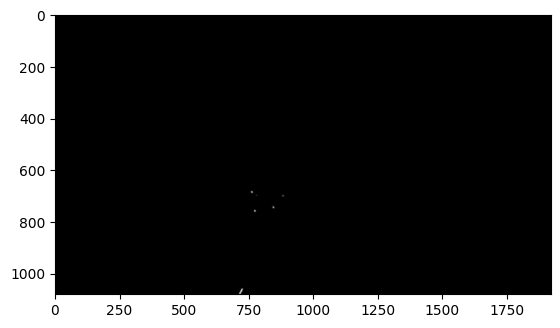

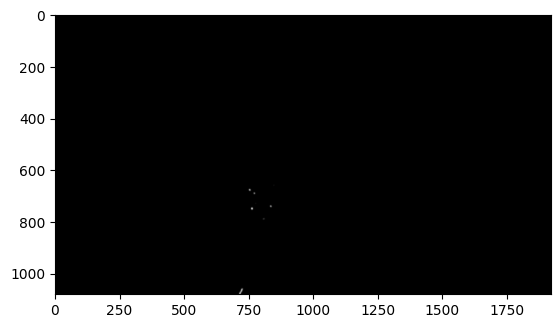

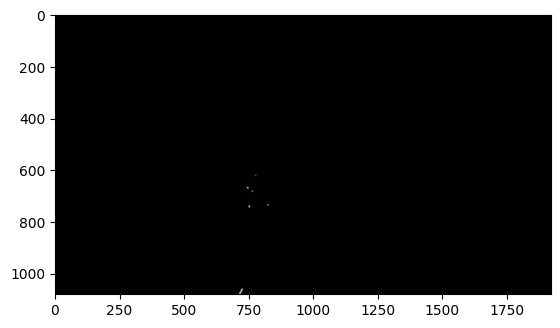

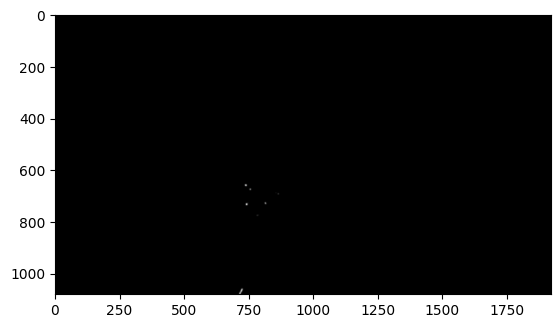

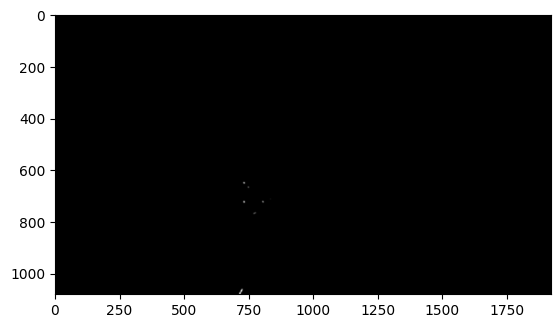

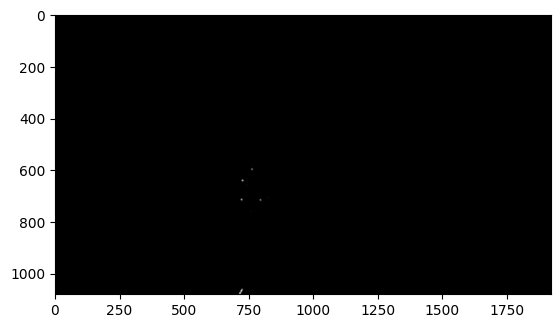

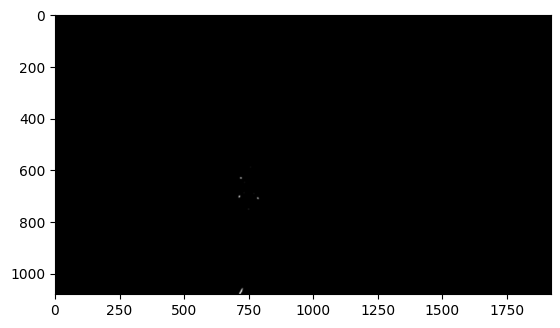

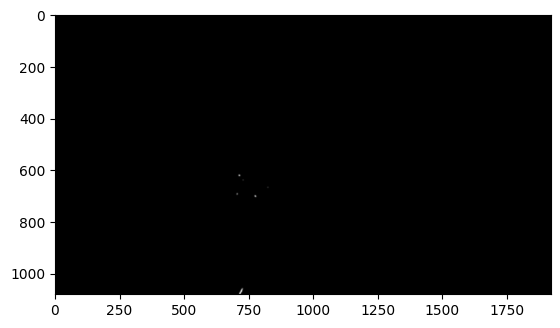

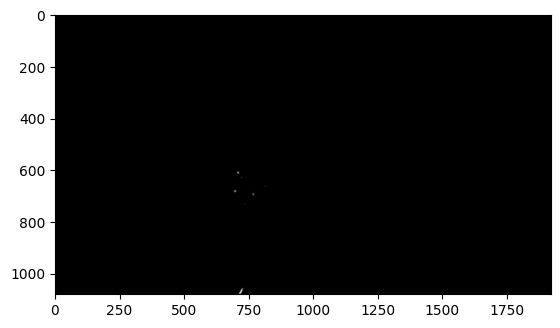

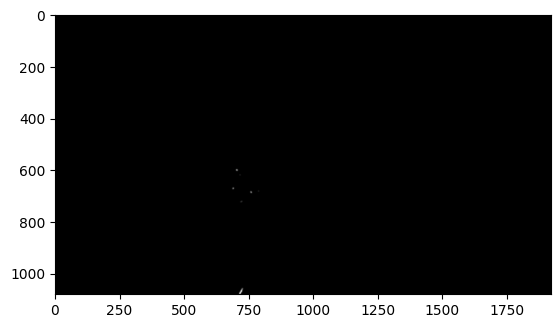

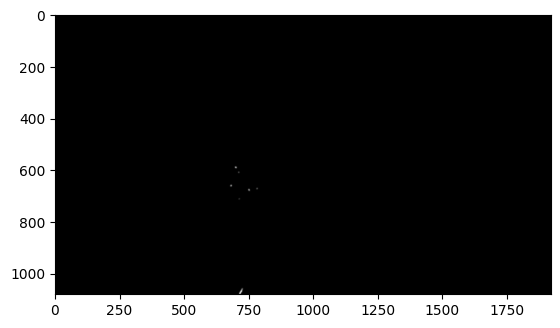

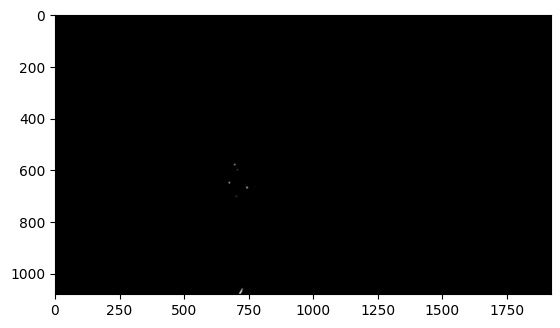

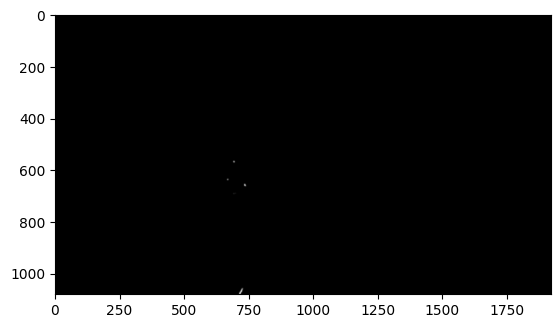

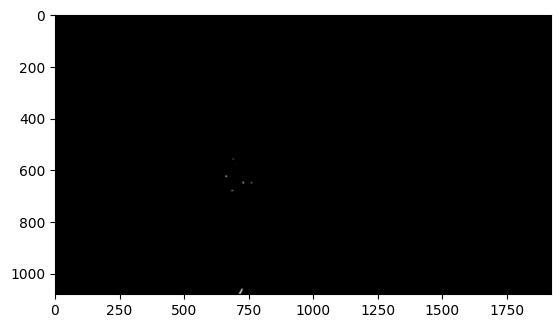

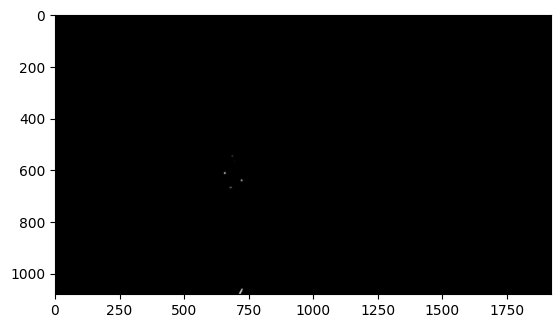

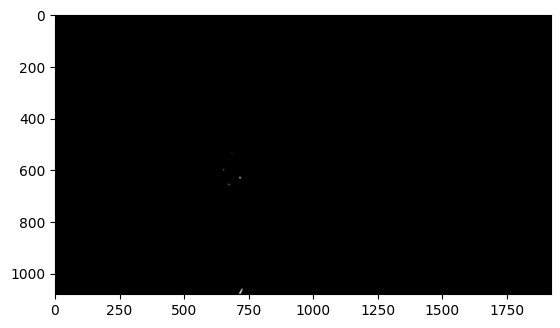

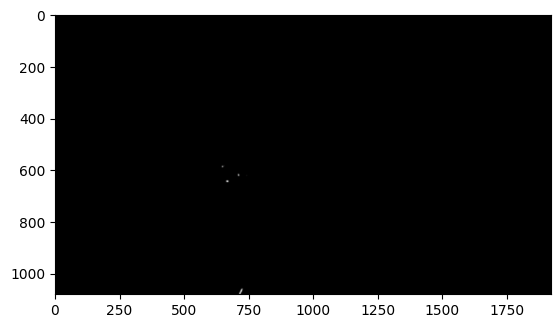

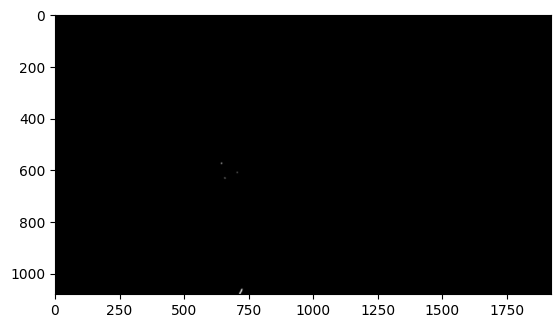

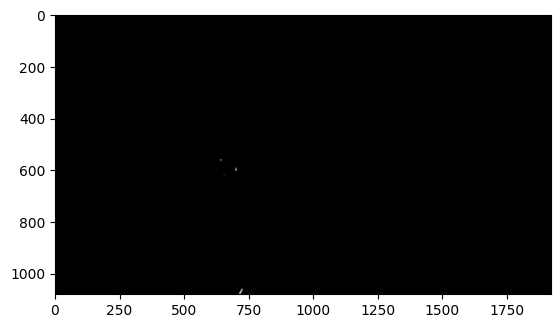

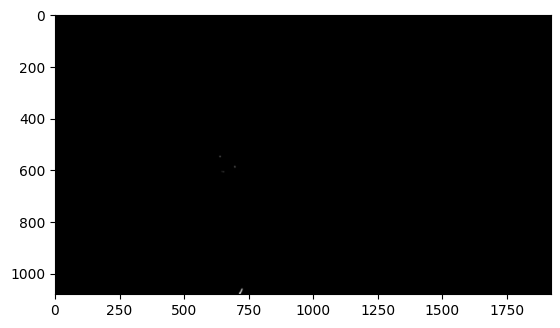

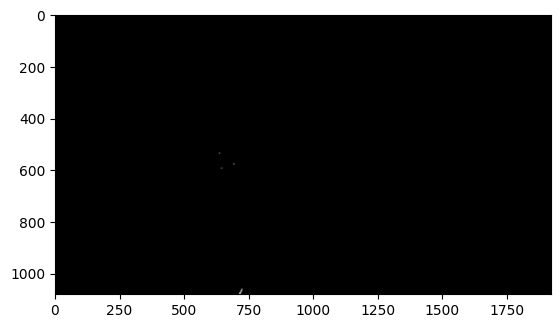

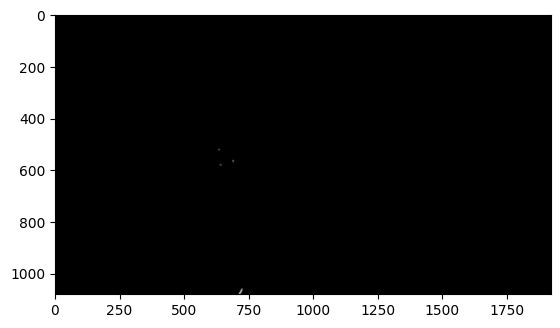

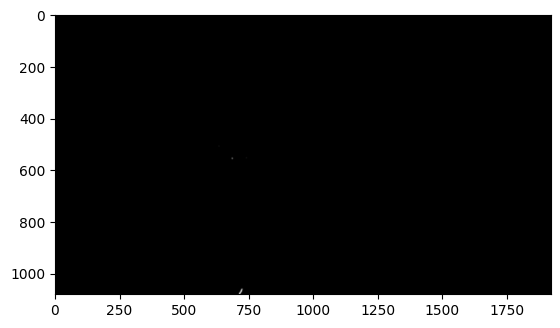

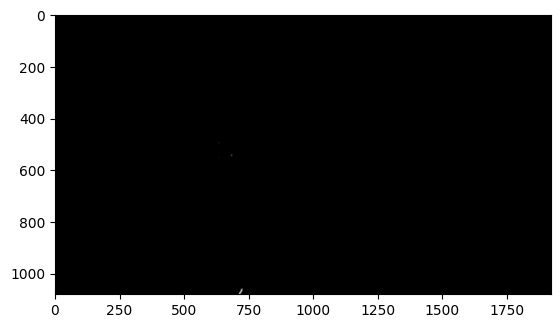

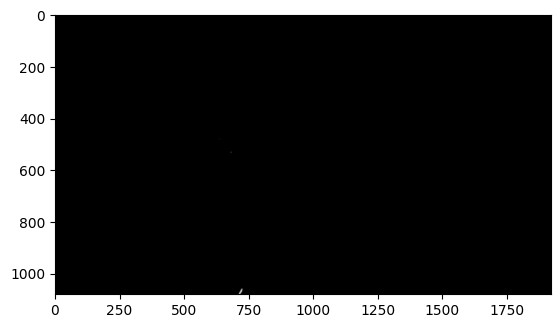

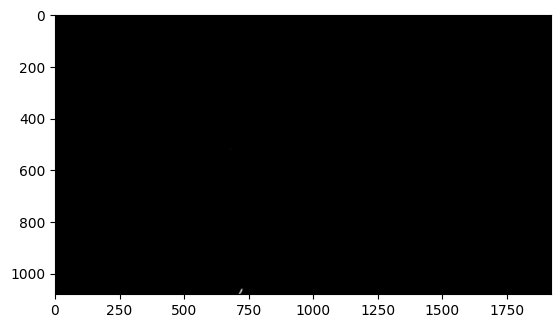

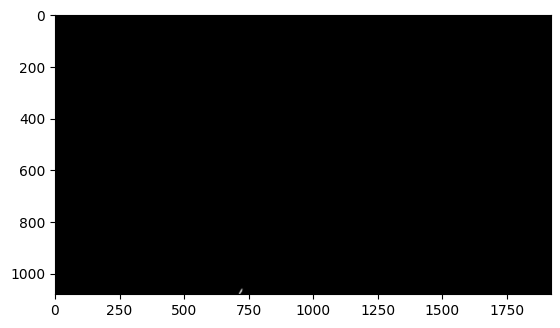

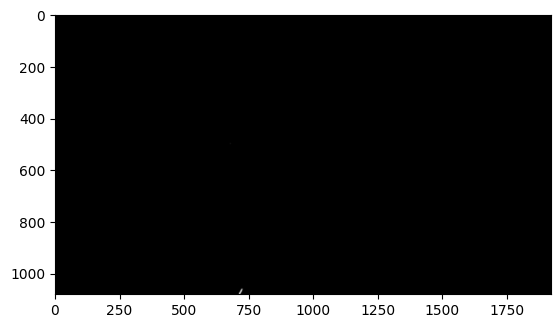

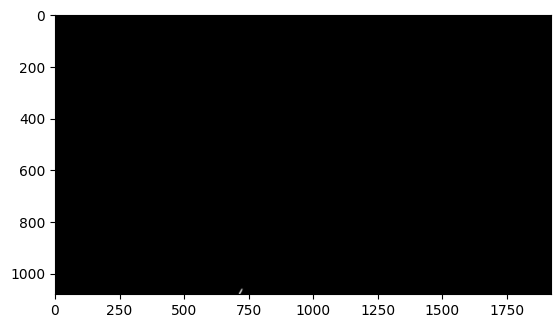

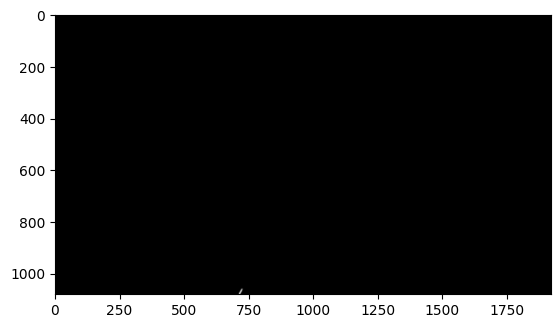

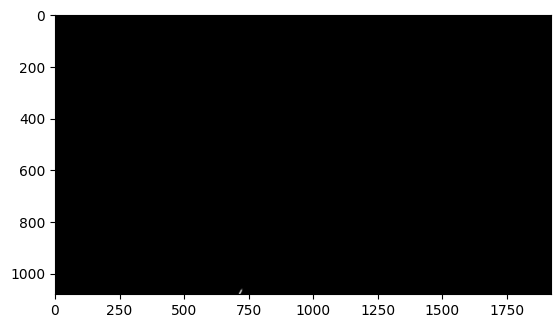

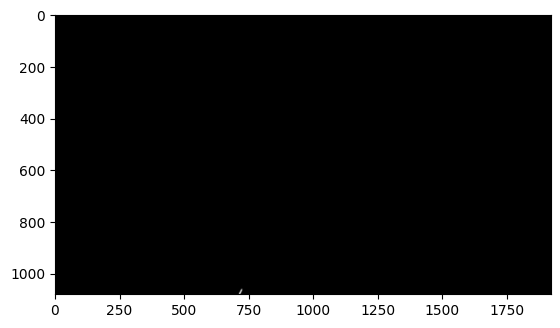

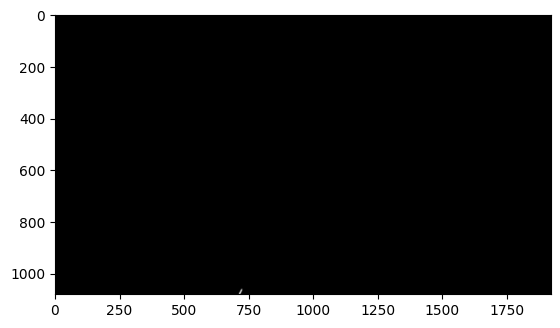

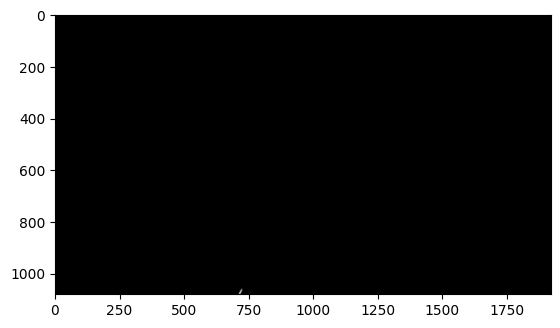

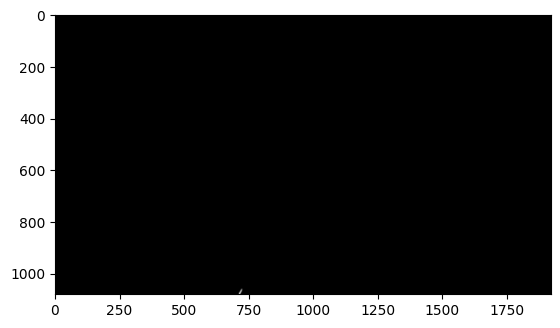

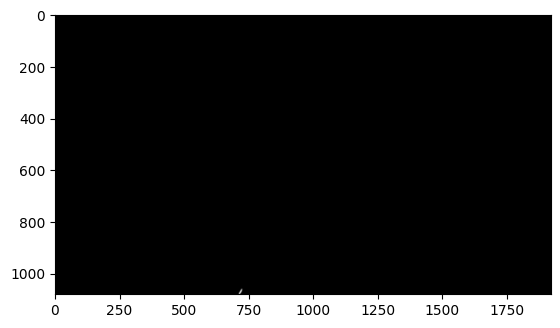

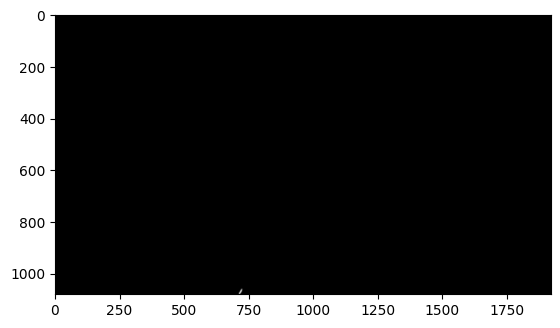

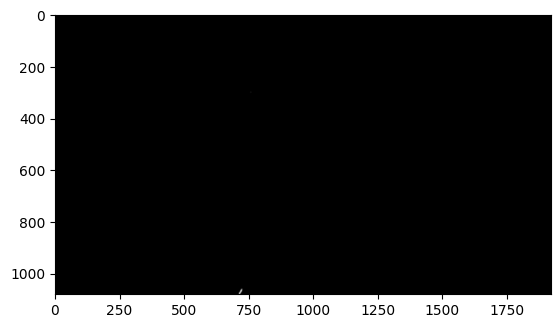

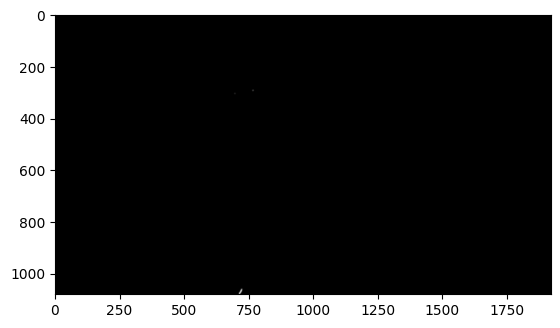

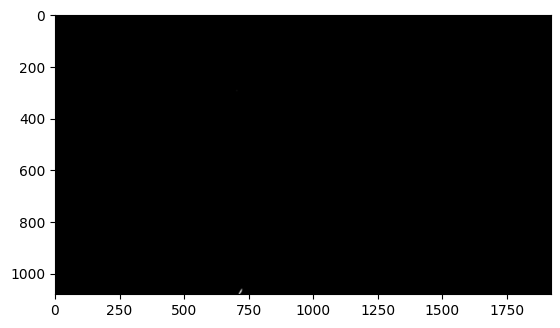

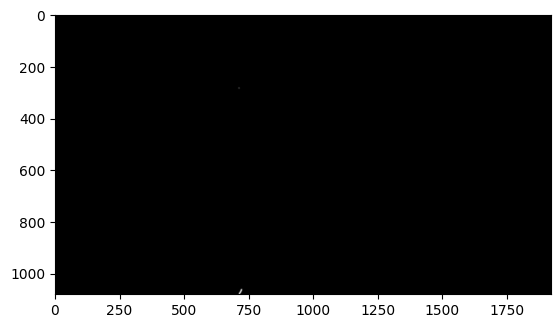

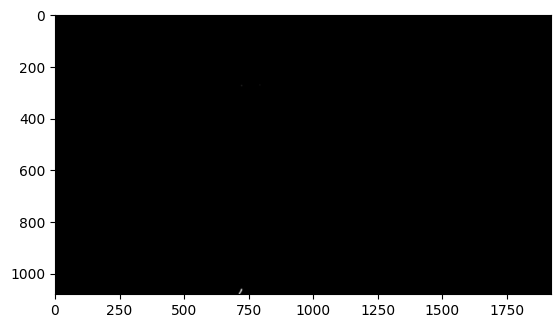

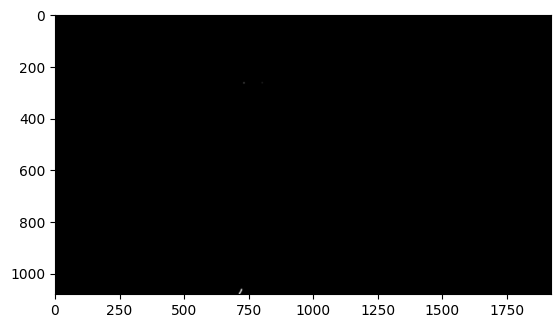

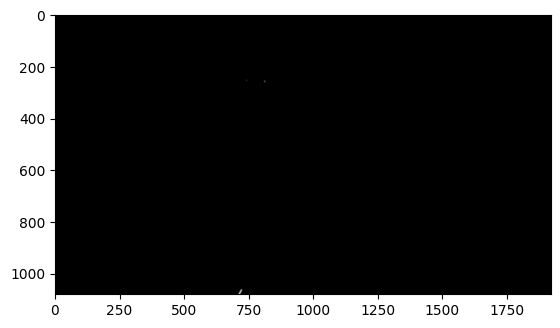

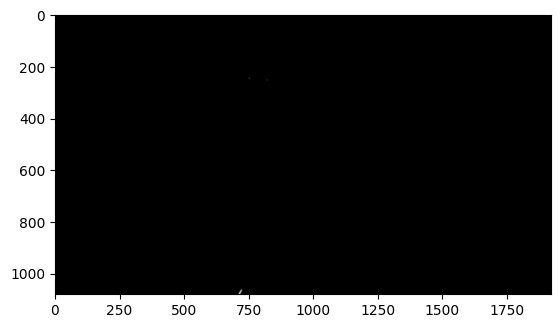

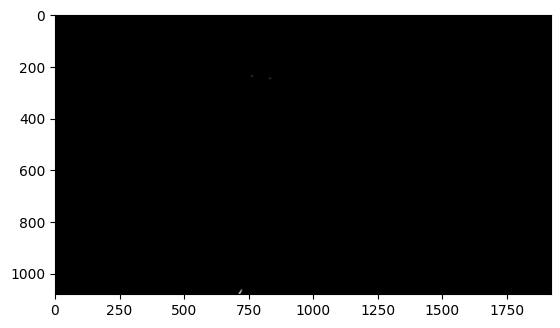

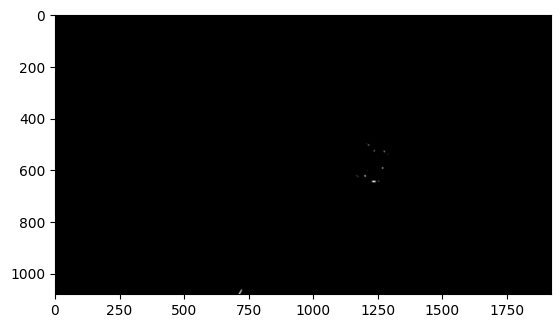

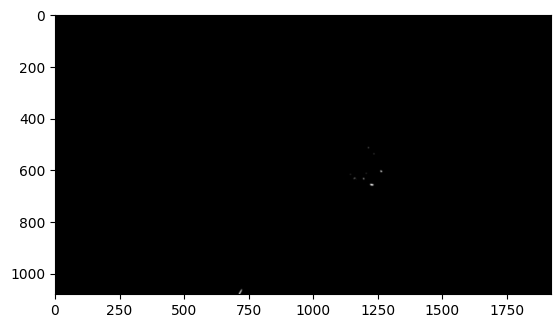

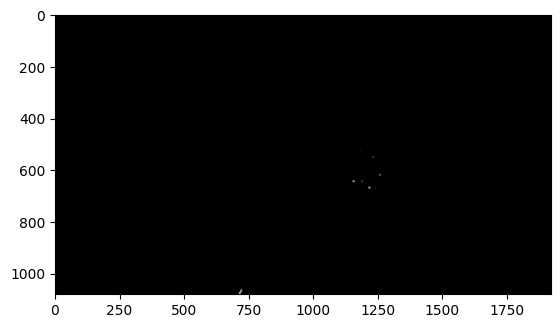

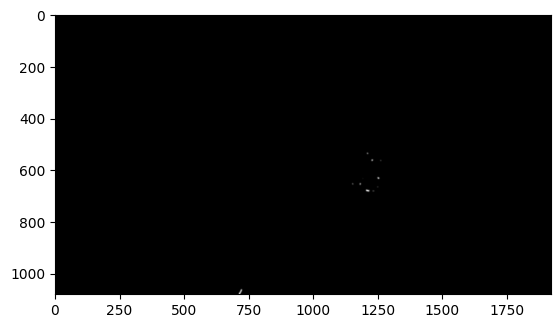

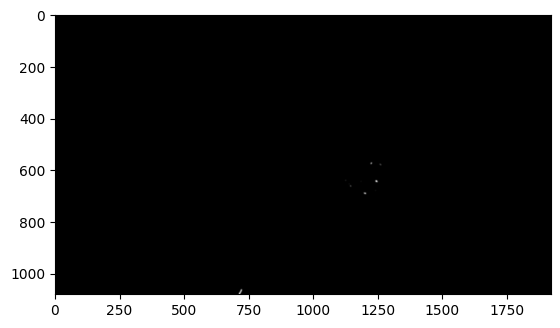

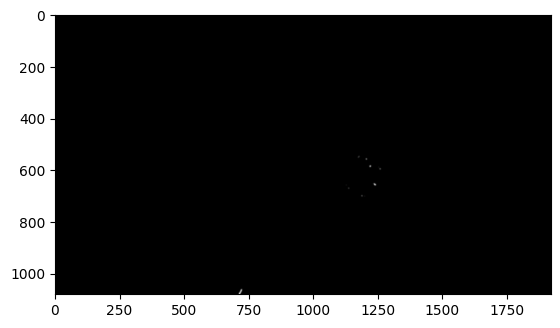

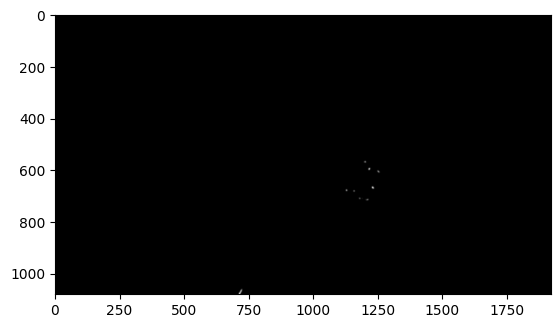

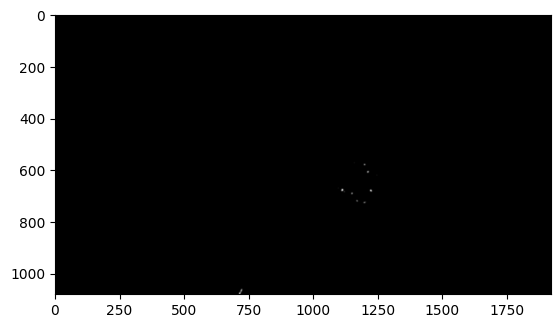

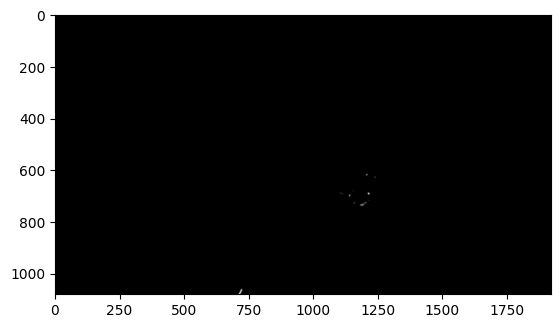

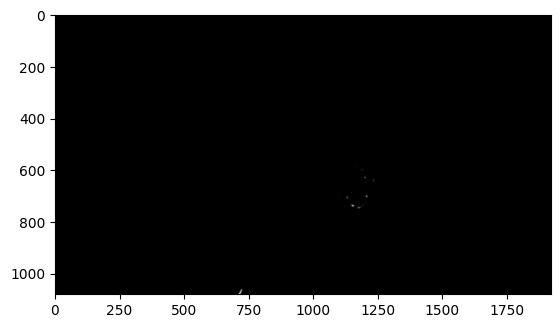

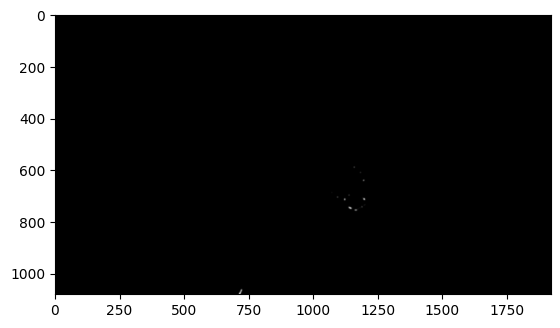

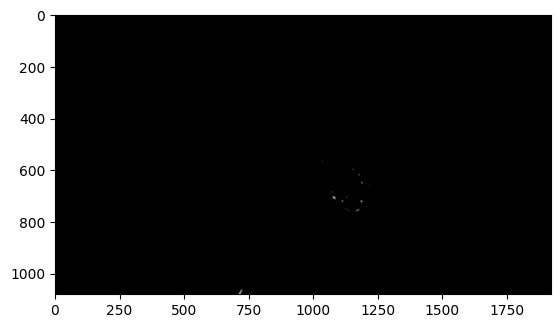

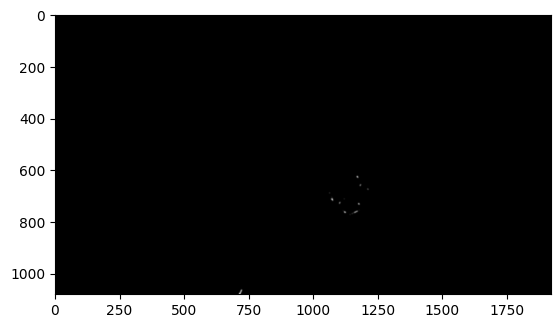

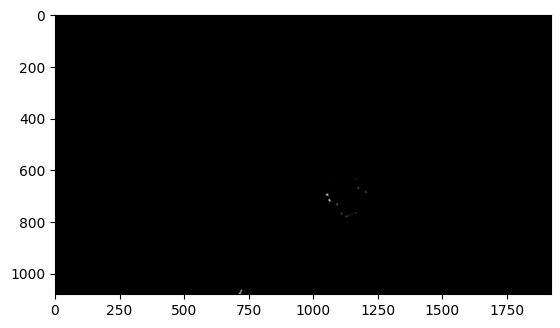

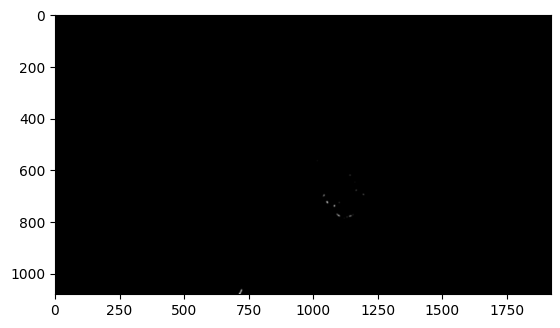

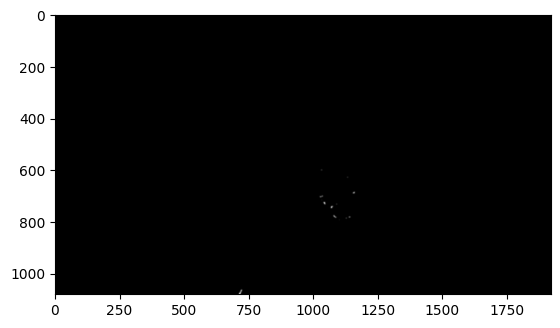

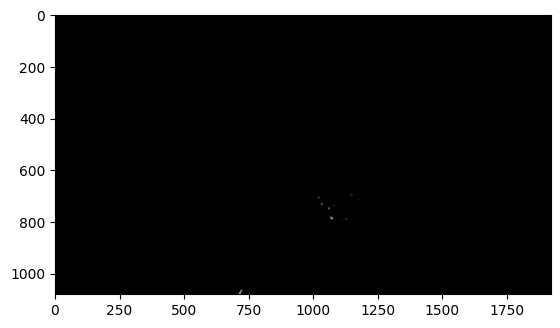

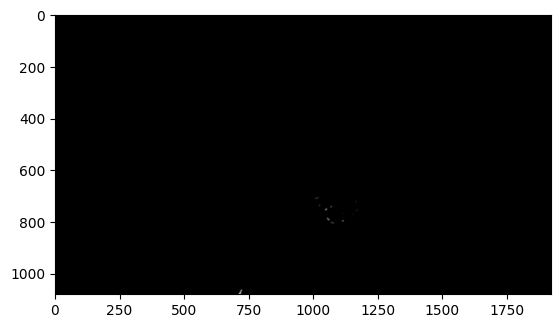

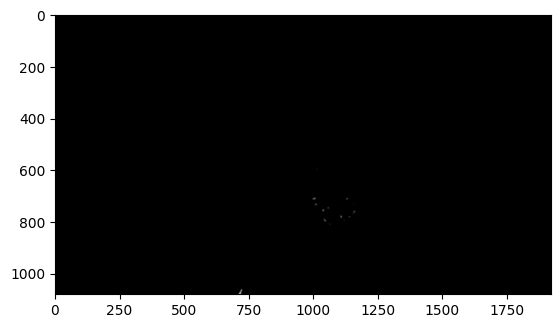

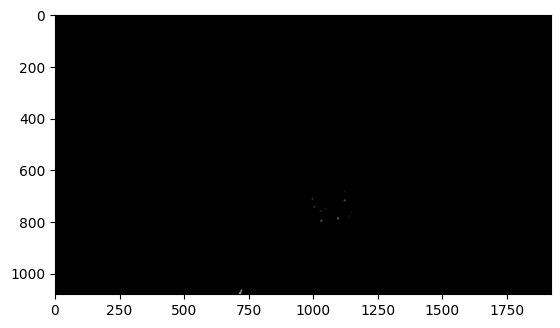

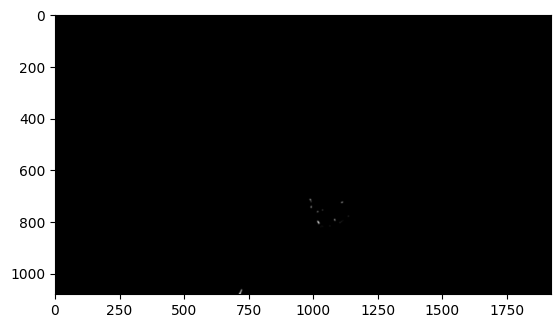

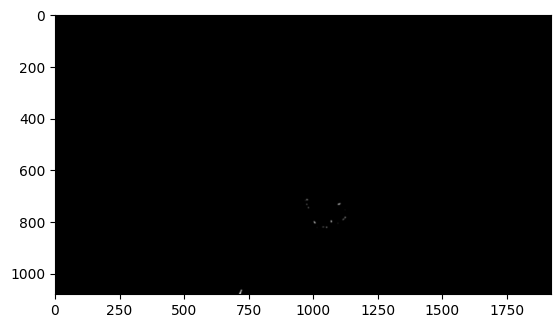

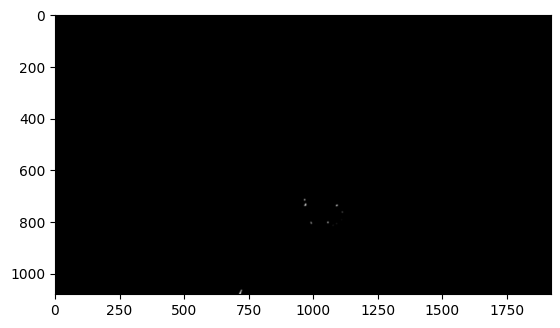

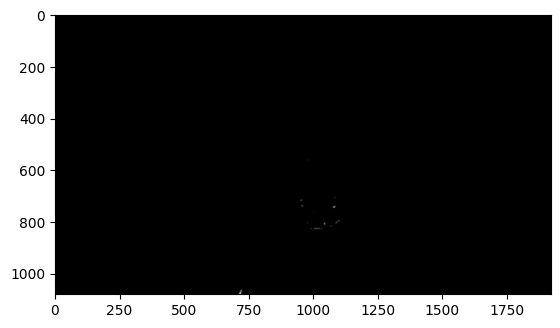

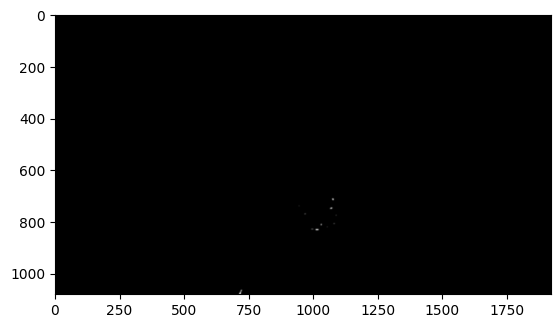

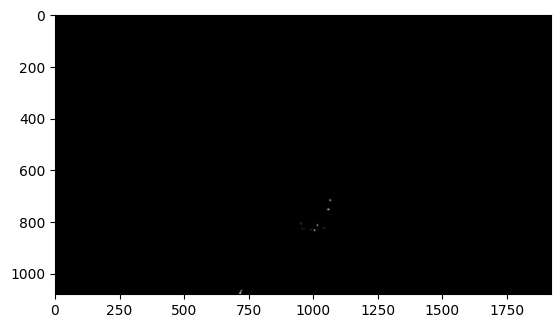

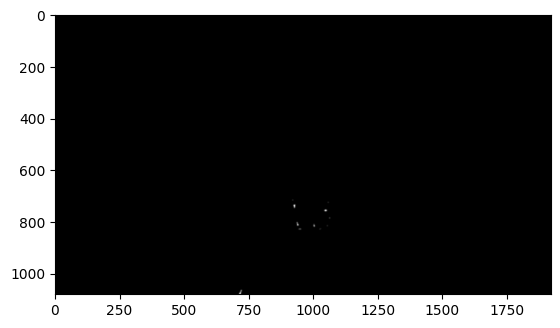

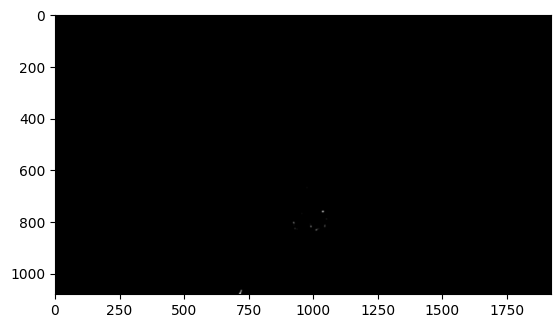

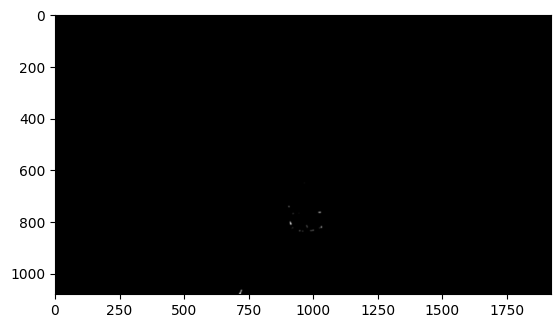

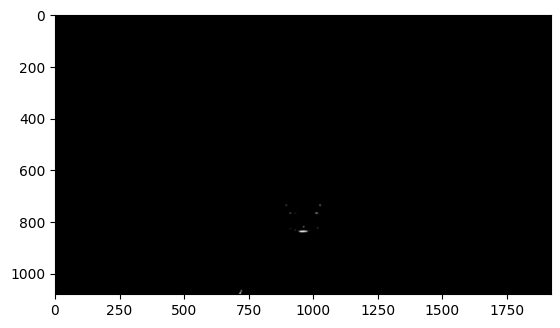

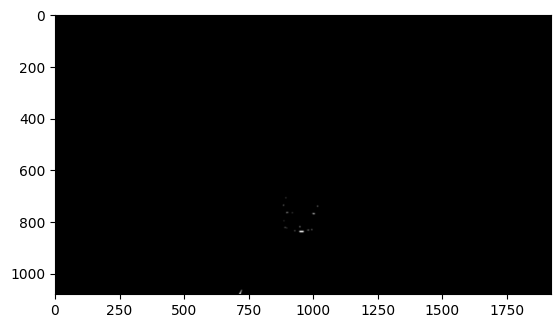

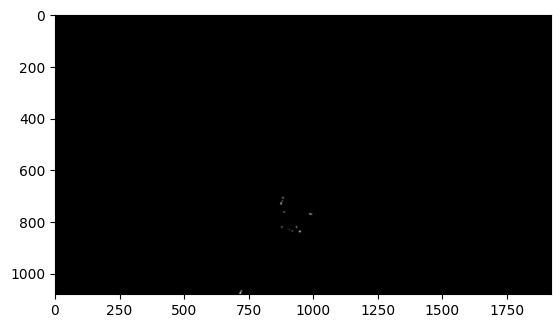

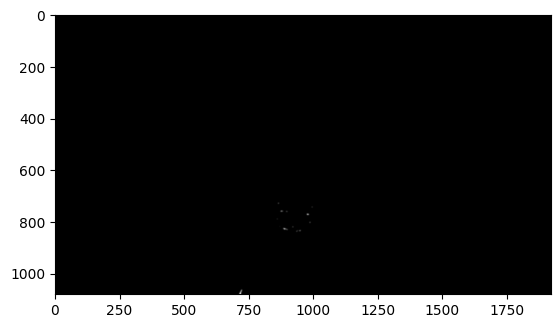

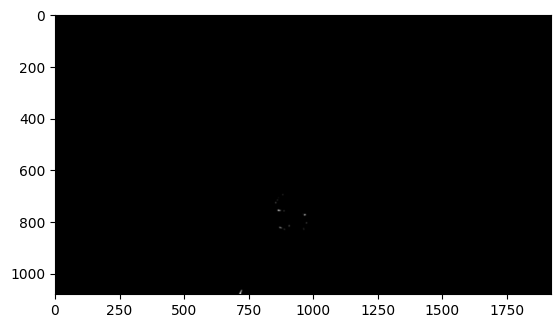

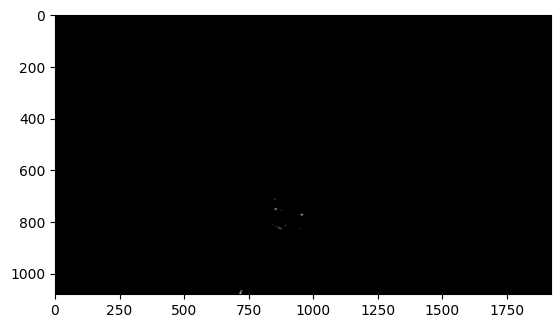

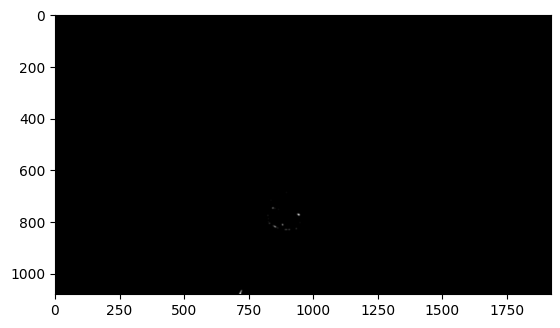

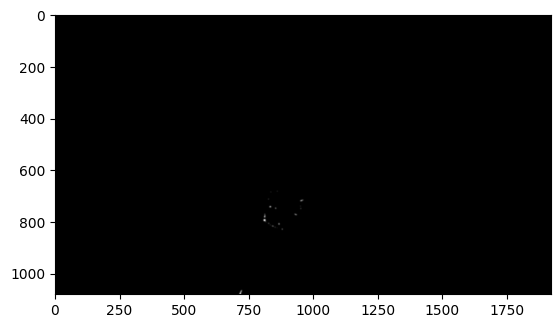

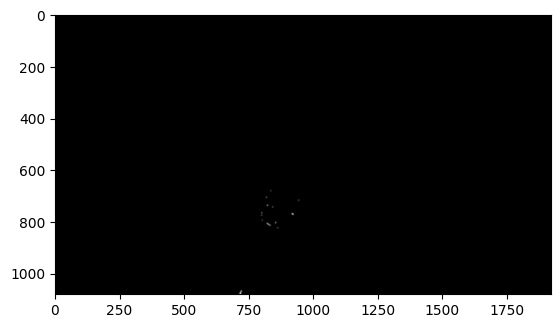

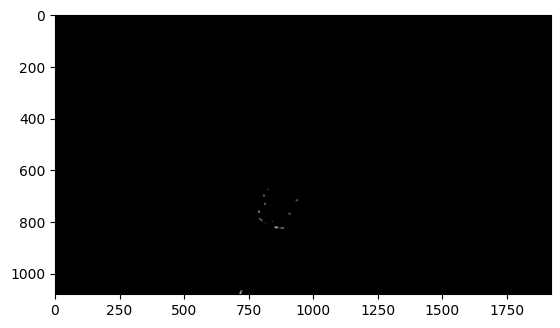

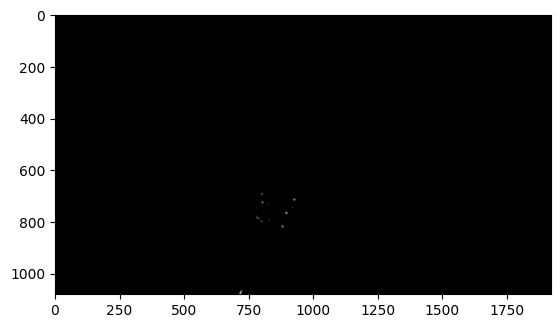

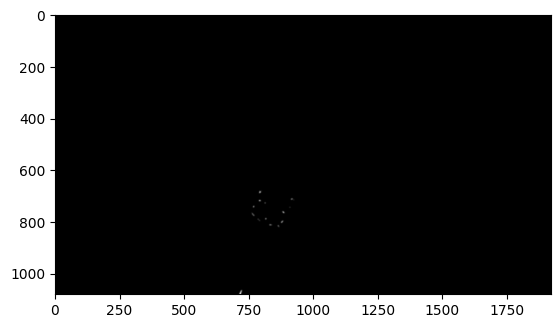

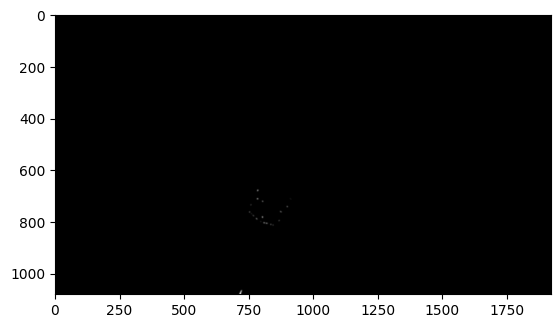

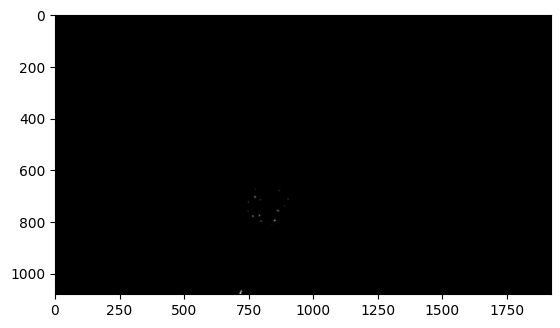

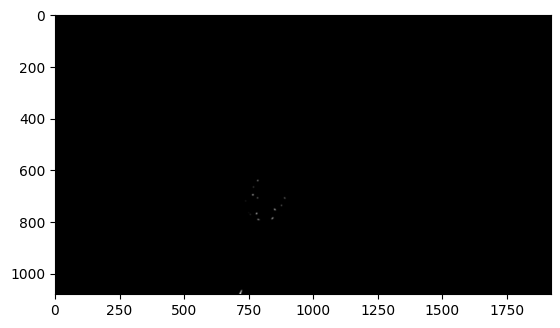

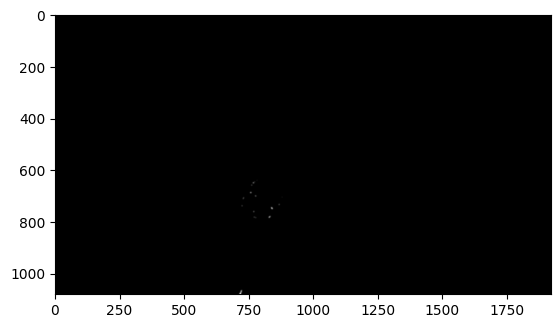

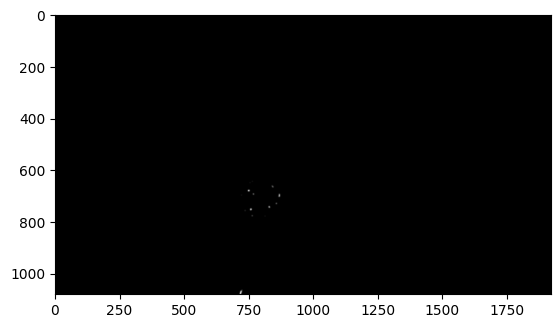

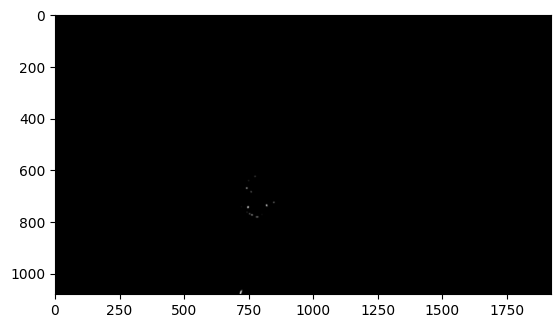

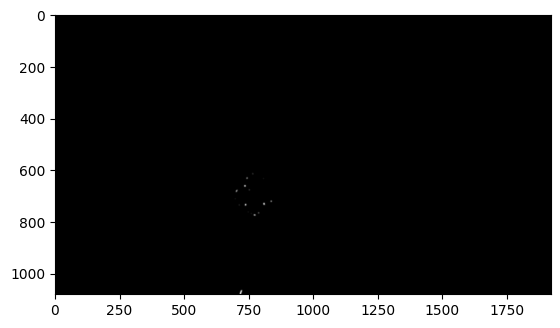

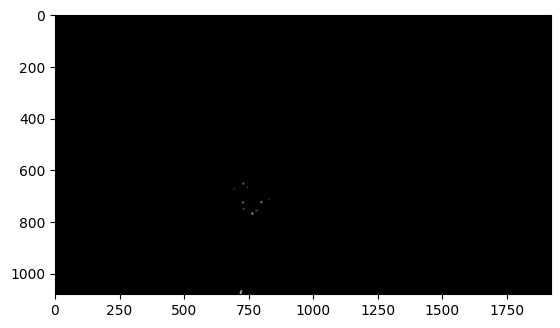

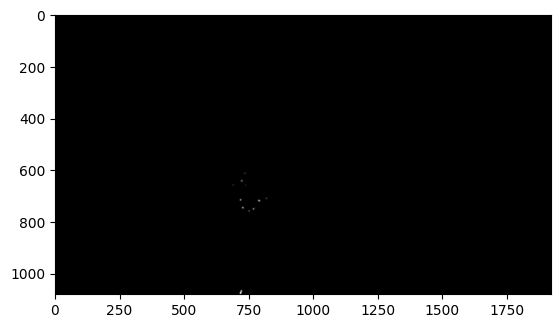

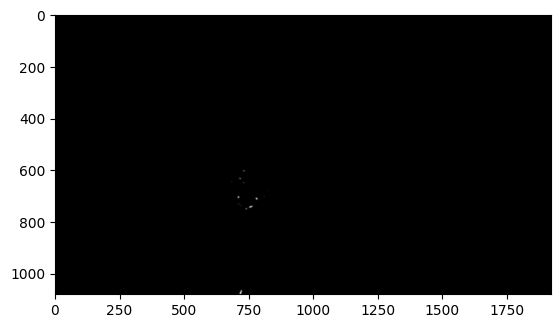

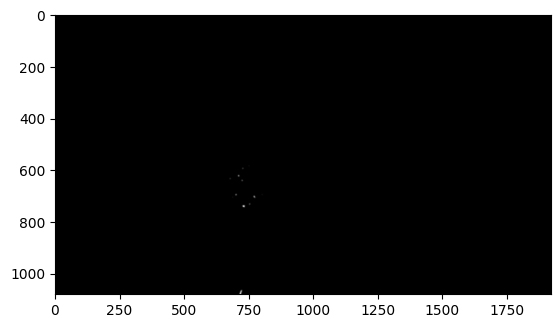

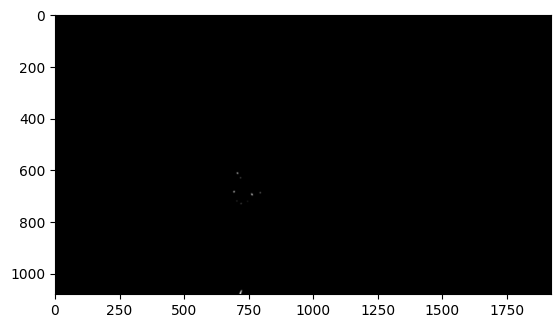

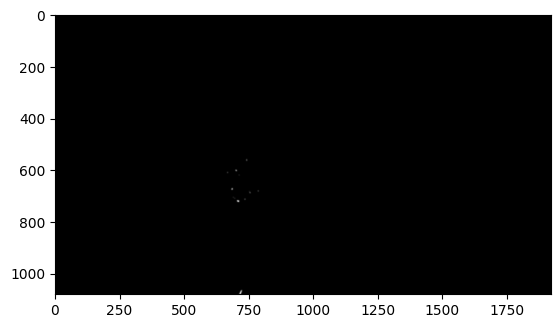

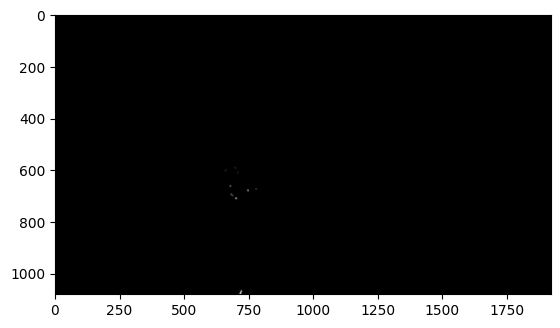

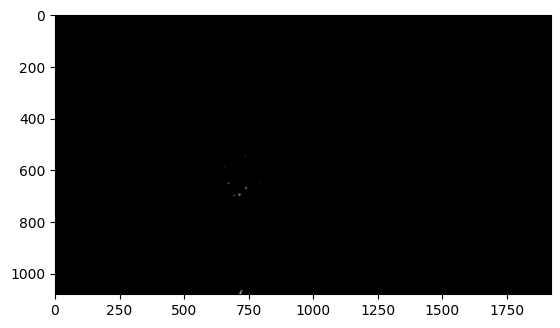

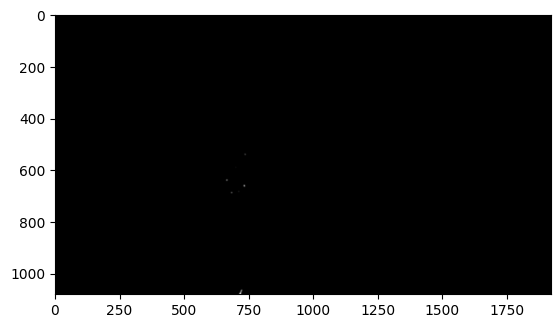

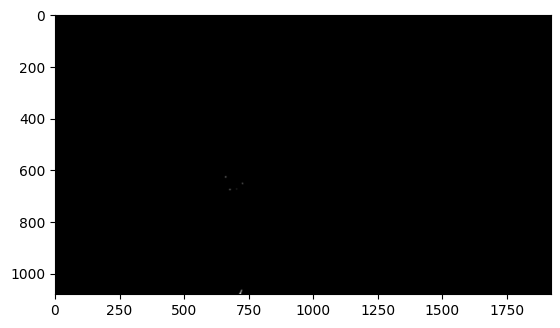

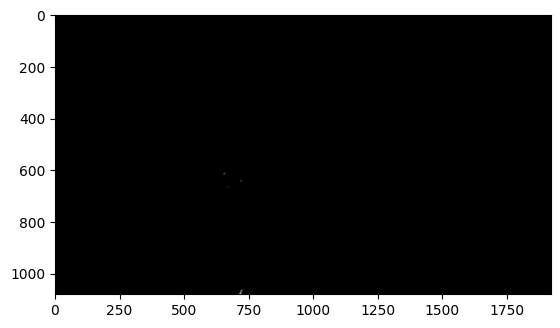

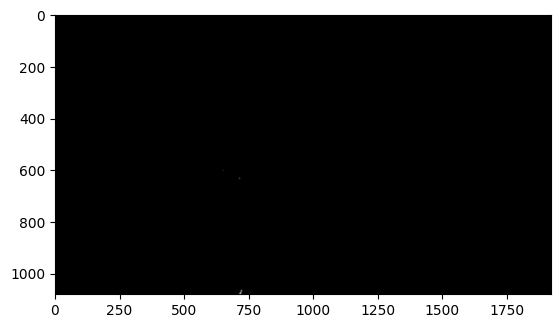

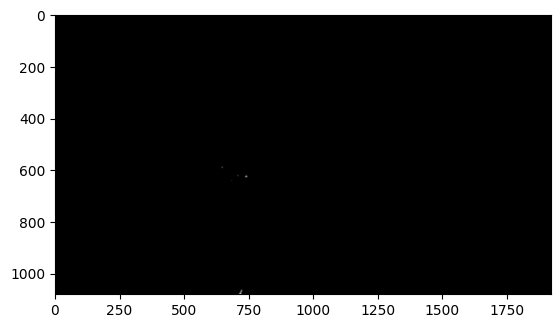

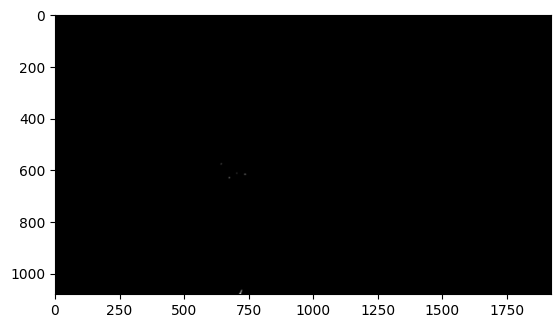

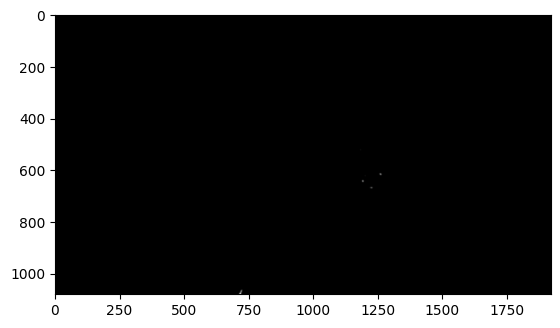

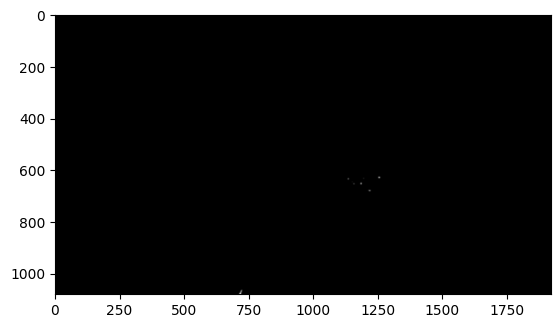

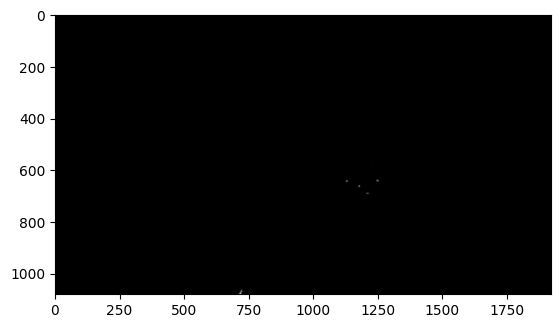

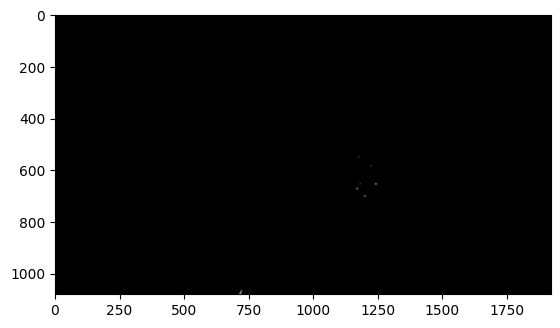

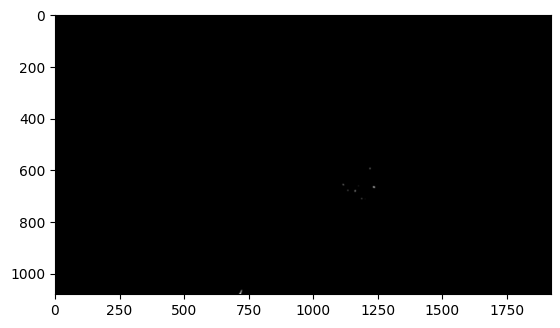

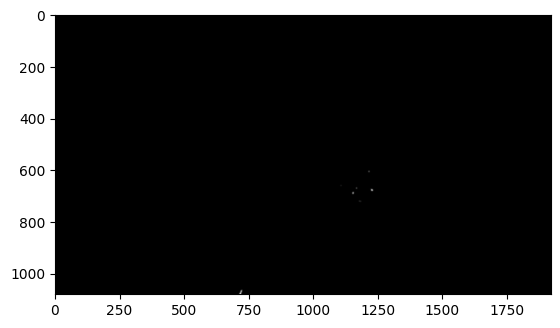

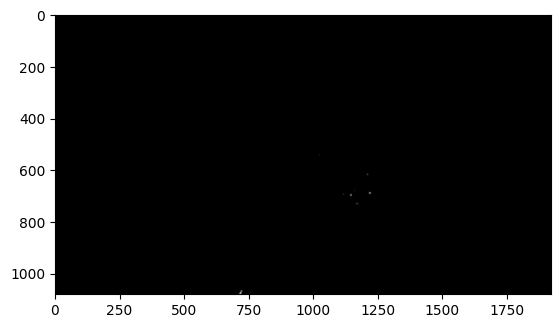

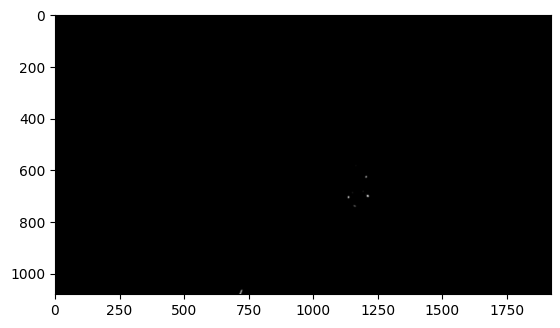

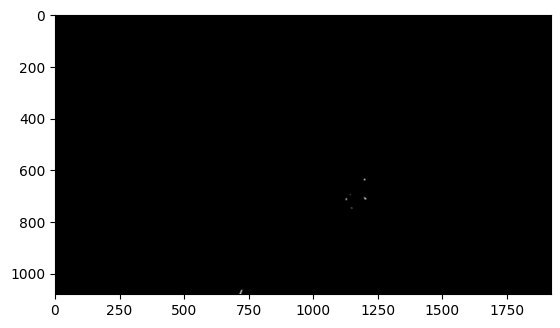

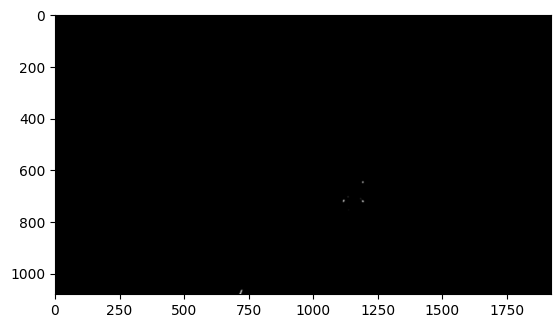

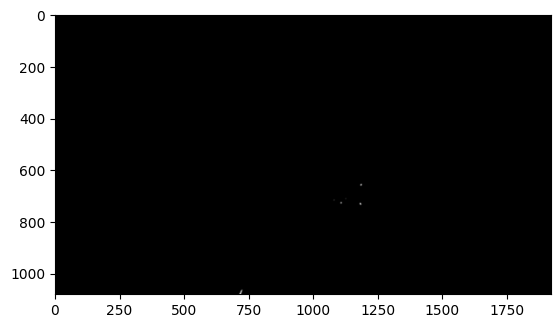

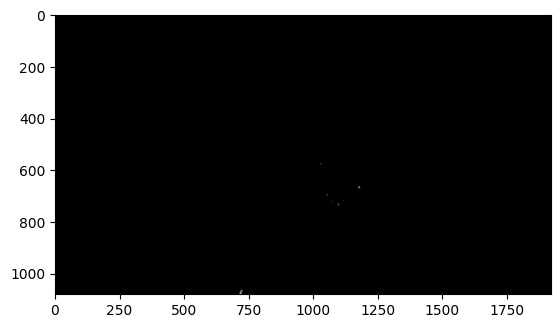

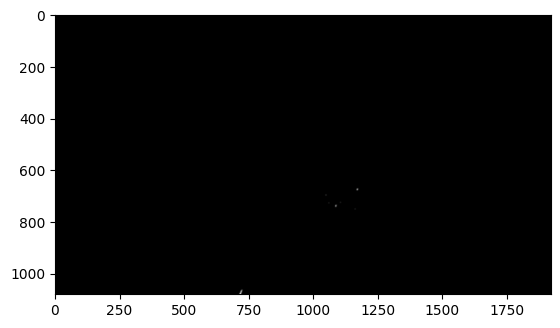

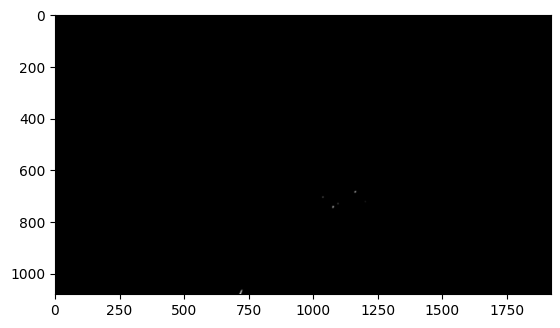

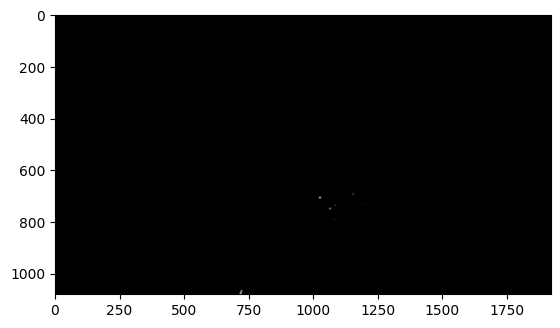

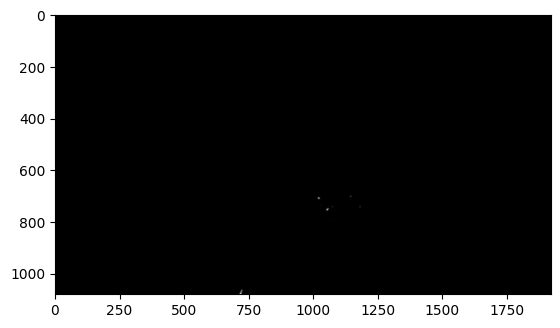

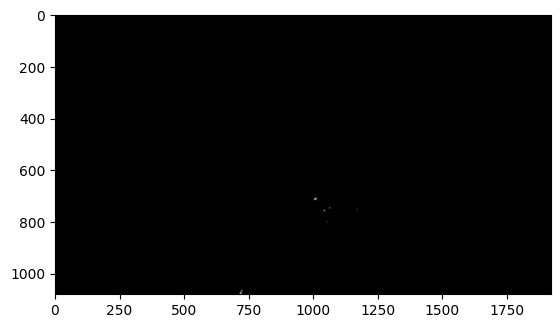

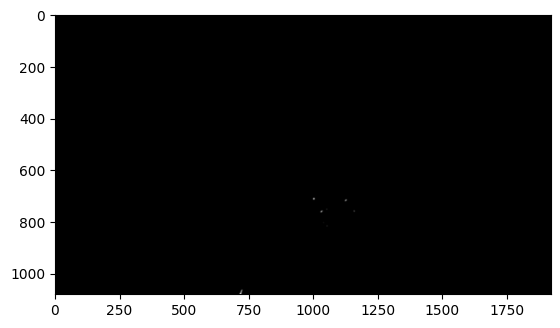

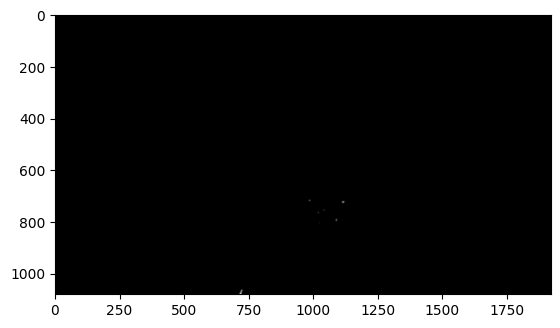

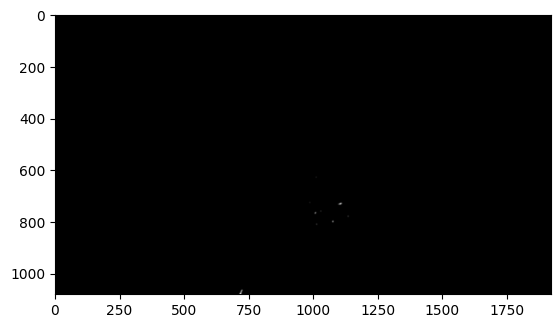

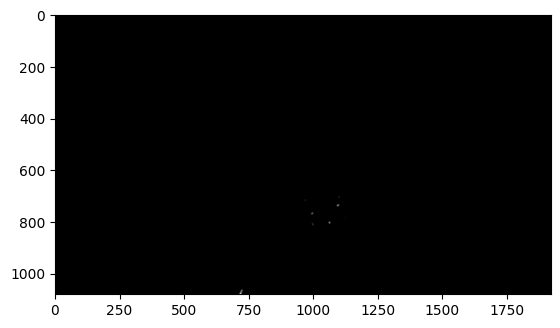

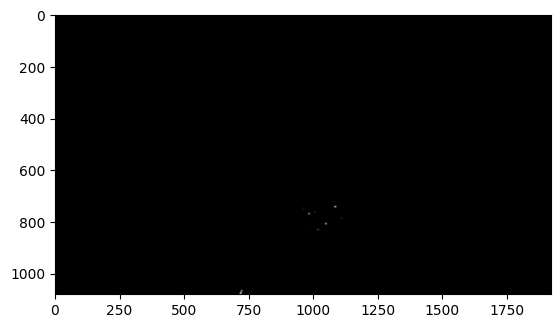

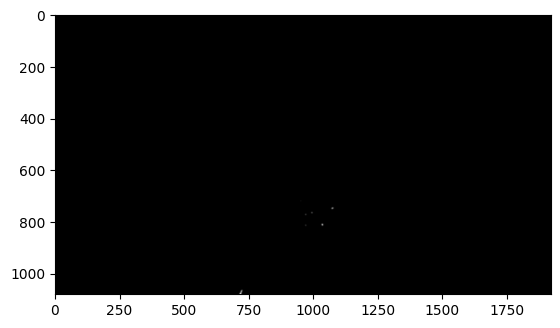

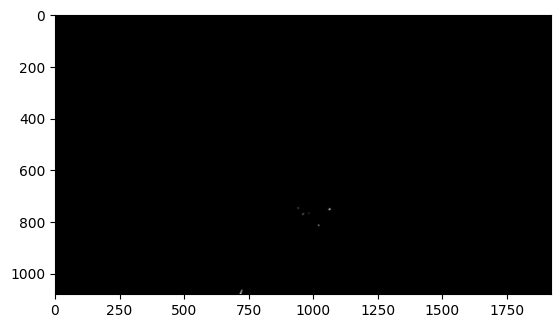

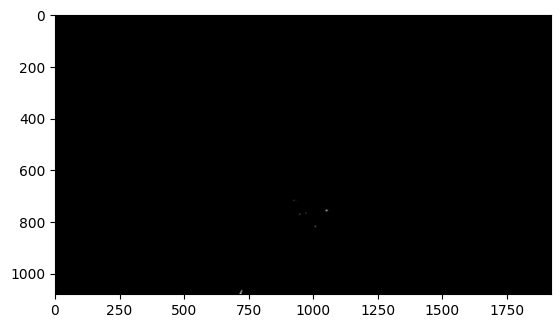

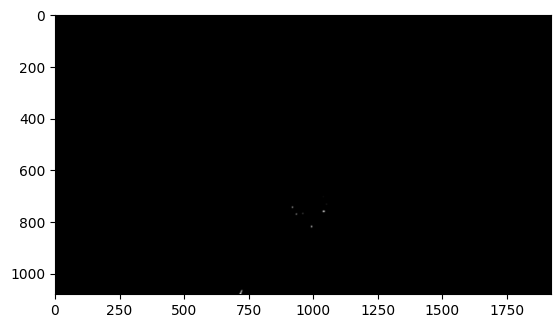

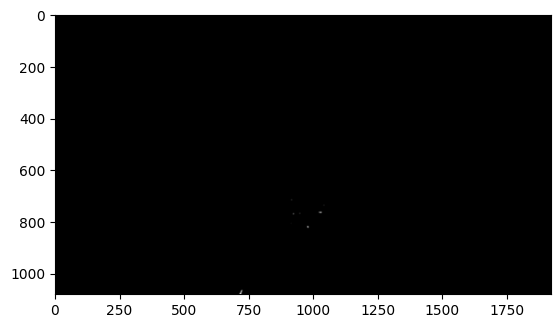

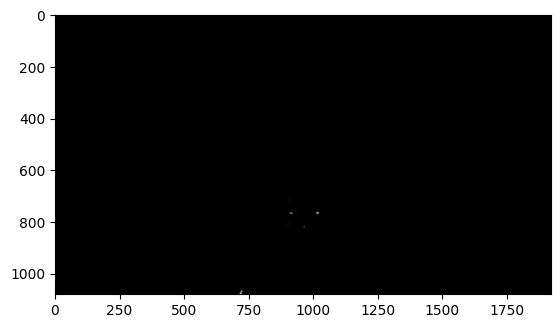

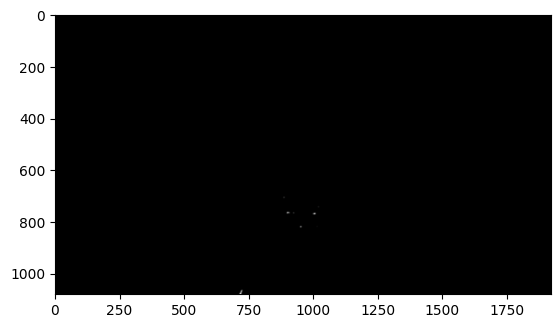

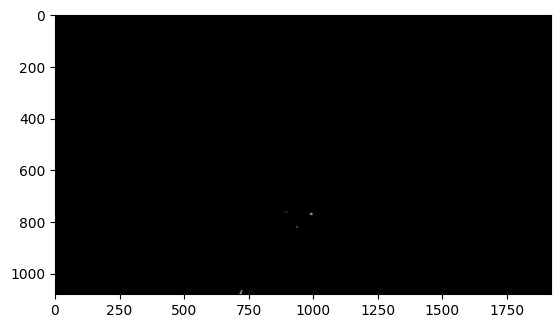

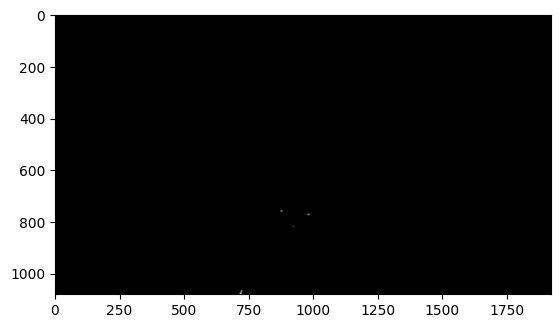

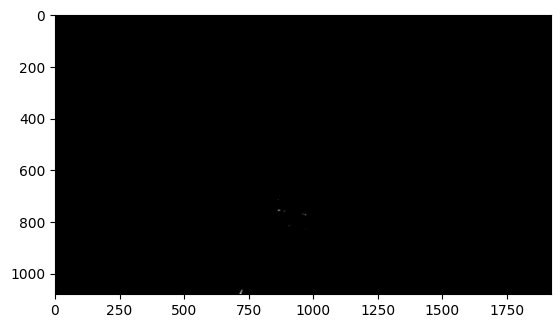

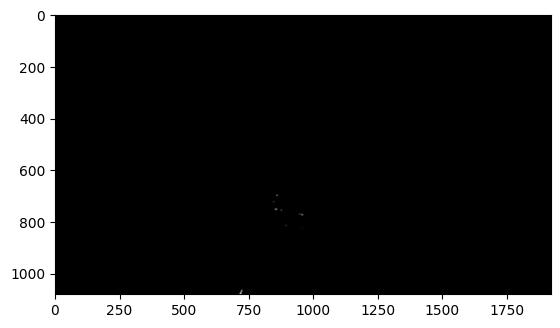

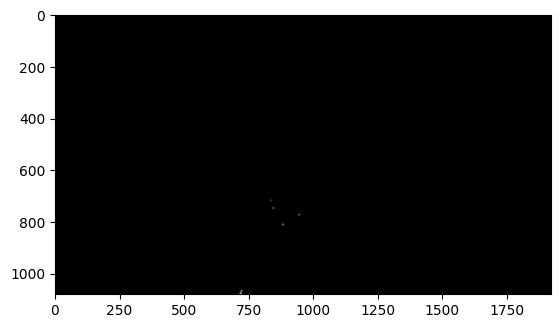

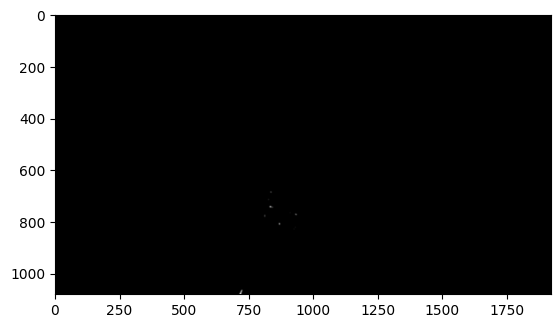

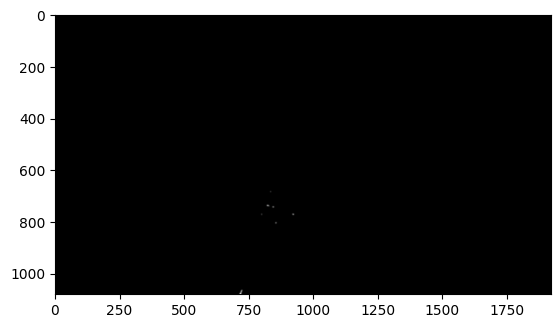

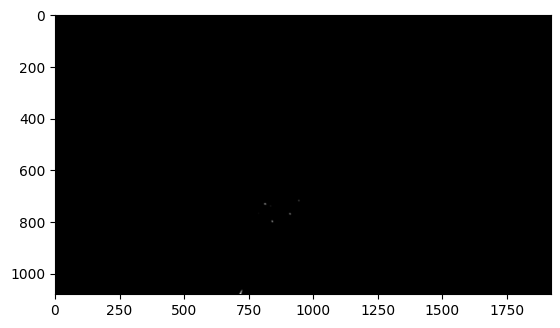

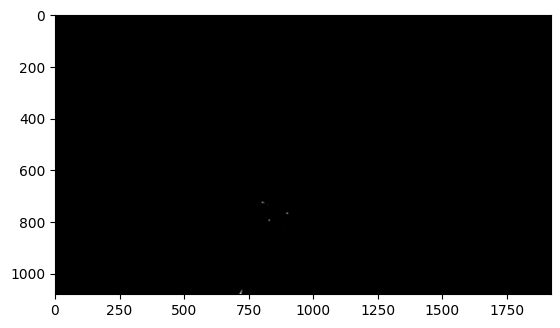

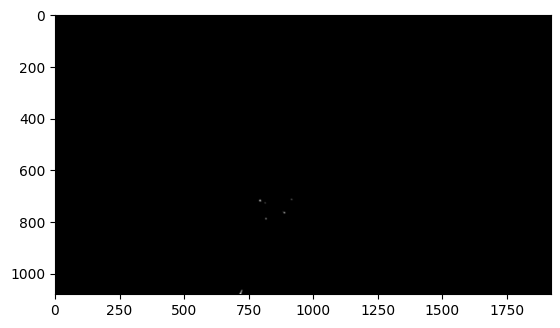

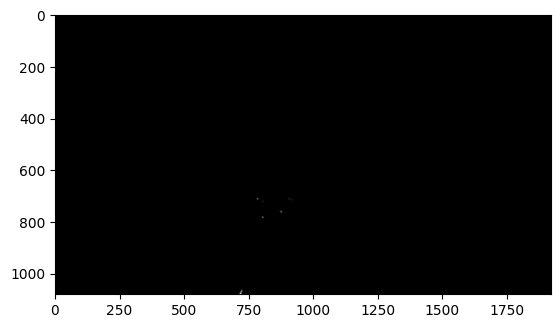

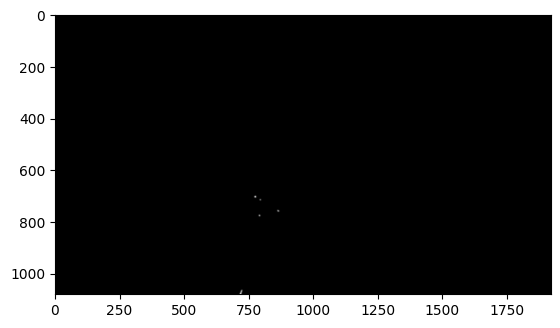

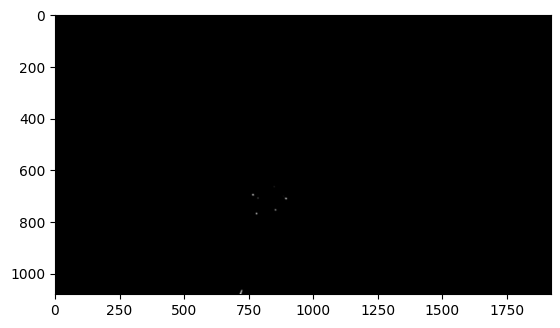

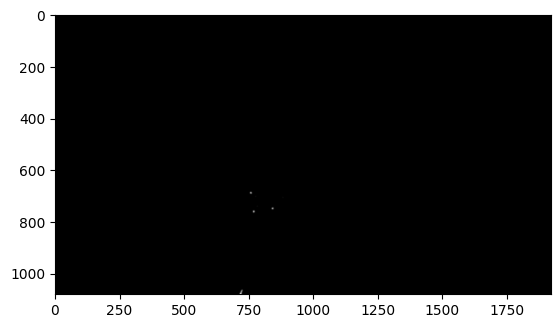

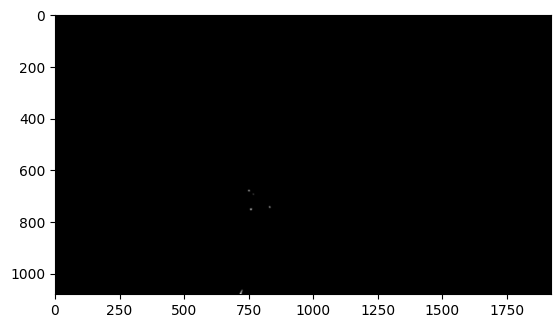

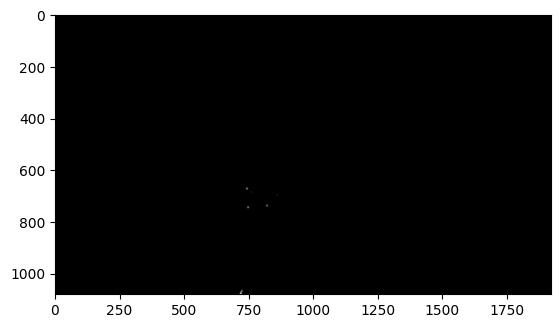

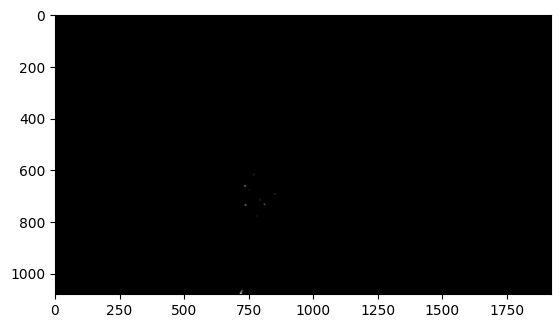

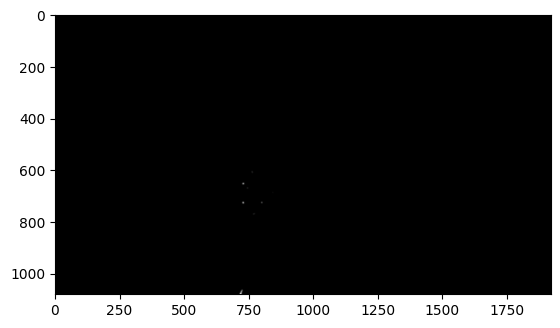

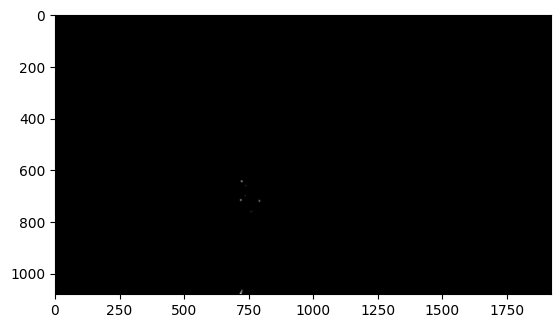

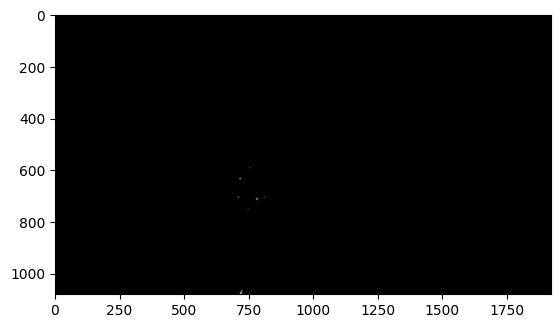

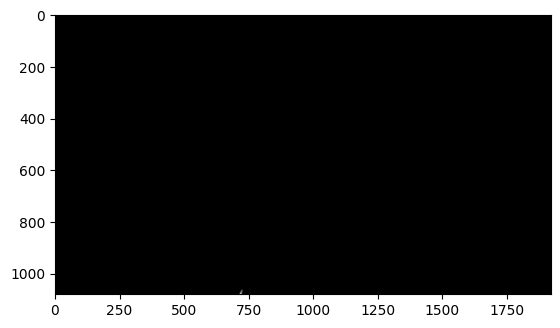

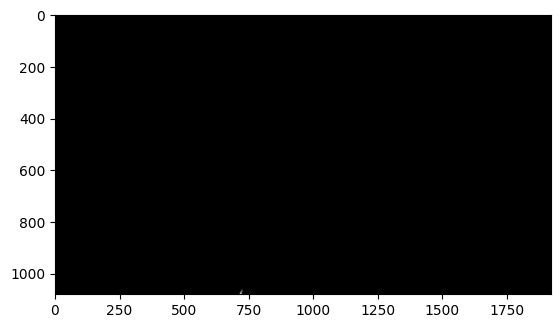

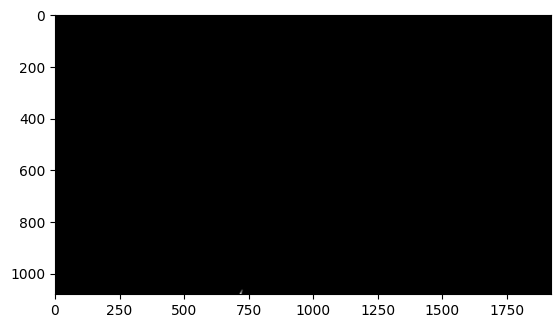

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
cap = cv.VideoCapture('vd2.MP4')
while cap.isOpened():
    ret, im = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
      # 导入图像(im)
    #im = cv.imread('./blue.png')
    #img = cv.imread('./blue.png')
#转换成HSV图
    img = im
    im = cv.cvtColor(im, cv.COLOR_BGR2HSV)
# 定义im中颜色的范围
    lower_ = np.array([0,181,255])
    upper_ = np.array([35,255,255])
# 设置im的阈值使得只取该范围内颜色
    mask = cv.inRange(im, lower_, upper_)
 # 将掩膜和图像逐像素相加
    im = cv.bitwise_and(im,im, mask= mask)
#使用高斯过滤
    im = cv.GaussianBlur(im,(5,5),0)
#转为灰度图并使用阈值
    im = cv.cvtColor(im, cv.COLOR_HSV2BGR)
    im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    ret, im = cv.threshold(im,100,255,cv.THRESH_BINARY)
    #plt.imshow(im)
    #plt.show()
    #侵蚀
    kernel = np.ones((3, 3), np.uint8)
    im = cv.erode(im, kernel, iterations = 2)
    im = cv.GaussianBlur(im,(11,11),0)
    plt.imshow(im,cmap='gray')
    plt.show()
#扩张
    kernel = np.ones((20, 20), np.uint8)
    im = cv.dilate(im, kernel, iterations=10)
    #plt.imshow(im,cmap='gray')
    #plt.show()

    contours, hierarchy = cv.findContours(im, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) #建立外轮廓
    max = 0
    y = []
    center1 = None
    #cv.drawContours(img,contours,-1,(0,0,255),3)
    for cnt in contours:
        (x,y),radius = cv.minEnclosingCircle(cnt)
        center = (int(x),int(y))
        radius = int(radius)
        if radius > max:
            max = radius
            center1 = center
    r = int(max/8)
    cv.circle(img,center1,r,(255,0,0),2)


   # plt.imshow(img)
    #plt.show()
    #gray = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    cv.imshow('frame', img)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()